shortcut

- Esc + F 在代码中查找、替换，忽略输出。
- Esc + O 在cell和输出结果间切换。

In [4]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 200
plt.style.use('ggplot')

In [5]:
# Importing the dataset
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810
2   1.083576   7.319176
3  11.120670  14.406780
4  23.711550   2.557729

In [7]:
data.describe()

V1           V2
count  3000.000000  3000.000000
mean     40.611358    22.862141
std      25.859054    31.759714
min     -22.495990   -38.795500
25%      18.462790    -4.003494
50%      41.552210    13.827390
75%      62.249480    55.729100
max     104.376600    87.313700

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      3000 non-null   float64
 1   V2      3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


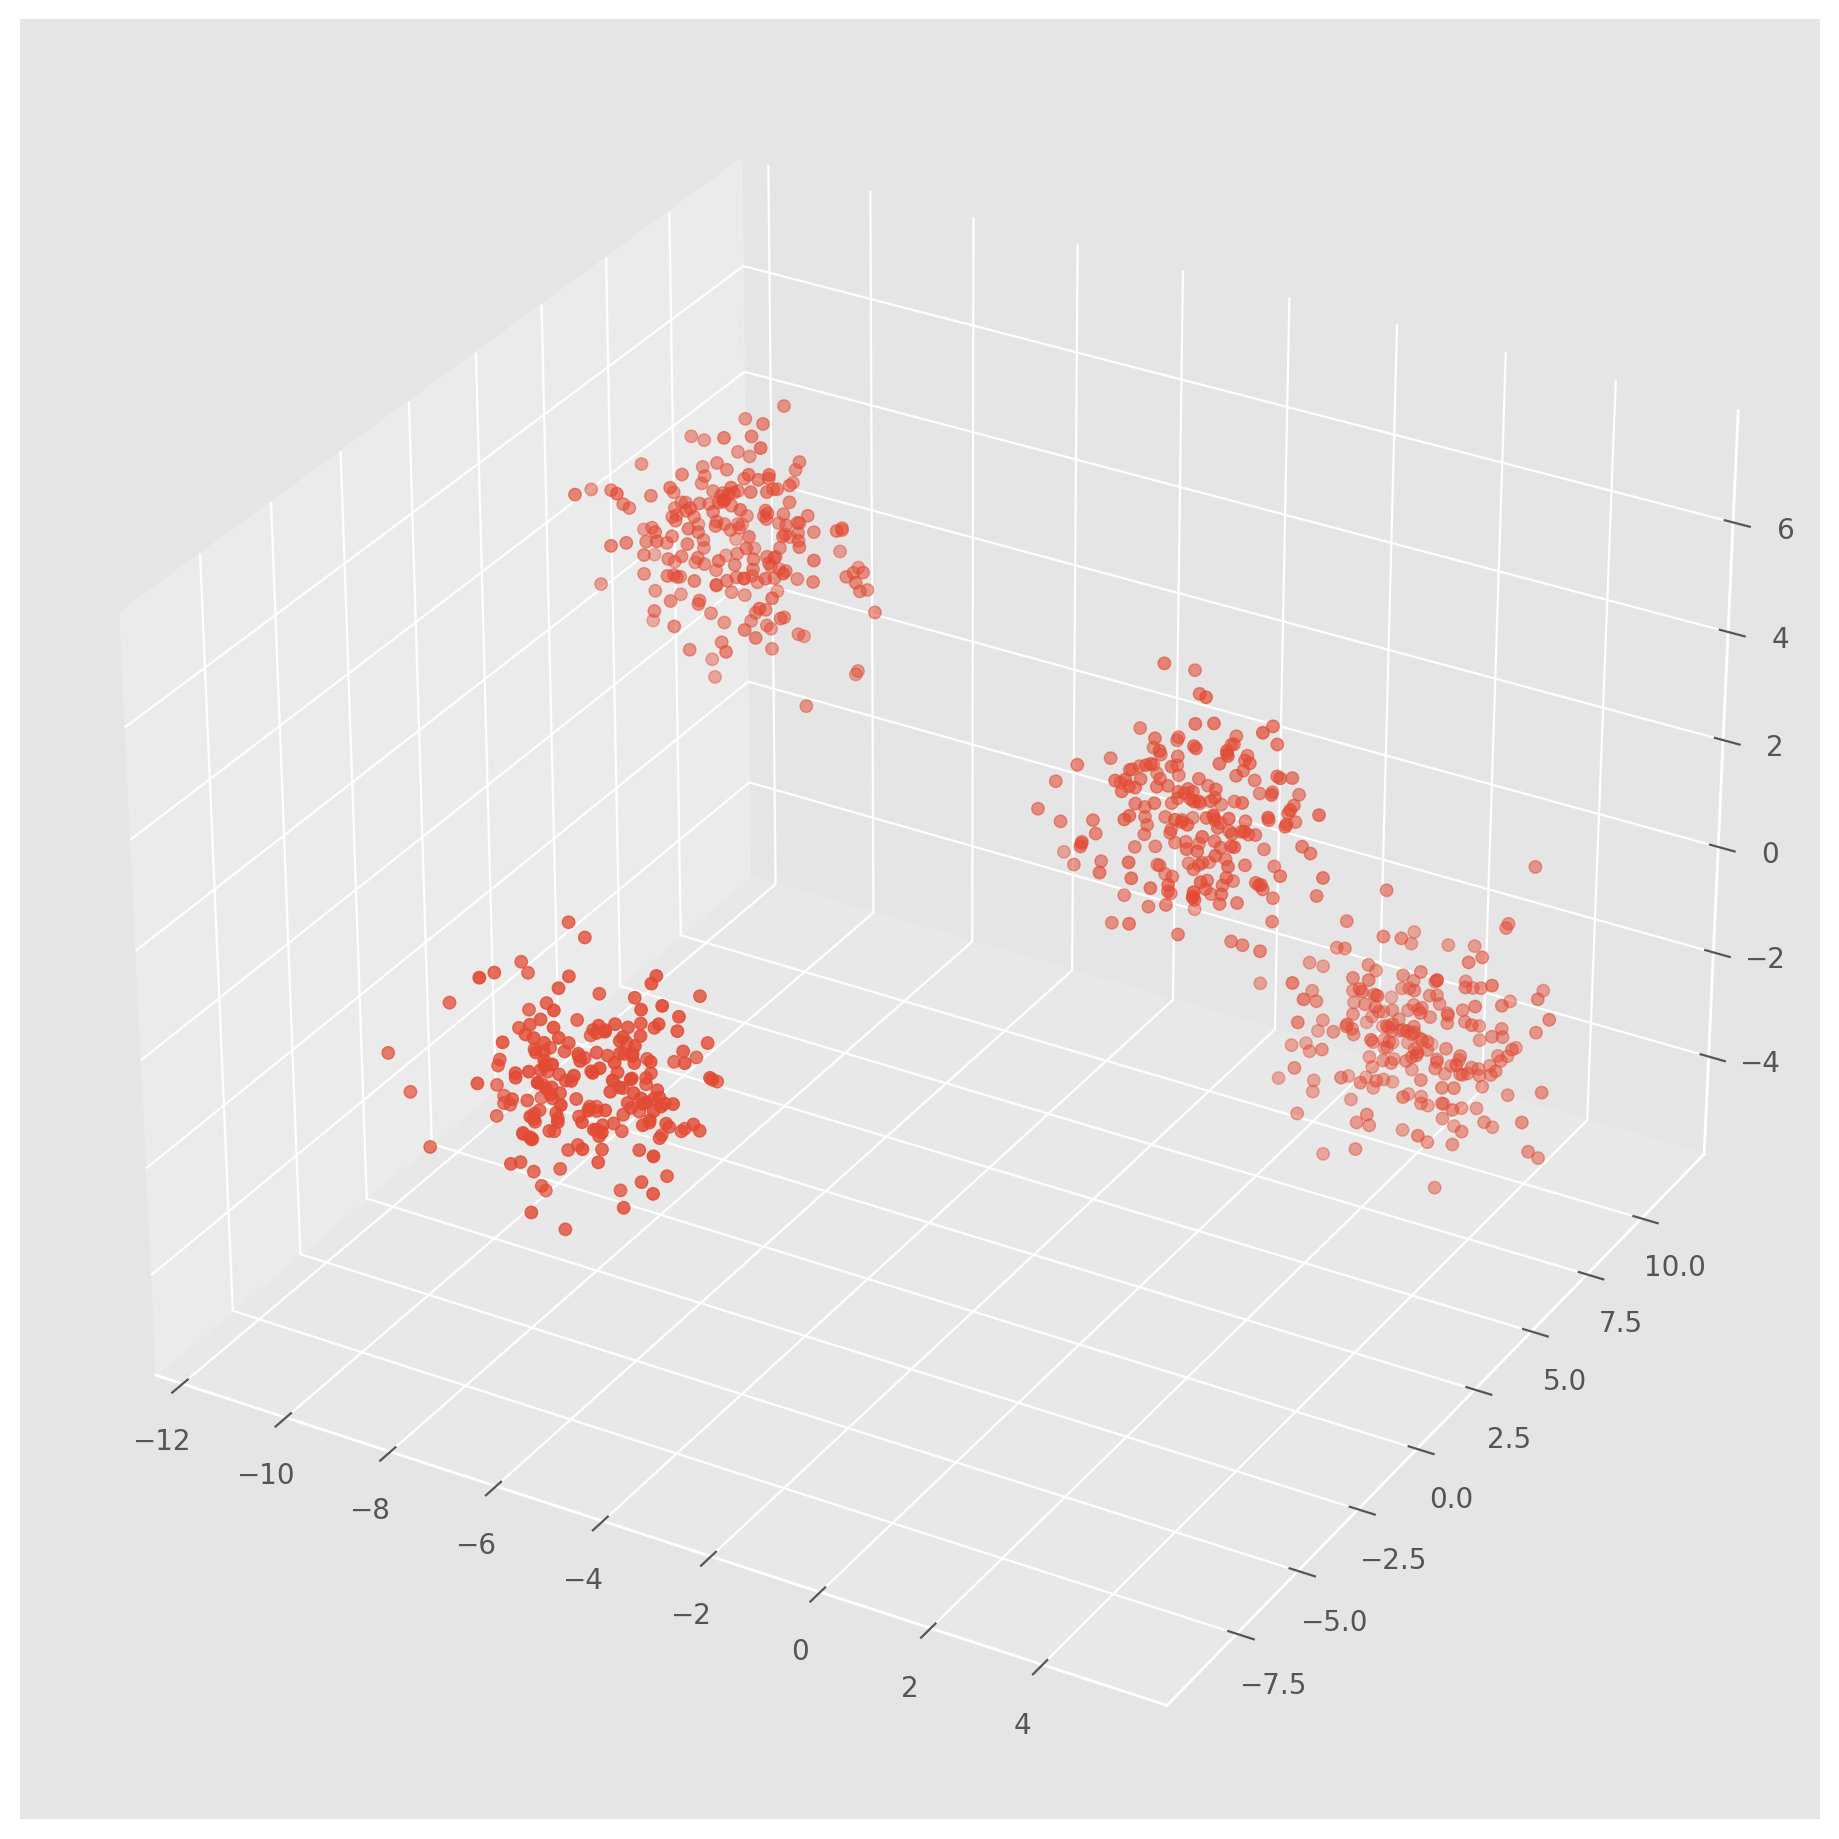

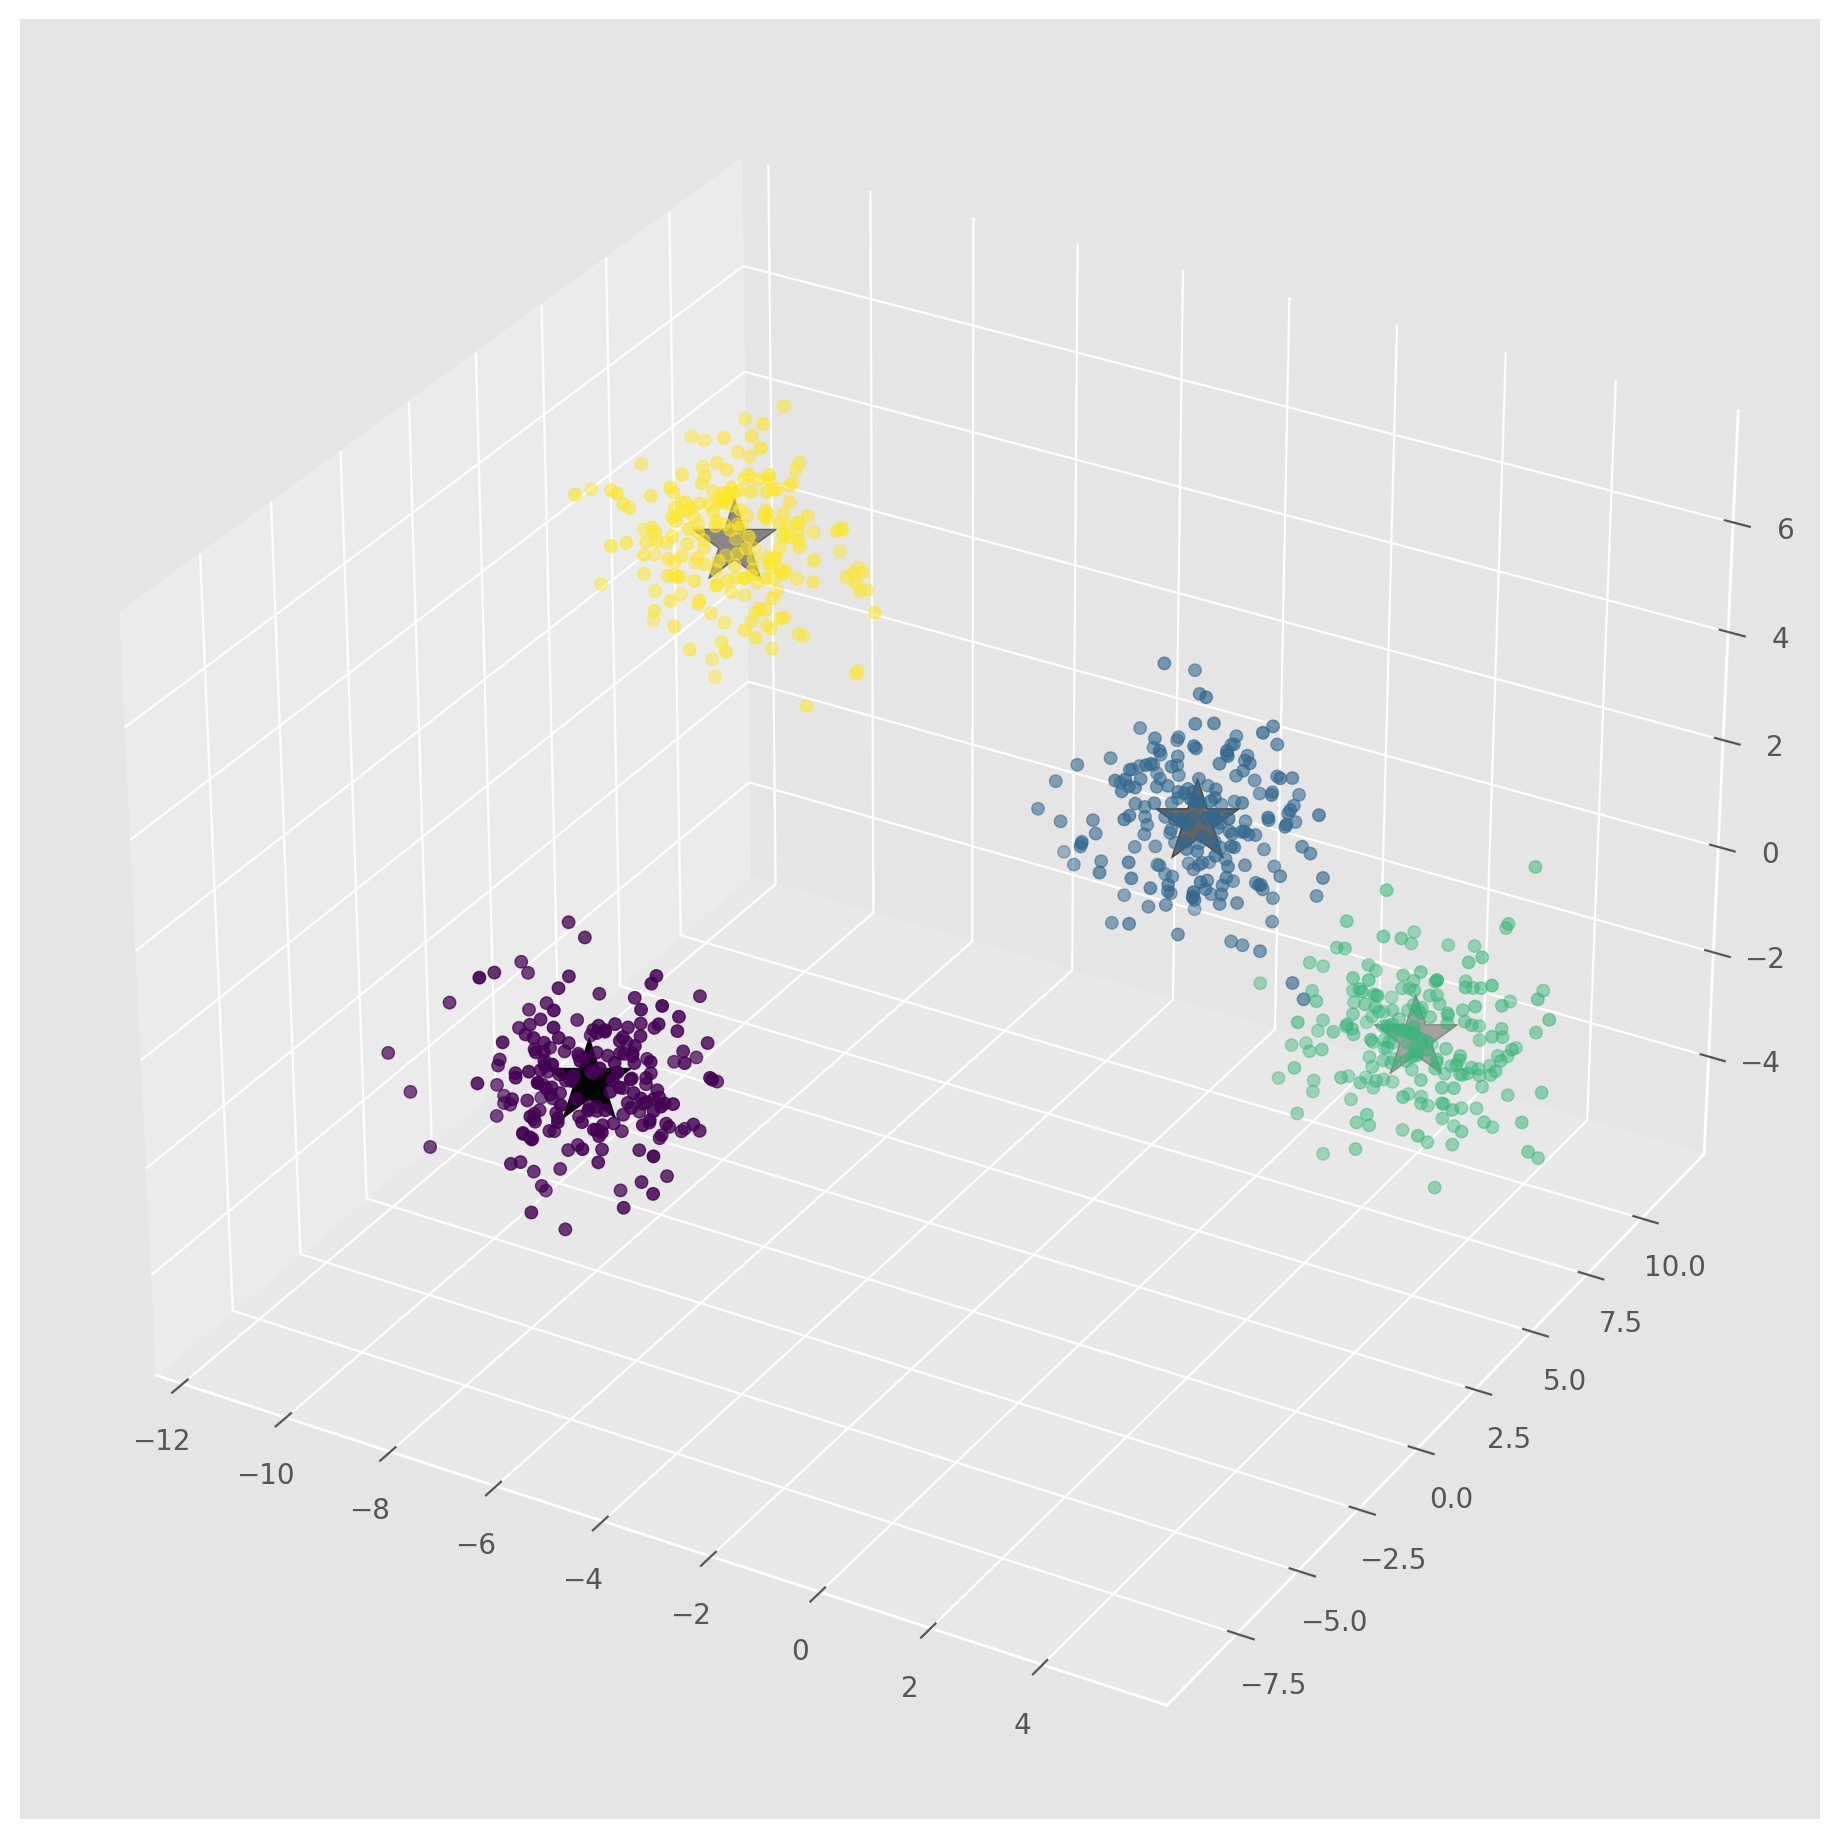

In [296]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

In [88]:
X[0, :]

array([-2.85127606, -3.65986743,  5.87146441])

In [39]:
type(data) == pd.core.frame.DataFrame

True

In [42]:
x = data.to_numpy()
x

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec


def plot_cluster_data(X, show_dims=2, n_cluster=2, y=None):
    """
    二维/三维可视化聚类数据集
    ----
    param y: 各样本的所属类别
    """
    try:
        n_features = X.shape[1]
        
    except ValueError as e:
        print("[Error] Data X contains at least two features!", e)
            
    else:
        # 类型转换，统一格式为 numpy.array
        if type(X) == pd.core.frame.DataFrame:
            X = X.to_numpy()
            
        fig = plt.figure(tight_layout=True)
        gs = gridspec.GridSpec(1, 1)
        
        if (n_features >= 2) and (show_dims == 2):
            ax = fig.add_subplot(gs[0, 0])
            ax.scatter(X[:, 0], X[:, 1], c=y)
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
        
        elif (n_features >= 3) and (show_dims >= 3):
            ax = Axes3D(fig)
            ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
        
        else:
            print("[Error] Please check params!")

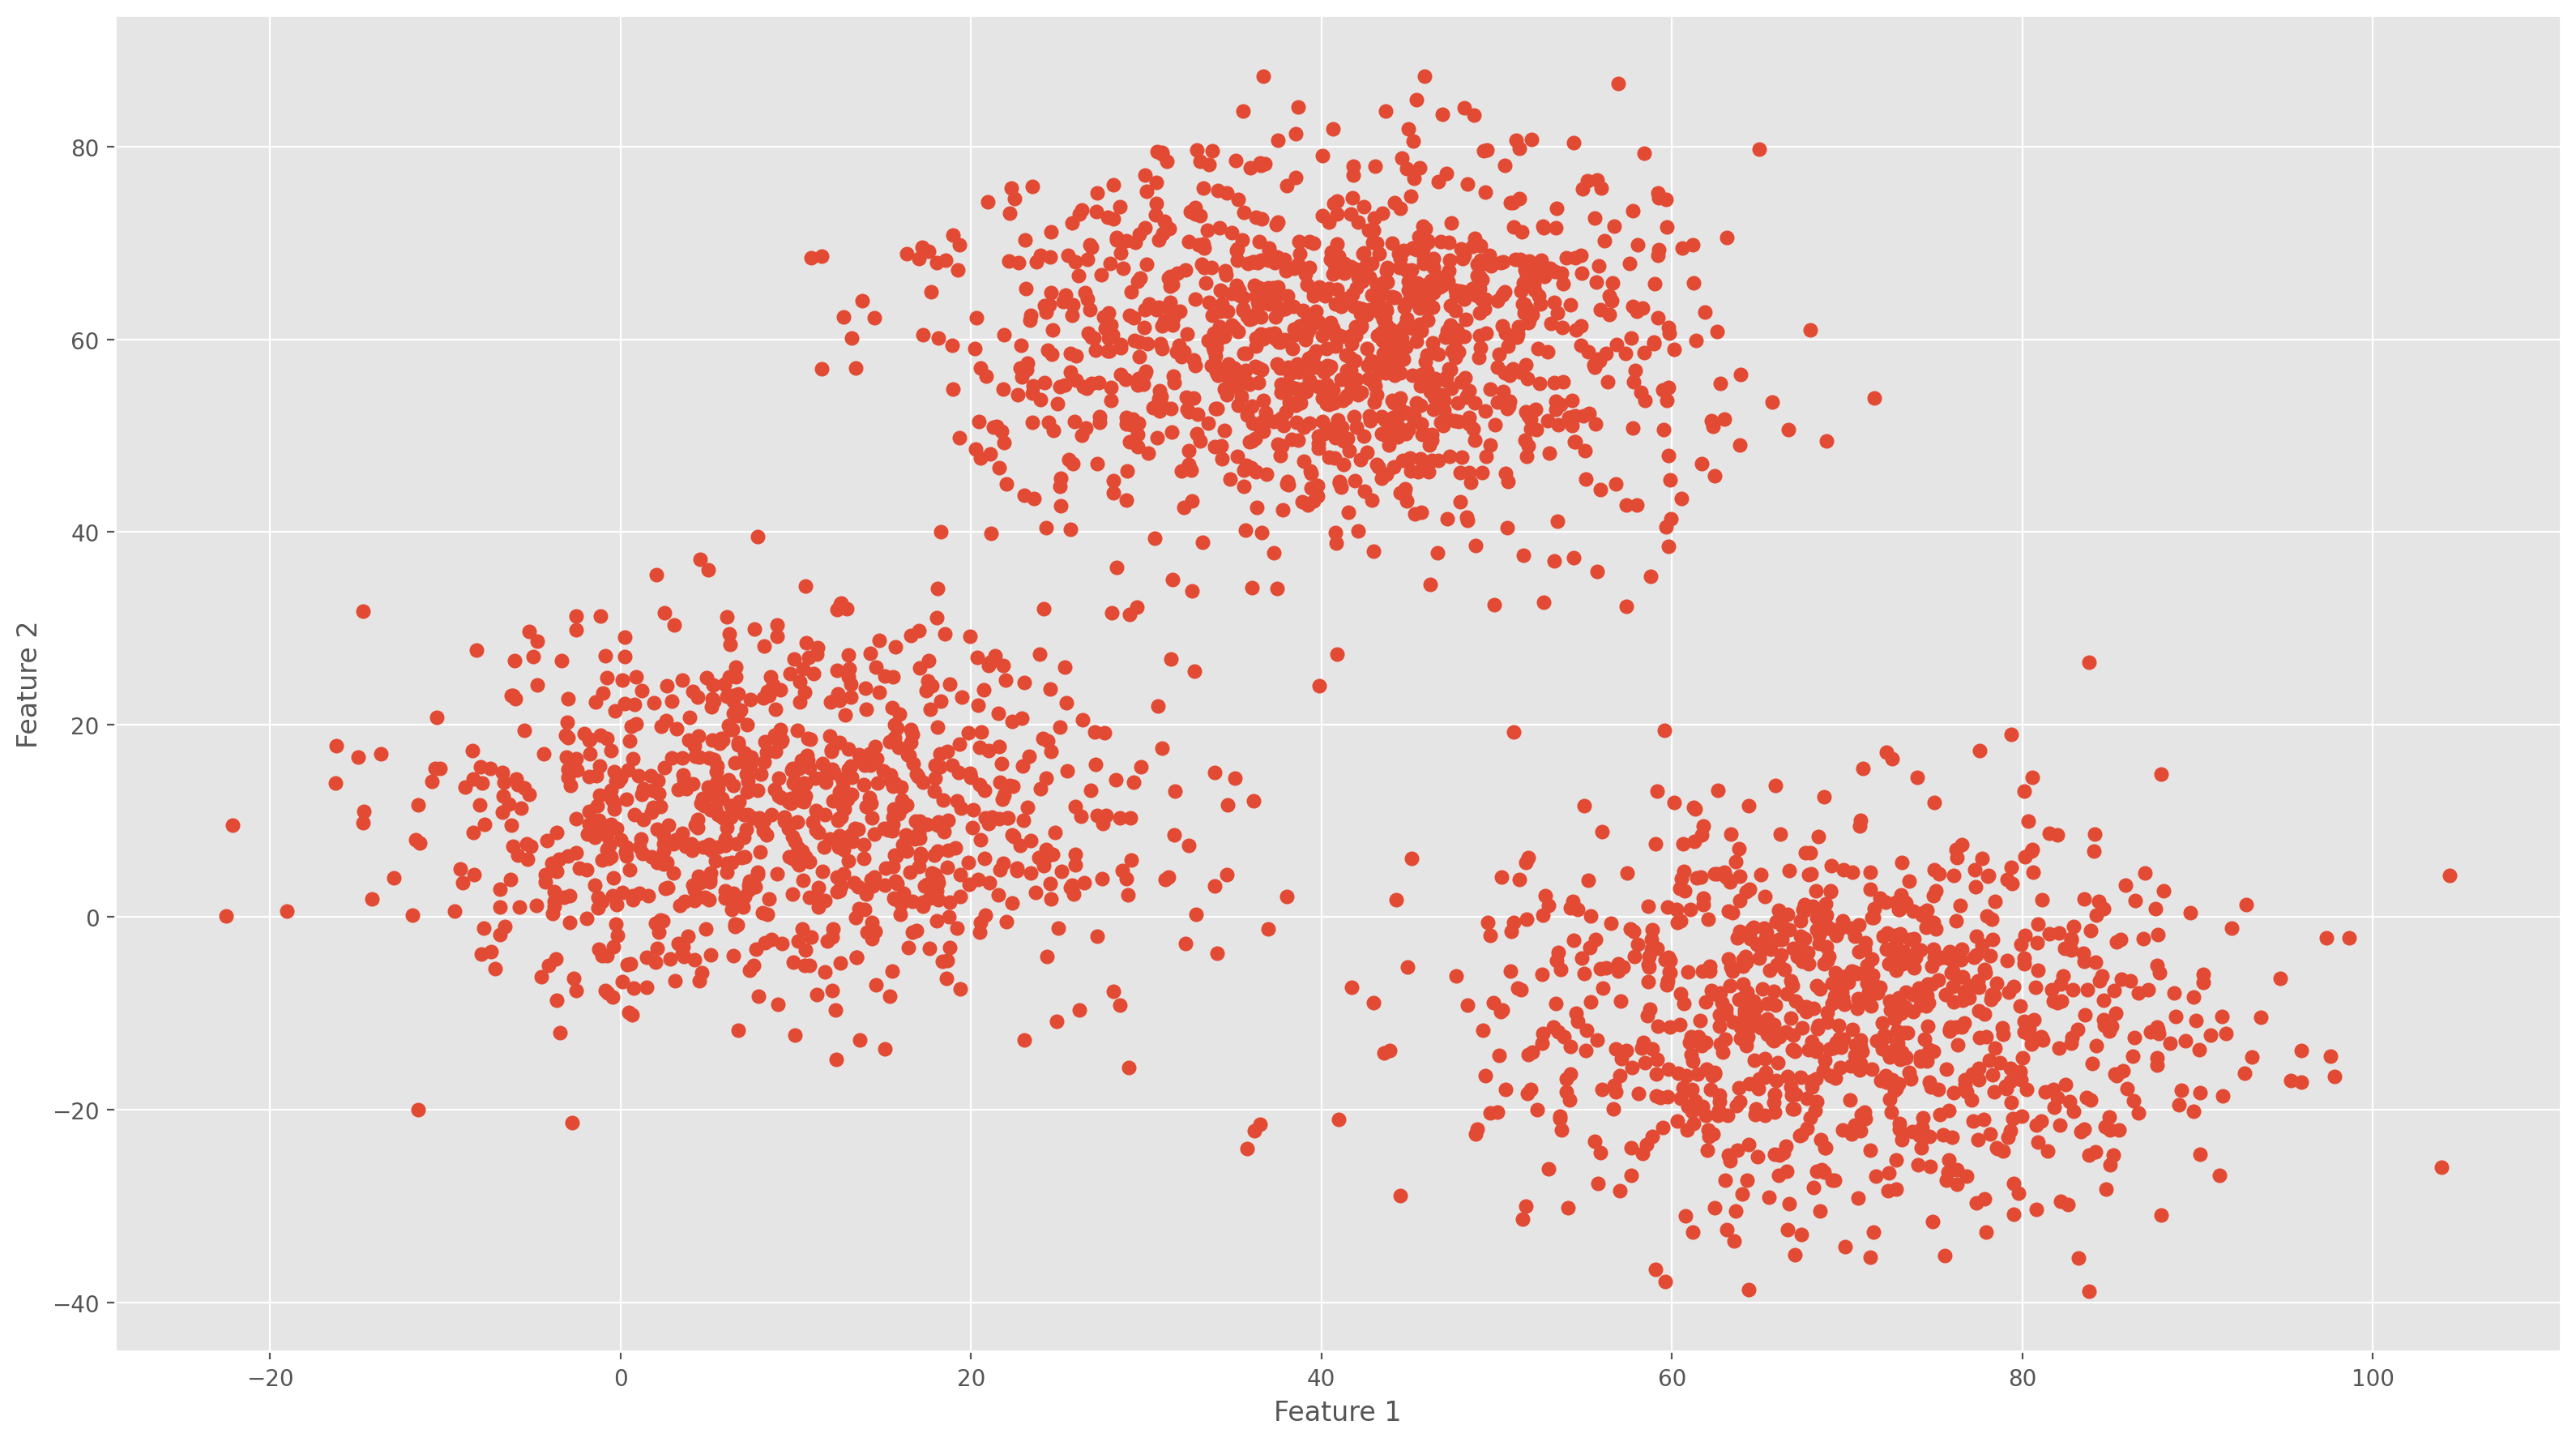

In [47]:
plot_cluster_data(data)

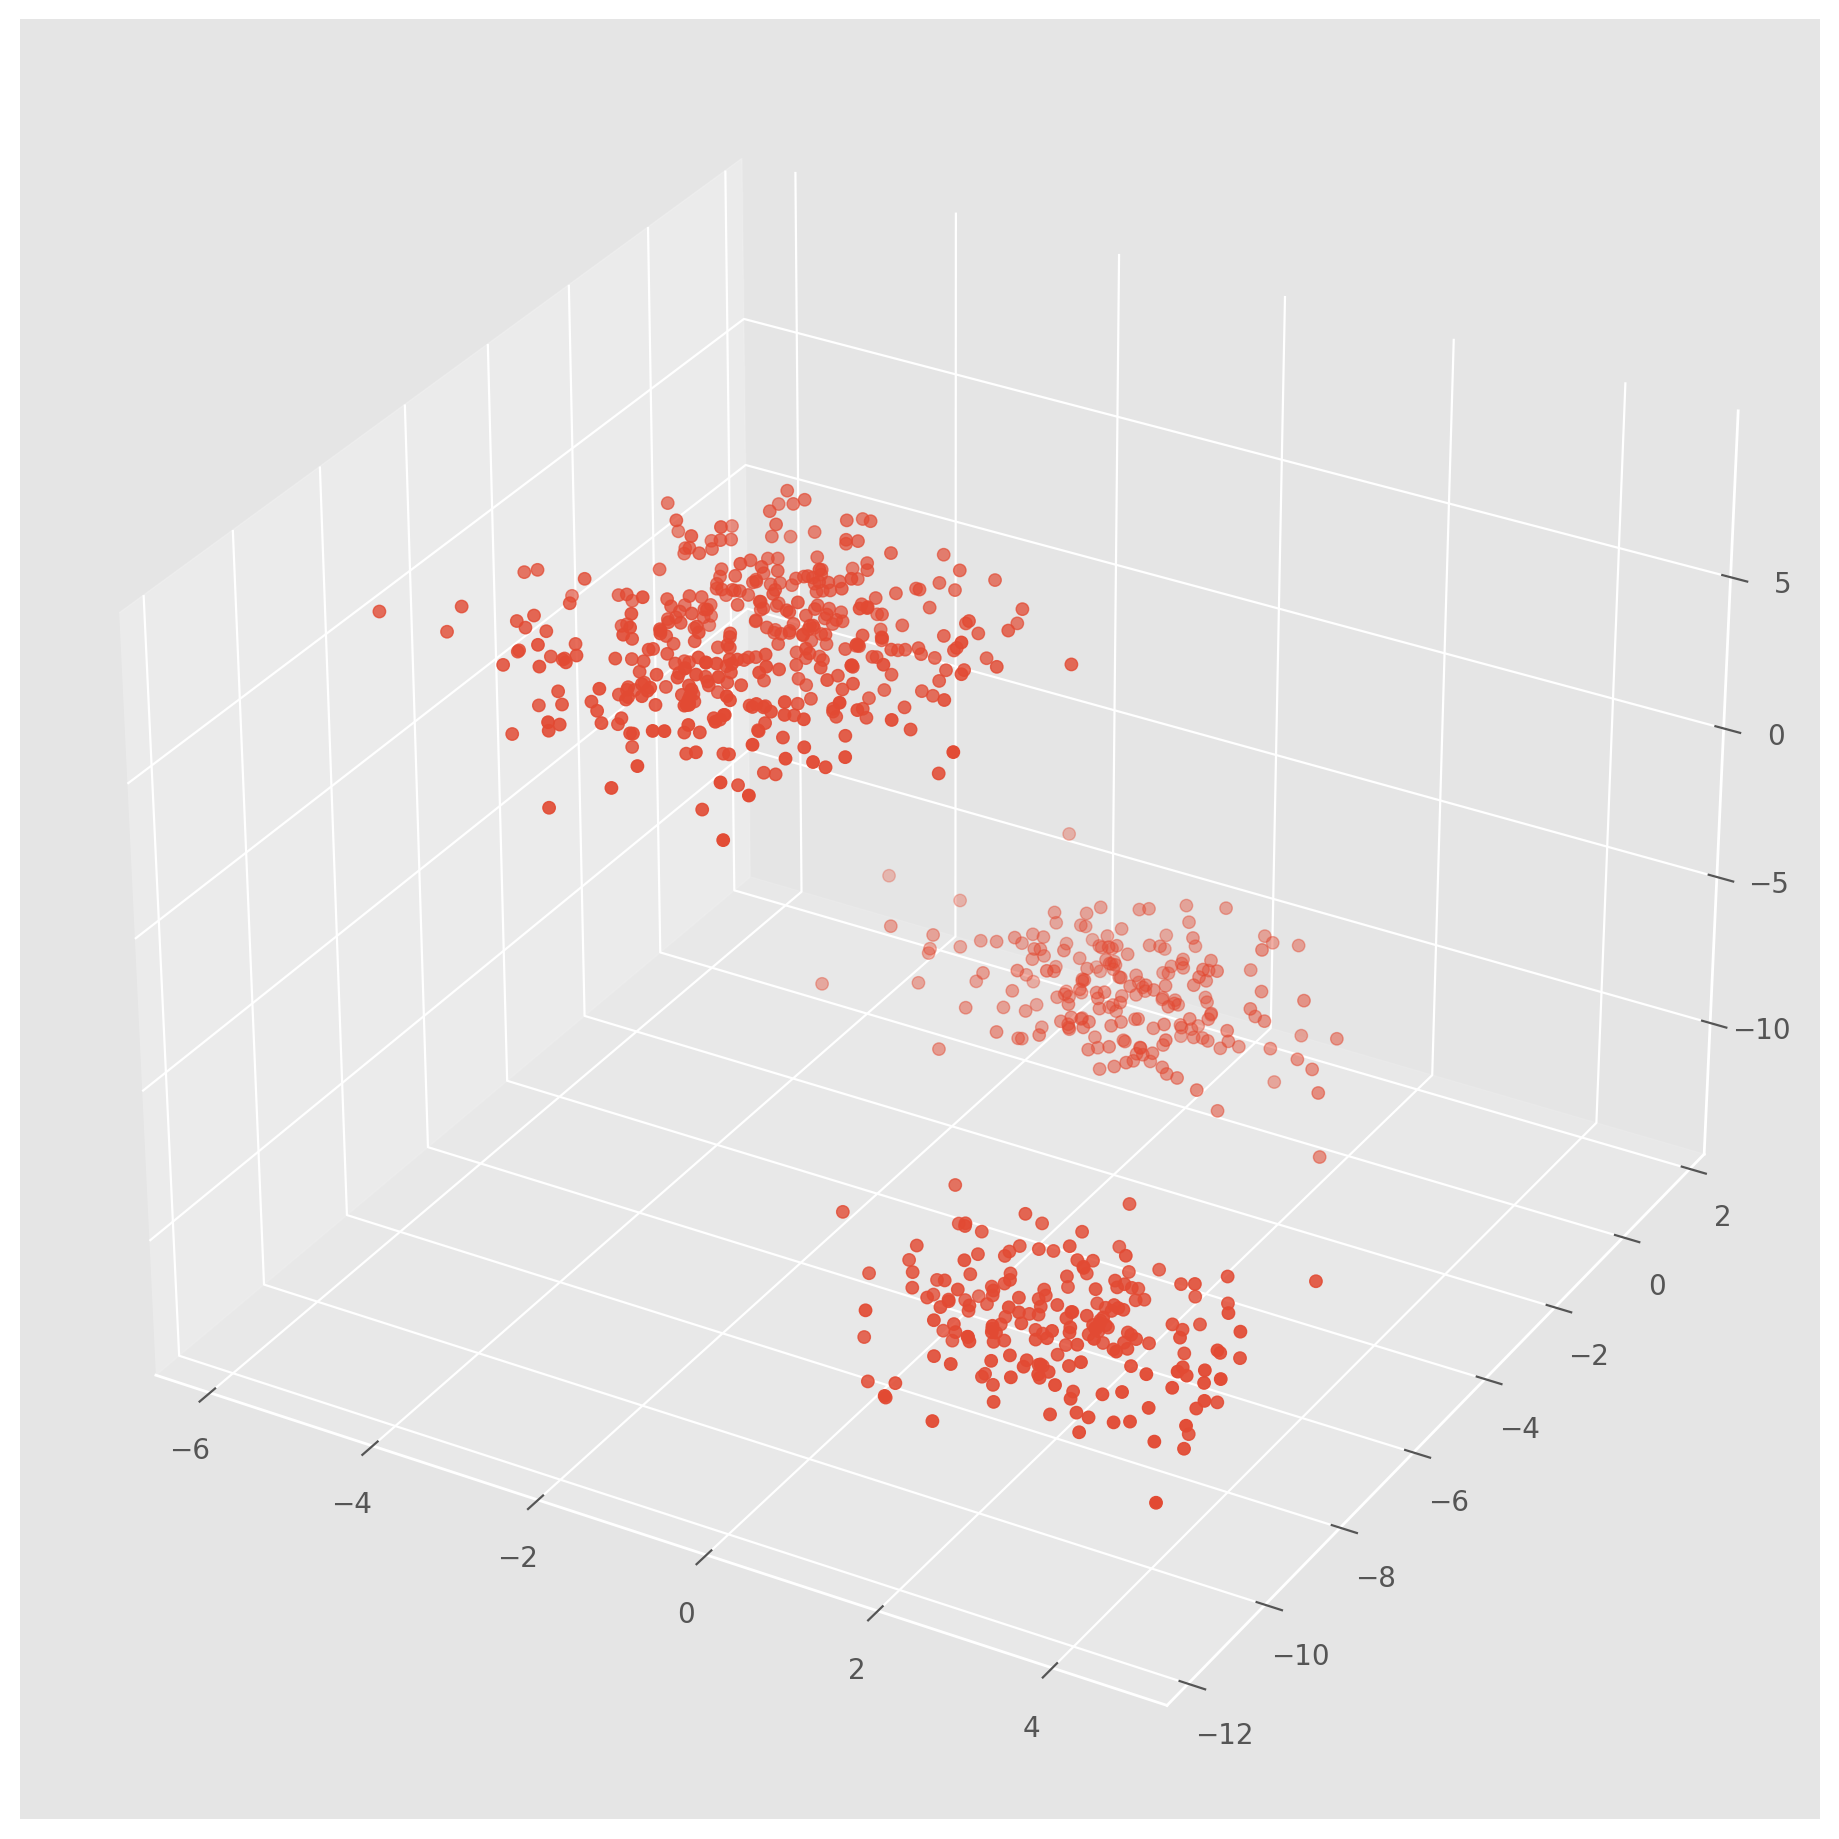

In [27]:
plot_cluster_data(X, show_dims=3)

In [99]:
x = np.random.random(5)
# array([0.75173729, 0.34763686, 0.71927609, 0.24151473, 0.22294162])

y = np.random.random(5)
# array([0.98036113, 0.45482745, 0.87472311, 0.92923963, 0.62922737])

In [98]:
np.vstack([x, y])

array([[0.98369601, 0.39788768, 0.10635387, 0.85776113, 0.15895887],
       [0.65425931, 0.44897387, 0.83169112, 0.42474042, 0.39820582]])

In [96]:
np.linalg.norm(x - y, axis=0)

0.9391477553336555

In [97]:
xy = np.vstack([x, y])
pdist(xy, metric="euclidean")

array([0.93914776])

In [113]:
def CalculateDistanceMultiDim(sample, centroid, axis=1, method='euclidean'):
    """
    计算样本与聚类中心的欧氏距离（默认）
    ----
    axis = 1，单次计算多个样本之间的欧氏距离
    axis = 0，单次计算两个样本之间的欧氏距离
    """
    return np.linalg.norm(sample - centroid, axis=axis)

In [104]:
import numpy as np
from scipy.spatial.distance import pdist

def CalculateDistance(sample, centroid, method='euclidean', p=None):
    """
    距离度量
    ----
    method:
        1. 欧氏距离 euclidean
        2. 闵可夫斯基距离 minkowski
        3. 曼哈顿距离 cityblock
        4. 切比雪夫距离 chebyshev
        5. 余弦相似度 cosine
        6. 汉明距离 hamming
        7. 兰氏距离 canberra
        8. 马氏距离 mahalanobis
    """
    sc = np.vstack([sample, centroid])
    # ###################### 1. 欧氏距离 ###################### 
    if method == 'euclidean':
        return pdist(sc, metric="euclidean")
    
    # ###################### 2. 闵可夫斯基距离 ######################
    elif method == 'minkowski':
        if not p:
            print(f"[Error] You mush pass the param p when choose method = {method}!")
        else:
            return pdist(sc, metric="minkowski", p=p)
    
    # ###################### 3. 曼哈顿距离 ######################
    elif method == '':
        return pdist(sc, metric="cityblock")
    
    # ###################### 4. 切比雪夫距离 ######################
    elif method == 'chebyshev':
        return pdist(sc, metric="chebyshev")
    
    # ###################### 5. 余弦相似度距离 ######################
    elif method == 'cosine':
        return 1 - pdist(sc, metric="cosine")
    
    # ###################### 6. 汉明距离 ######################
    elif method == 'hamming':
        return pdist(sc, metric="hamming")
    
    # ###################### 7. 兰氏距离 ######################
    elif method == 'canberra':
        return pdist(sc, metric="canberra")
    
    # ###################### 8. 马氏距离 ######################
    elif method == 'mahalanobis':
        return pdist(sc, metric="mahalanobis")
    
    # ###################### 9. 欧氏距离 ######################
    else:
        print("[Error] You must choose choice 1 to 8 method!")

In [148]:
import sys

def InitCentroids(X, k, method='random'):
    """
    初始化聚类中心
    ----
    X: array, dataset
    k: int, cluster number
    method: str, 'random'(k-means); 'k-means++'
    ----
        KMeans++改进了KMeans算法选择初始质心的方式。
        其核心思想是：在选择一个聚类中心时，距离已有的聚类中心越远的点，被选取作为聚类中心的概率越大。
    """
    # 样本个数
    n_samples  = X.shape[0]
    # 样本特征数
    n_features = X.shape[1]
    
    # 生成样本索引
    indexs = np.arange(0, n_samples)
    # 打乱顺序
    # 此函数仅沿多维数组的第一个轴对数组进行打乱。子数组的顺序改变，但内容不变。
    np.random.shuffle(indexs)
    # 初始化聚类簇中心，shape=(k, n_features)
    centroids = np.zeros((k, n_features))
    
    # 类型转换，统一格式为 numpy.array
    if type(X) == pd.core.frame.DataFrame:
        X = X.to_numpy()
        
    if method == 'k-means++':
        # 从数据集中随机选择一个样本点作为第一个聚类中心
        centroids[0, ] = X[indexs[0], :]
        print(centroids.shape)
        
        # 从剩余样本中选择 k - 1 个聚类中心
        for centroid in range(k - 1):
            # 定义一个列表存储离聚类中心最近的样本点
            dists = []
            
            for i in range(n_samples):
                # 单一样本
                point = X[i, :]
                # 初始化距离
                min_dist = sys.maxsize
                
                # 计算 point 与之前的每一个聚类中心的距离 
                # 选择质心并存储最小距离
                for j in range(len(centroids)):
                    # temp_dist = CalculateDistance(point, centroids[j], axis=0)
                    temp_dist = CalculateDistance(point, centroids[j], method='euclidean', p=None)
                    # 存储最小距离
                    min_dist = min(min_dist, temp_dist)
                    
                dists.append(min_dist)
                
            # 遍历完样本之后，选择距离最大的数据点作为下一个质心
            max_dist = np.argmax(np.array(dists))
            next_centroid = X[max_dist, :]
            # 存储第二个及其之后的聚类中心
            centroids[centroid+1, :] = next_centroid
            
            # dists 清零
            dists = []
            
    # 随机初始化：即随机从样本中选择 k 个样本点作为初始聚类中心
    else:
        # 取打乱顺序之后的前 k 个样本作为初始聚类中心
        top_k_index = indexs[:k]
        # 用这k个样本的值作为初始化的簇中心
        centroids = X[top_k_index, :]

    return centroids

In [106]:
InitCentroids.__doc__

"\n    初始化聚类中心\n    ----\n    X: array, dataset\n    k: int, cluster number\n    method: str, 'random'(k-means); 'k-means++'\n    ----\n        KMeans++改进了KMeans算法选择初始质心的方式。\n        其核心思想是：在选择一个聚类中心时，距离已有的聚类中心越远的点，被选取作为聚类中心的概率越大。\n    "

In [177]:
centroids = InitCentroids(X, k=3, method='random')
centroids

array([[ -0.38194265,  -1.60748355, -10.91985604],
       [ -0.49032439,  -2.17939547,  -8.85168961],
       [  0.09790141,  -0.56107242, -10.07349723]])

In [178]:
centroids = InitCentroids(X, k=3, method='k-means++')
centroids

(3, 3)


array([[ -2.13437935,  -7.74008724,   5.46506916],
       [  4.39138124, -10.80745447, -10.97209713],
       [ -1.5162135 ,   0.90099369, -11.90189932]])

In [112]:
centroids.shape

(3, 3)

In [48]:
def plot_k_means_centroids(X, centroids):
    '''
    绘制 k-means++ 算法的簇中心的初始化选择过程
    '''
    # 类型转换，统一格式为 numpy.array
    if type(X) == pd.core.frame.DataFrame:
        X = X.to_numpy()
        
    plt.figure(tight_layout=True)
    plt.scatter(X[:, 0], X[:, 1], marker = '.', color = 'gray', 
                label = 'data points')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1], color = 'black', 
                label = 'previously selected centroids')
    plt.scatter(centroids[-1, 0],  centroids[-1, 1],  color = 'red', 
                label = 'next centroid')
    plt.title('Select % d th centroid'%(centroids.shape[0]))
      
    plt.legend()
    plt.show()

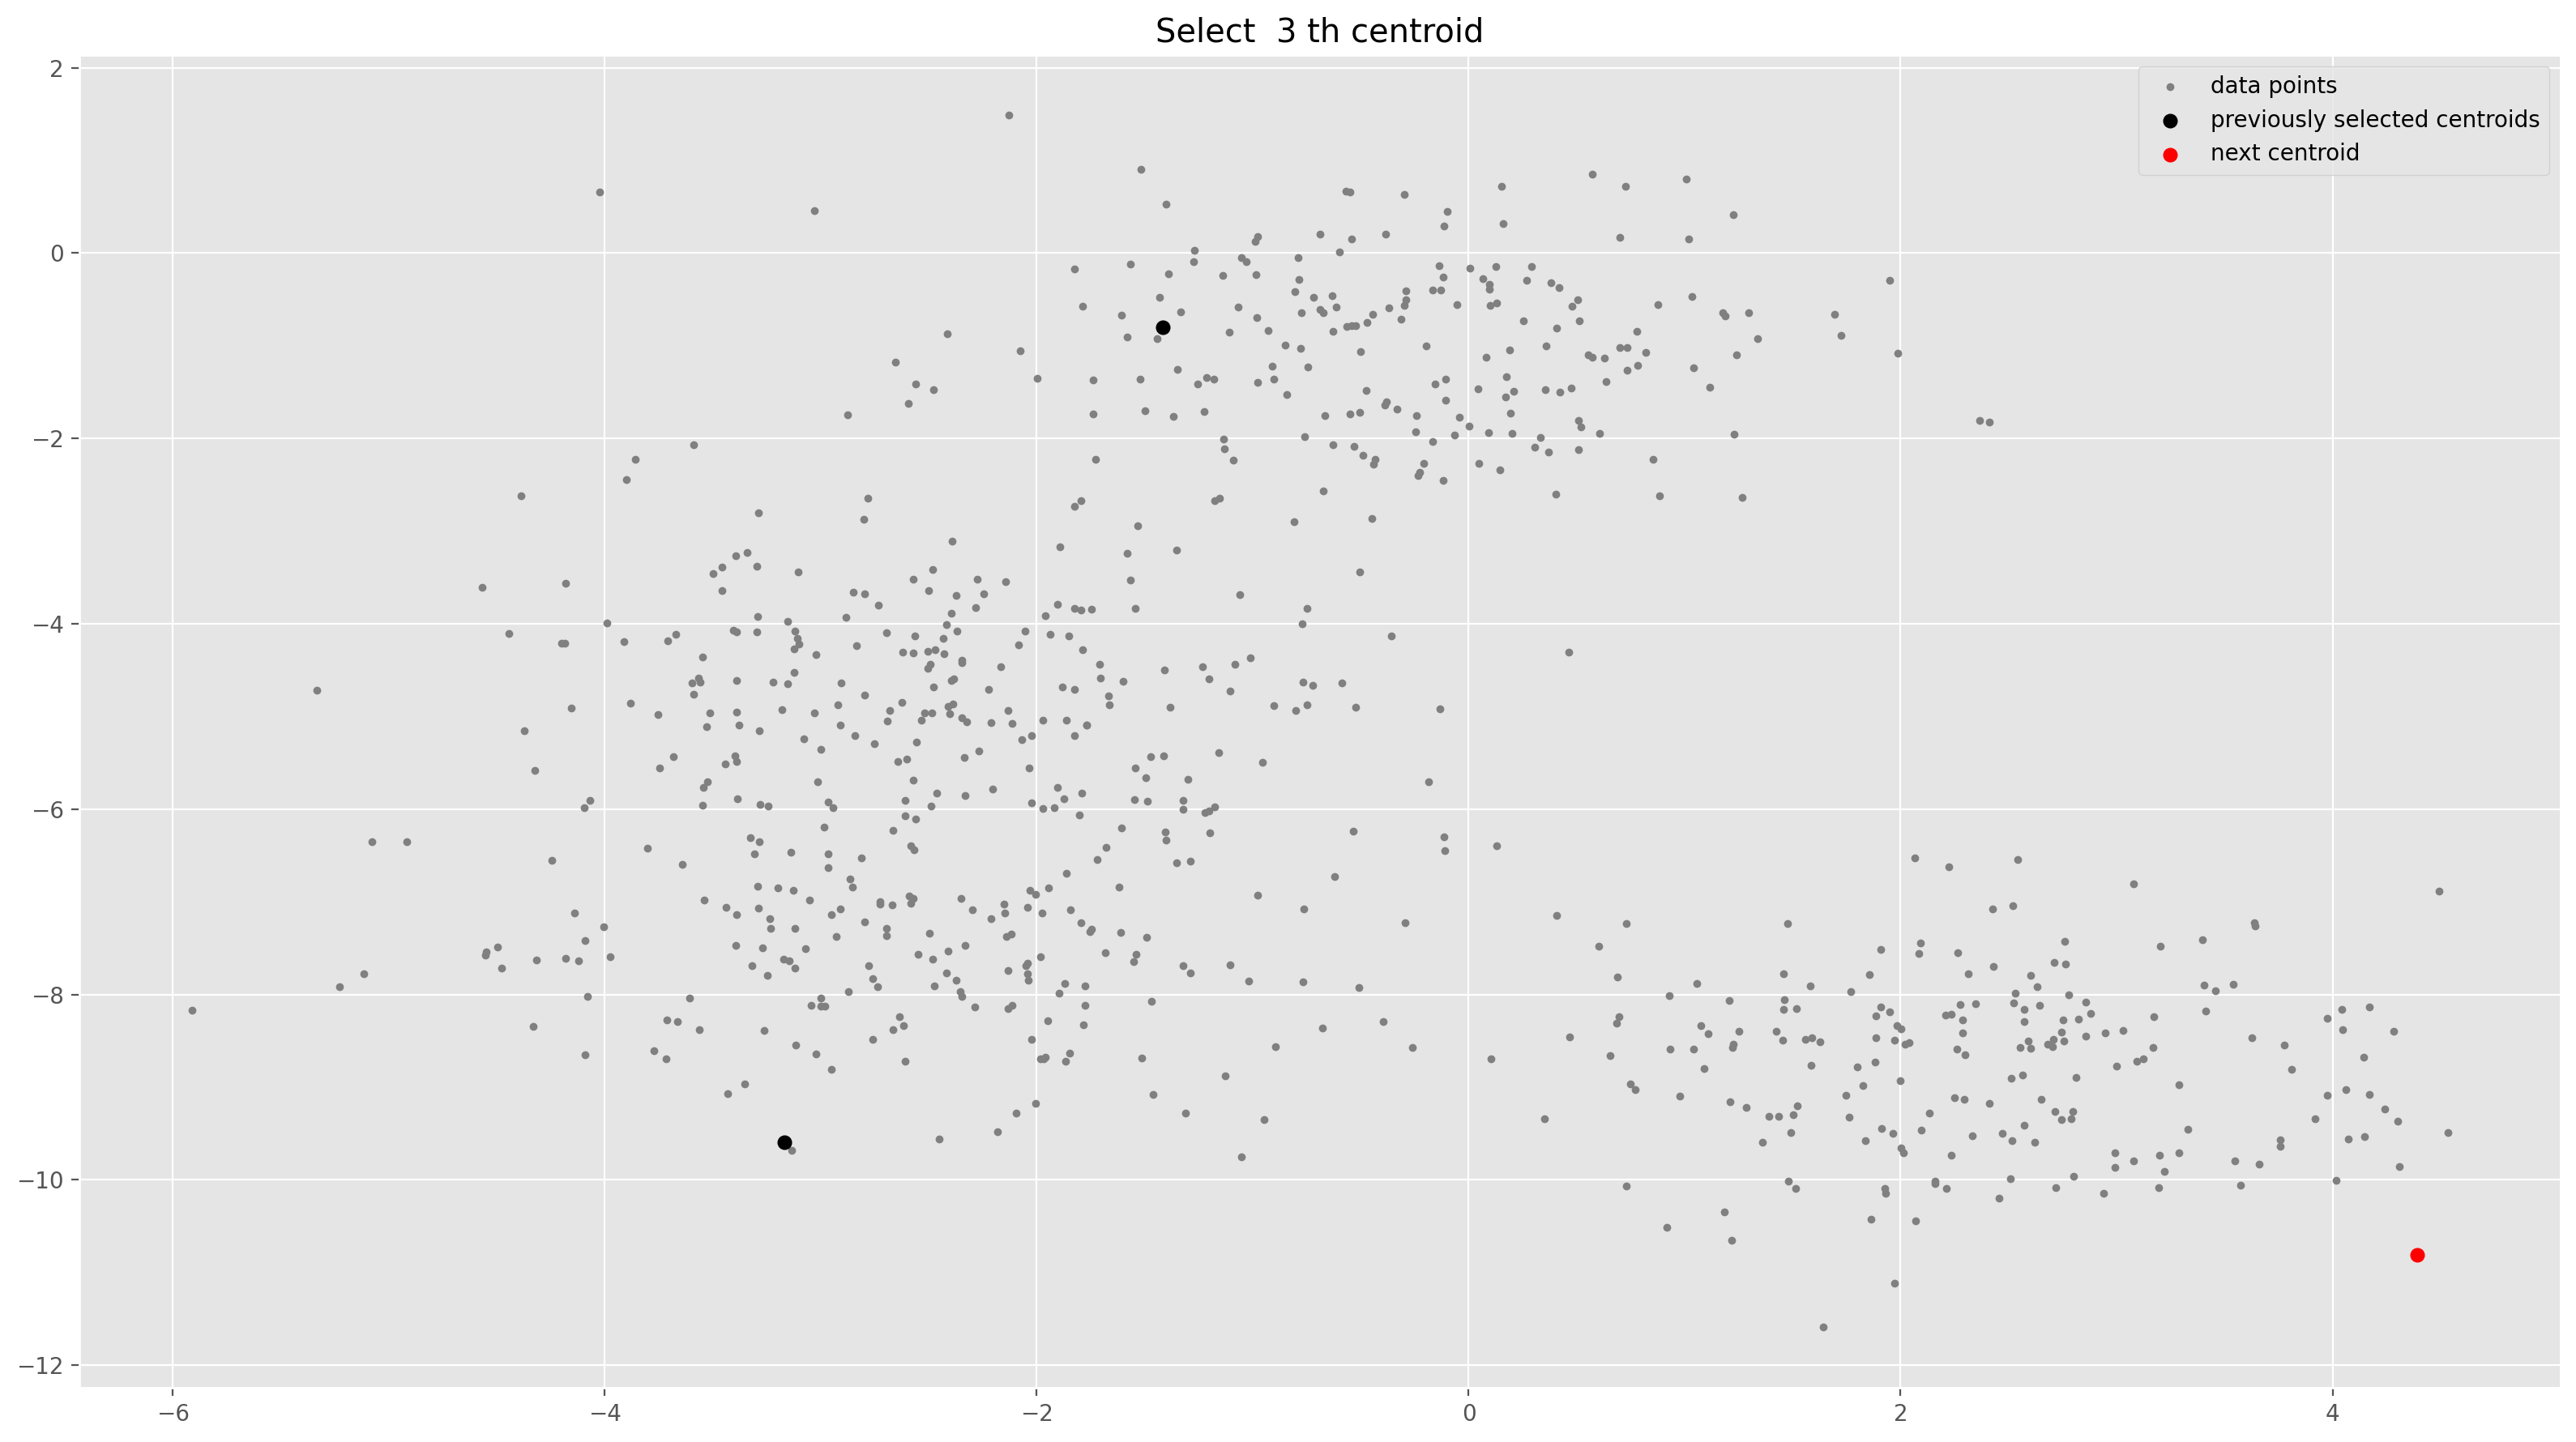

In [92]:
plot_k_means_centroids(X, centroids)

# K-Means and K-Means ++

In [303]:
def k_means(X, n_cluster, init_method='random', n_iter=100, plot_process=False):
    init_centroids = InitCentroids(X, k=n_cluster, method=init_method)
#     print(init_centroids.shape)
    
    # 类型转换，统一格式为 numpy.array
    if type(X) == pd.core.frame.DataFrame:
        X = X.to_numpy()
        
    # 用于保存聚类中心更新前的值
    old_centroids = np.zeros(init_centroids.shape)
#     print(old_centroids.shape)
    
    # 更新后的聚类中心的值
    new_centroids = deepcopy(init_centroids)
    
    # 用于保存数据所属的簇
    n_samples = len(X)
    clusters = np.zeros(n_samples)
    
    # 迭代标识符，计算新旧聚类中心的距离
    distance_flag = CalculateDistanceMultiDim(init_centroids, old_centroids, axis=1)
    
    if n_iter:
        current_iter = 1
        iteration_flag = (current_iter < n_iter)
    # 去掉最大循环次数限制
    else:
        iteration_flag = True
        
    # 若聚类中心不再变化或者迭代次数超过n_iter次(可取消)，则退出循环
    while distance_flag.any() != 0 and iteration_flag:
        # 1. 计算每个样本点所属的簇（距离最近的簇）
        for i in range(n_samples):
            # 样本与k个聚类中心的距离
            distances = CalculateDistanceMultiDim(X[i], new_centroids, axis=1)
            # 当前样本与k个聚类中心的最近距离
            cluster = np.argmin(distances)
            # 记录当前样本点所属的聚类中心
            clusters[i] = cluster
            
        # 2. 更新聚类中心
        # 记录更新前的聚类中心
        old_centroids = deepcopy(new_centroids)
        
        # 属于同一个簇的样本点放到一个数组中，然后按照列的方向取平均值
        for i in range(n_cluster):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            new_centroids[i] = np.mean(points, axis=0)
            
        # 3. 判断是否满足迭代停止条件
        if current_iter % 5 == 0:
            print(f"[INFO] Iteration {current_iter}：distance_flag = {distance_flag}.")
        
        distance_flag = CalculateDistanceMultiDim(new_centroids, old_centroids, axis=1)
        current_iter += 1
        
        if plot_process:    # 如果绘制图像
            plt = plot_cluster_process_2d(X, new_centroids,old_centroids) # 画聚类中心的移动过程
    
    if plot_process:    # 显示最终的绘制结果
        plt.show()
        
    # 返回每个样本所属的类以及更新后的聚类中心
    return clusters, new_centroids

In [189]:
centroids

array([[ -2.13437935,  -7.74008724,   5.46506916],
       [  4.39138124, -10.80745447, -10.97209713],
       [ -1.5162135 ,   0.90099369, -11.90189932]])

In [191]:
CalculateDistanceMultiDim(X[0], centroids, axis=1)

array([ 4.16260636, 19.67865978, 18.39772552])

In [137]:
np.array([0, 0, 1]).any()

True

(3, 3)


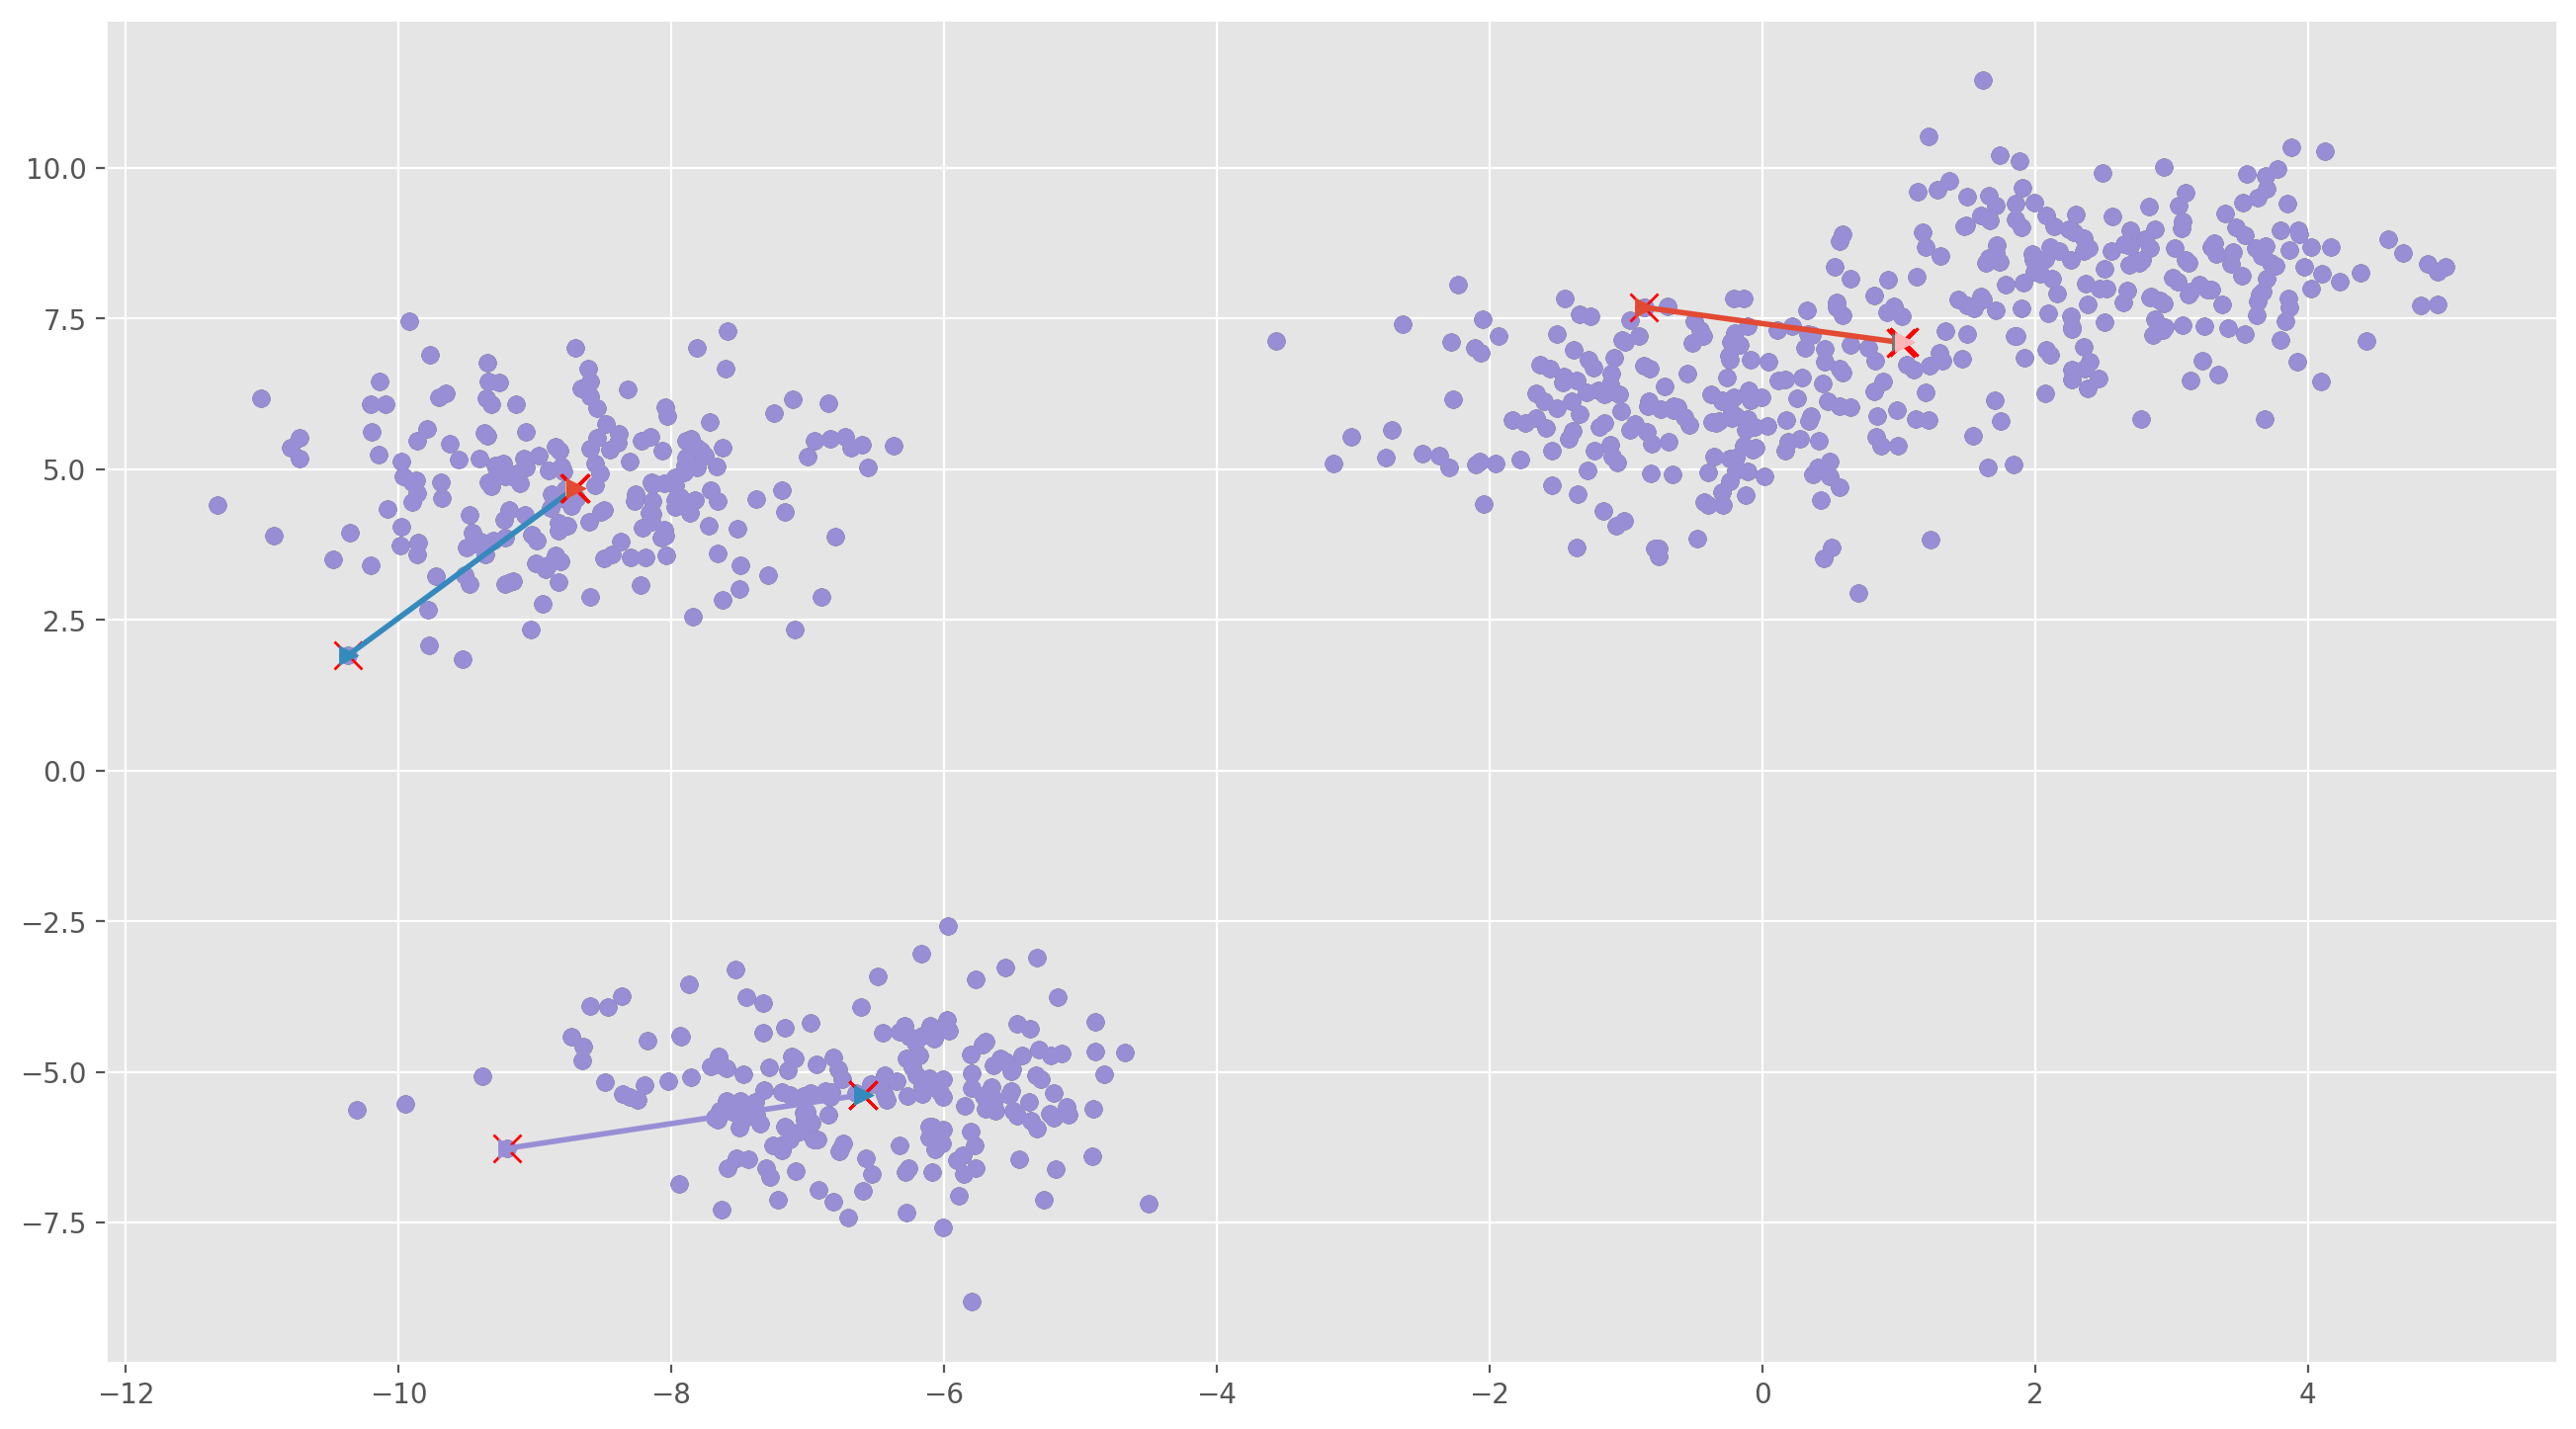

In [309]:
clusters, centroids = k_means(X, n_cluster=3, init_method='k-means++', n_iter=100, plot_process=True)

In [276]:
len(clusters)

3000

In [251]:
np.unique(clusters)

array([0., 1., 2.])

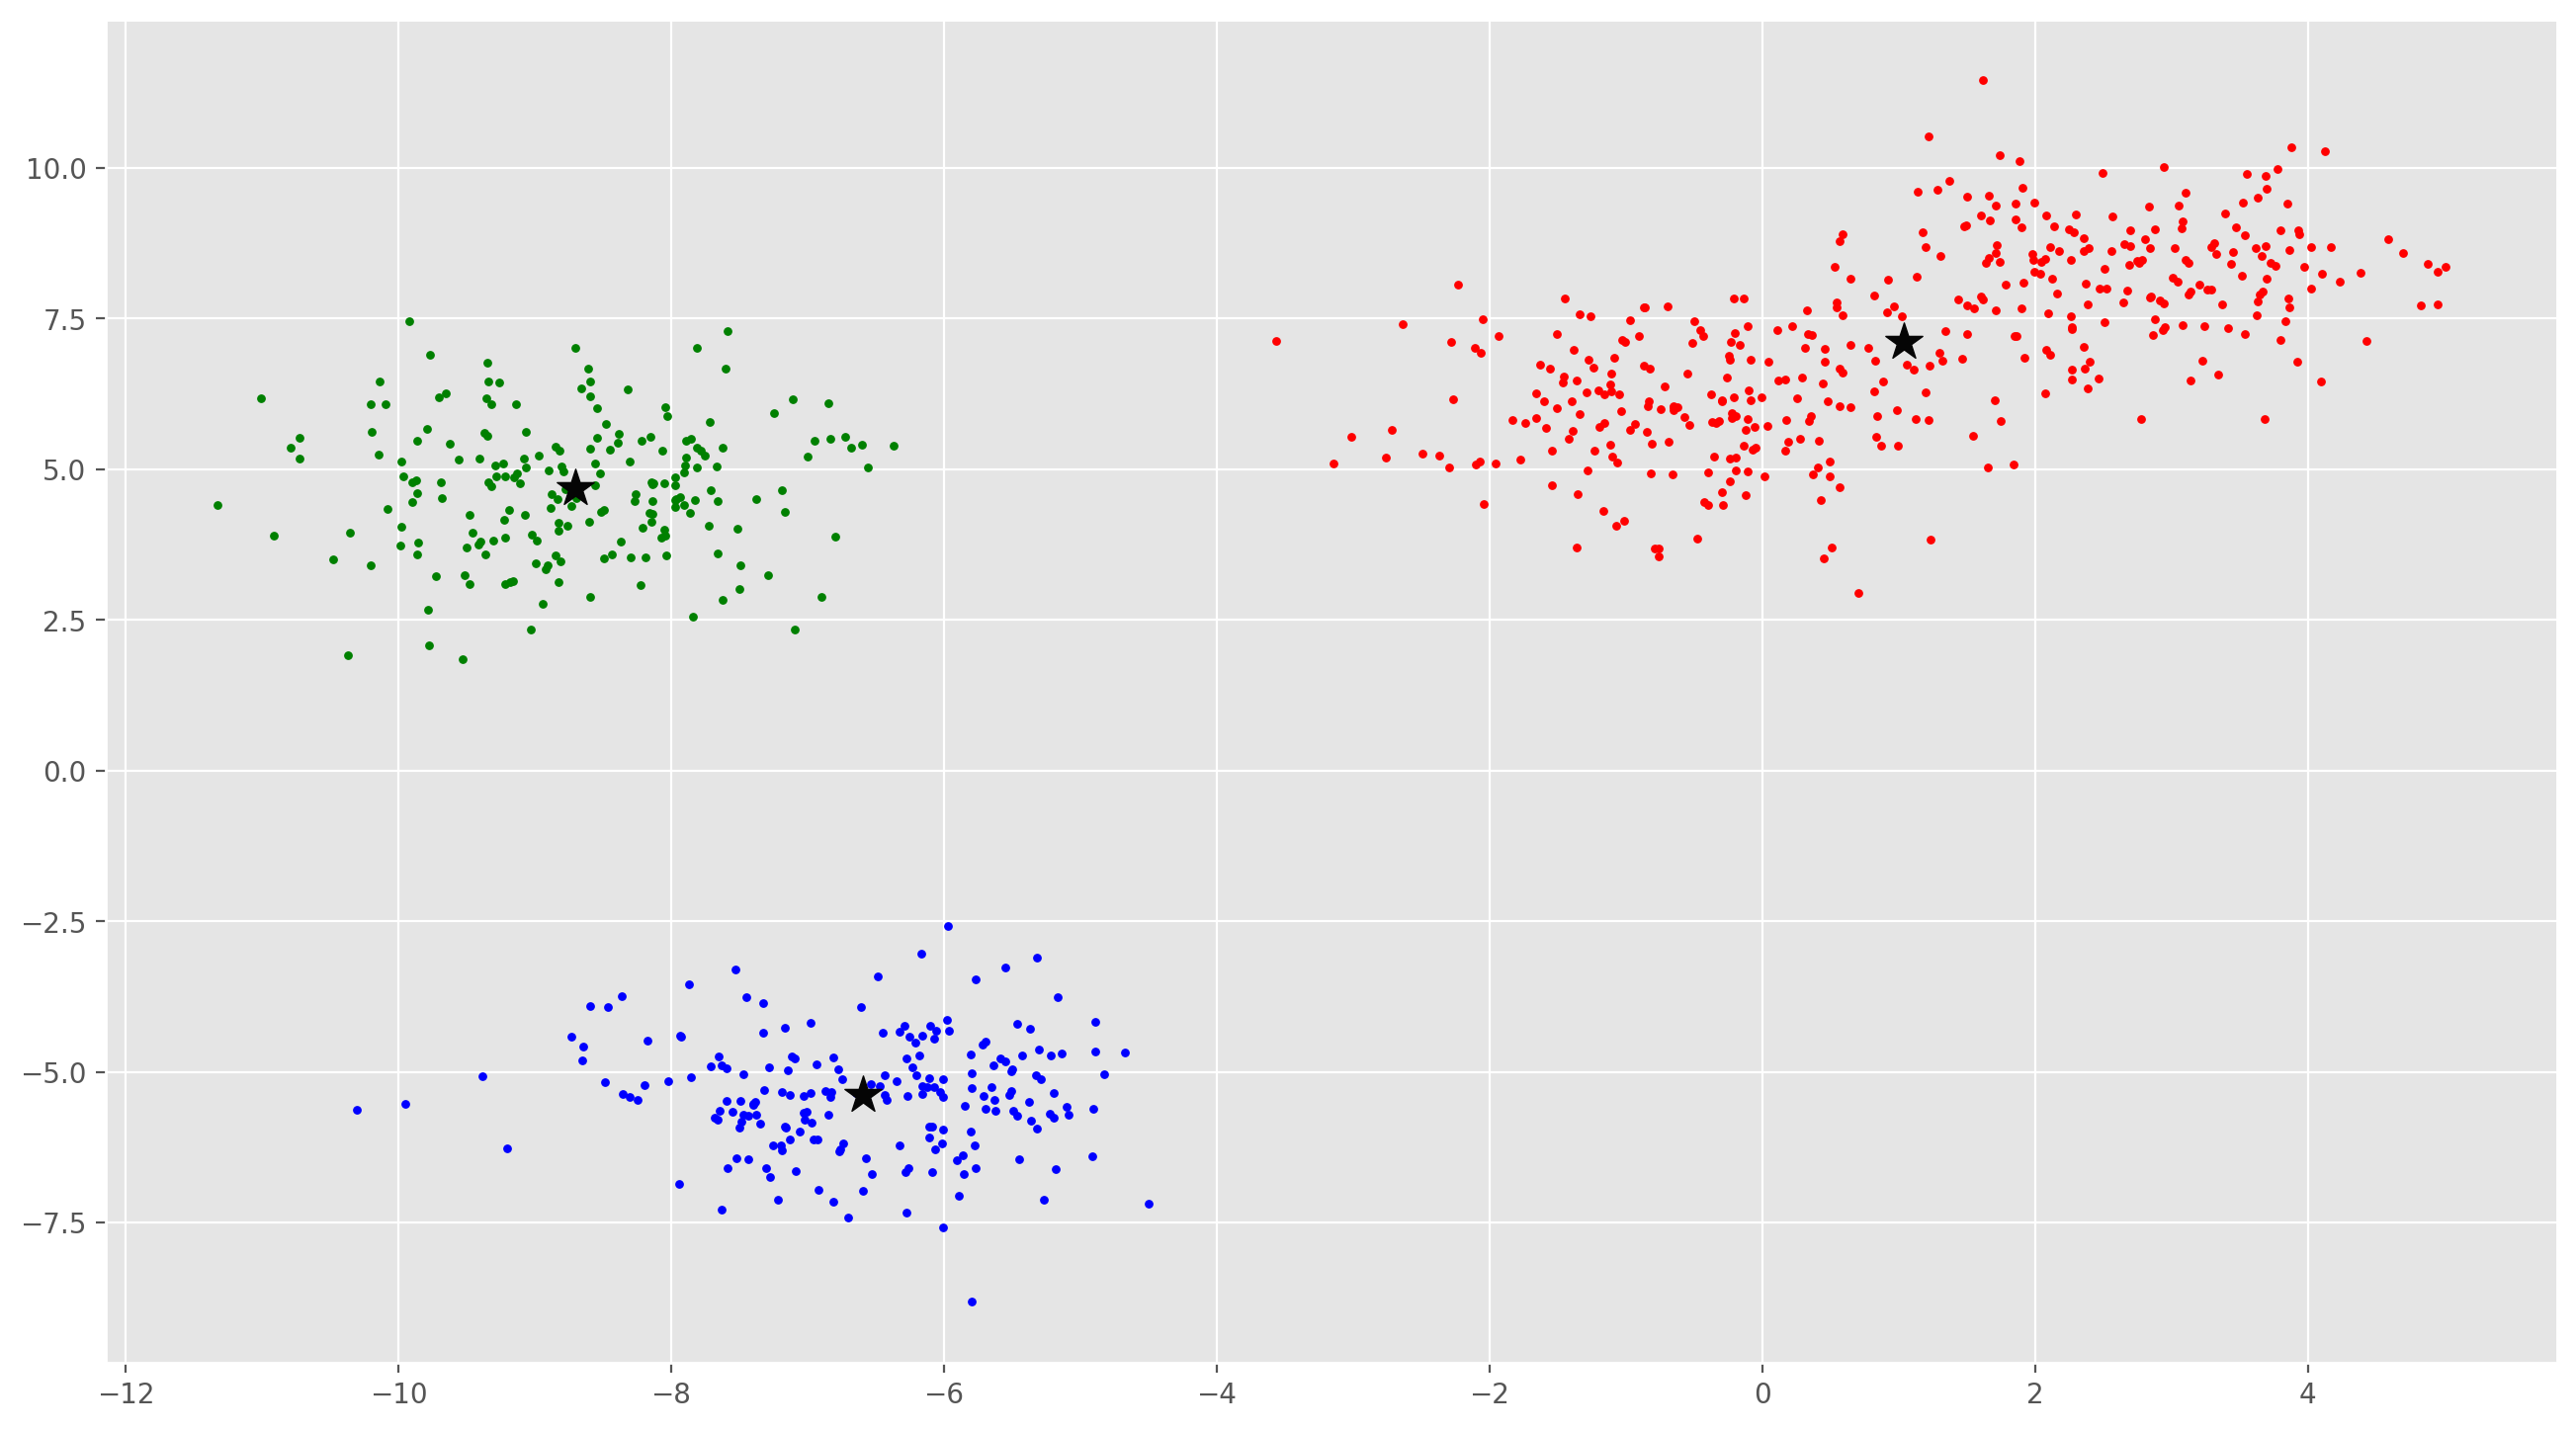

In [300]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')

In [254]:
def generate_colors(n, name='hsv'):
    '''
    Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.
    '''
    return plt.cm.get_cmap(name, n)

In [308]:
# 画图，聚类中心的移动过程        
def plot_cluster_process_2d(X, new_centroids, old_centroids):
    n_cluster = len(new_centroids)
    cmap = generate_colors(n_cluster)
    
    # 原数据的散点图
    plt.scatter(X[:,0], X[:,1], cmap=cmap)
    
    # 上一次聚类中心
    plt.plot(old_centroids[:, 0], 
             old_centroids[:, 1], 
             marker='rx', markersize=10, linewidth=5.0)  
    
    # 当前聚类中心
    plt.plot(new_centroids[:, 0],
             new_centroids[:, 1],
             marker='rx', markersize=10, linewidth=5.0)
    
    # 遍历每个类，画类中心的移动直线
    for j in range(new_centroids.shape[0]): 
        p1 = new_centroids[j, :]
        p2 = old_centroids[j, :]
        plt.plot([p1[0], p2[0]], 
                 [p1[1], p2[1]], 
                 marker="->", linewidth=2.0)
    return plt

In [293]:
def plot_cluster_result_2d(X, clusters, centroids):
    # 类型转换，统一格式为 numpy.array
    if type(X) == pd.core.frame.DataFrame:
        X = X.to_numpy()
        
    n_cluster = len(centroids)
    cmap = generate_colors(n_cluster)
    
    fig, ax = plt.subplots()
    for i in range(n_cluster):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, cmap=cmap)
        
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black')

In [6]:
plot_cluster_result_2d(X, clusters, centroids)

NameError: name 'clusters' is not defined

(3, 2)


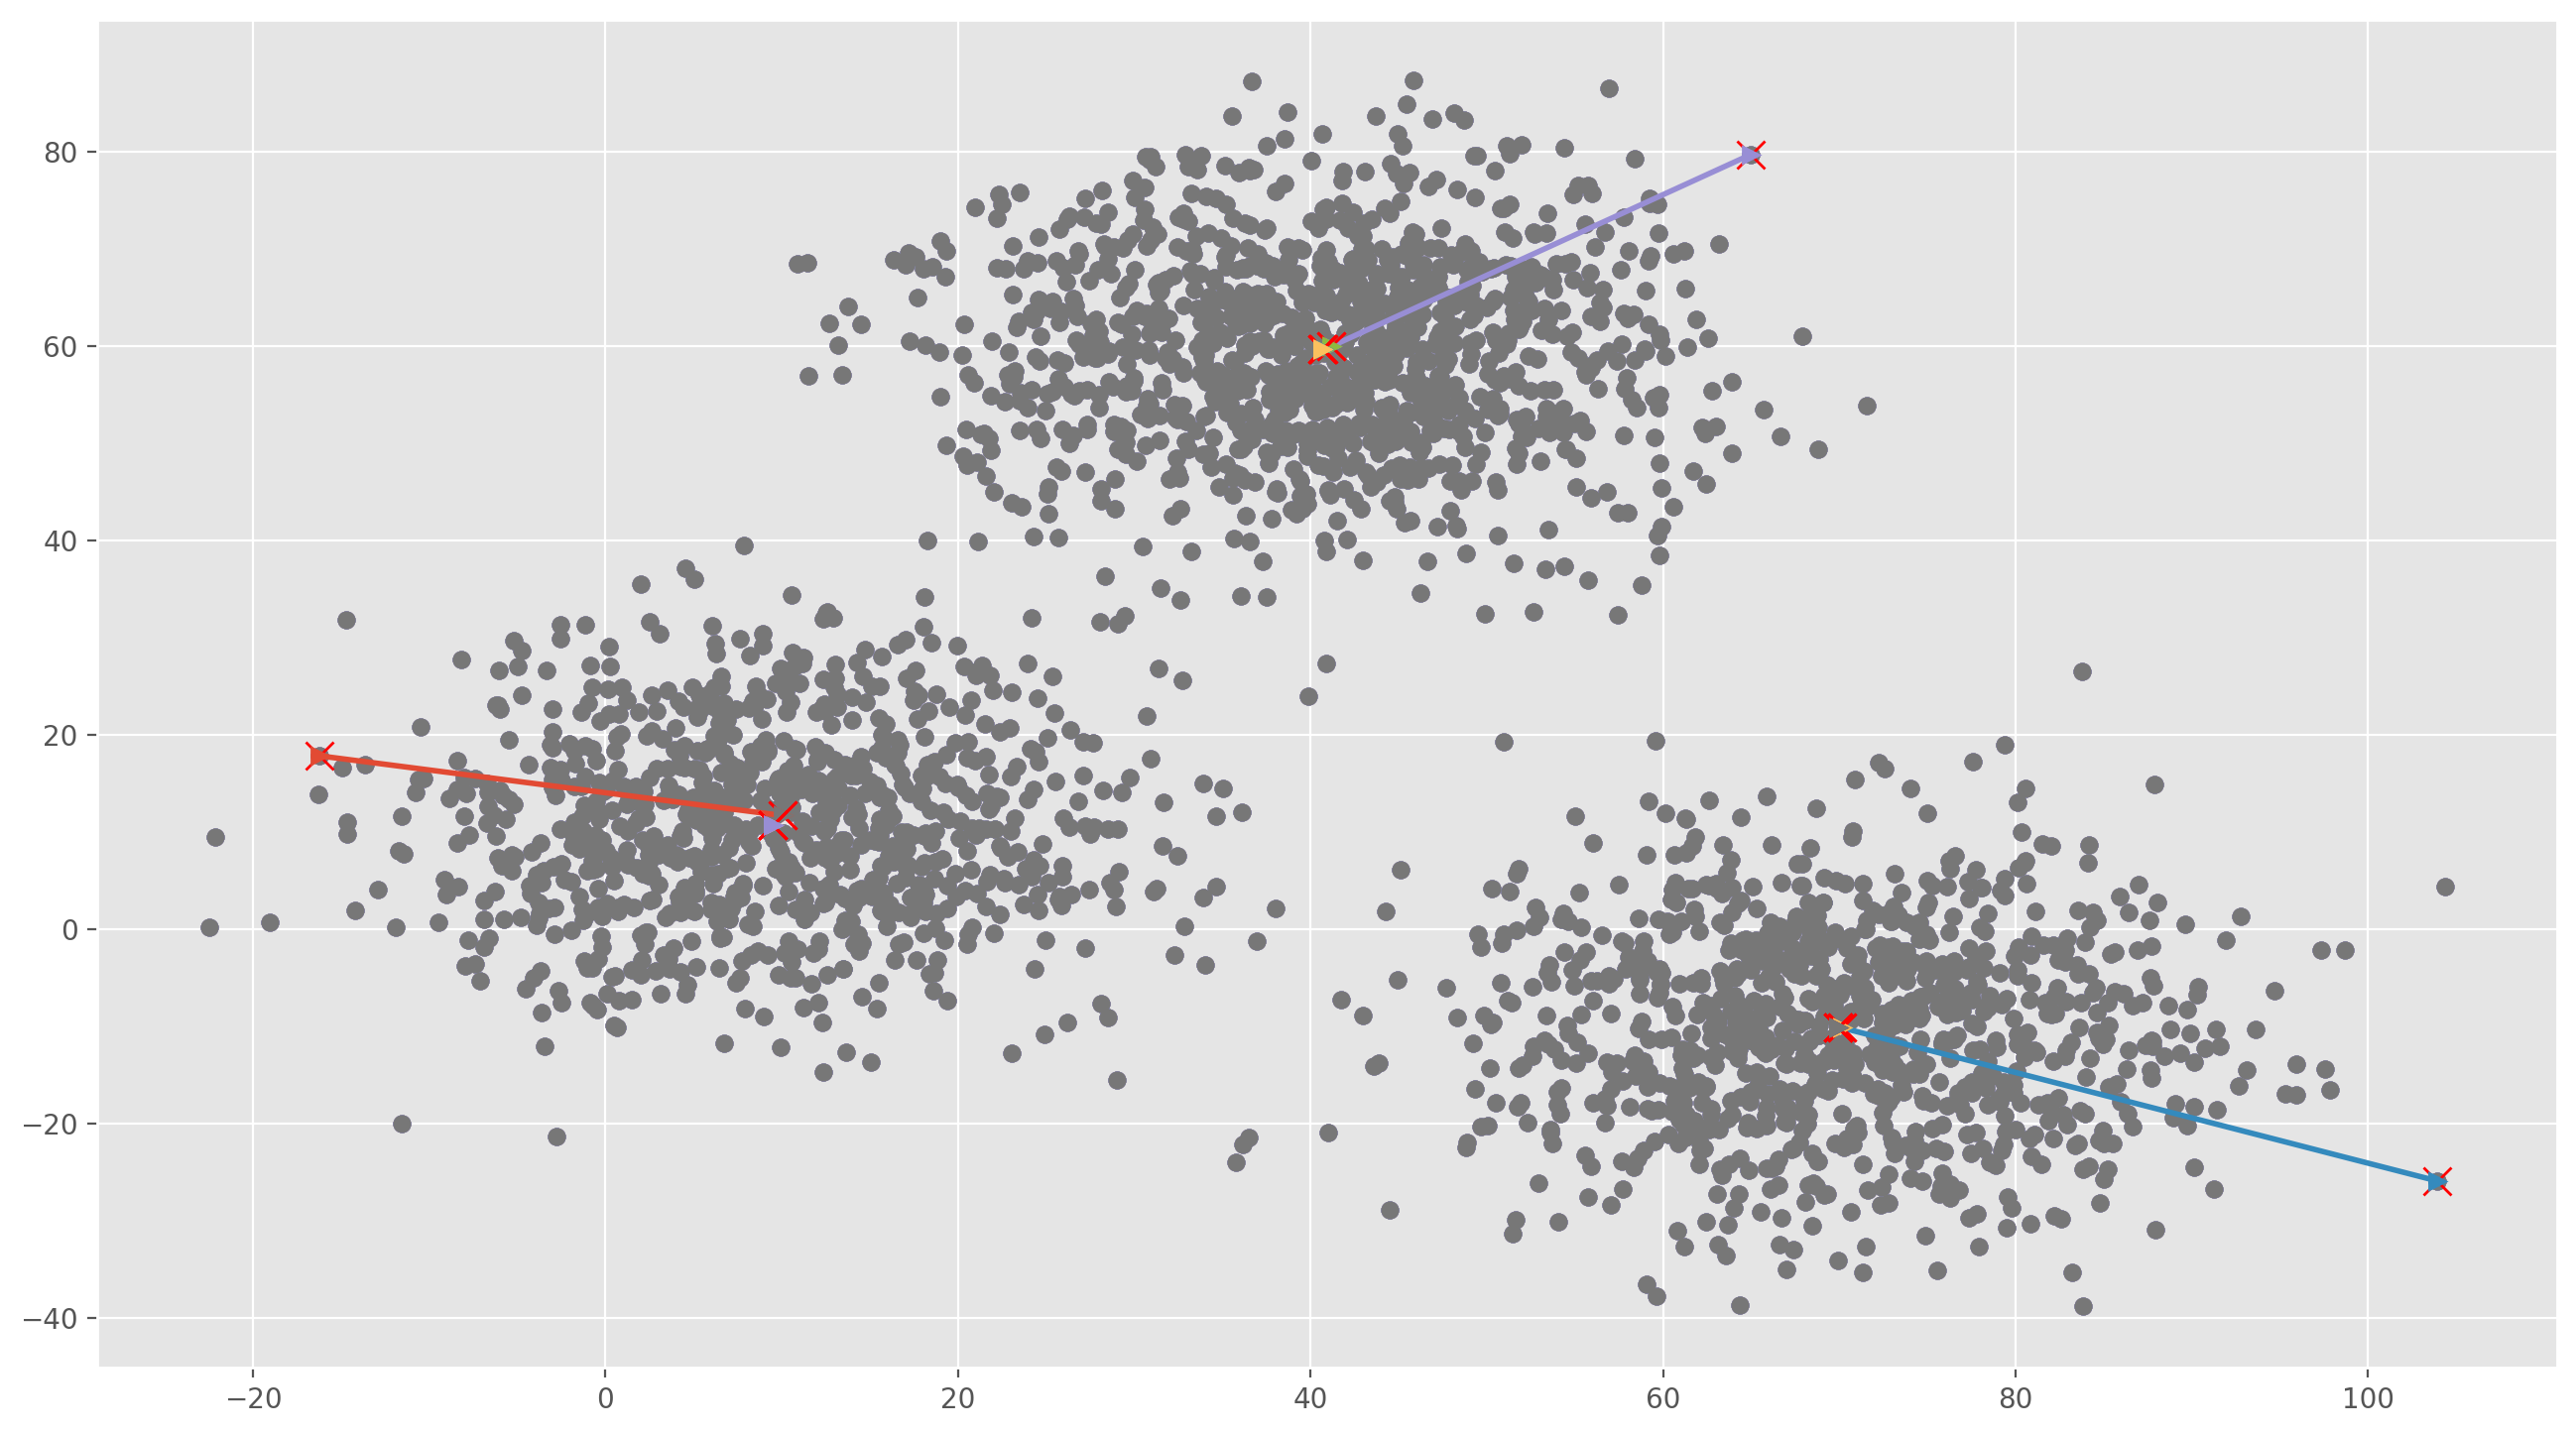

In [310]:
clusters, centroids = k_means(data, n_cluster=3, init_method='k-means++', n_iter=100, plot_process=True)

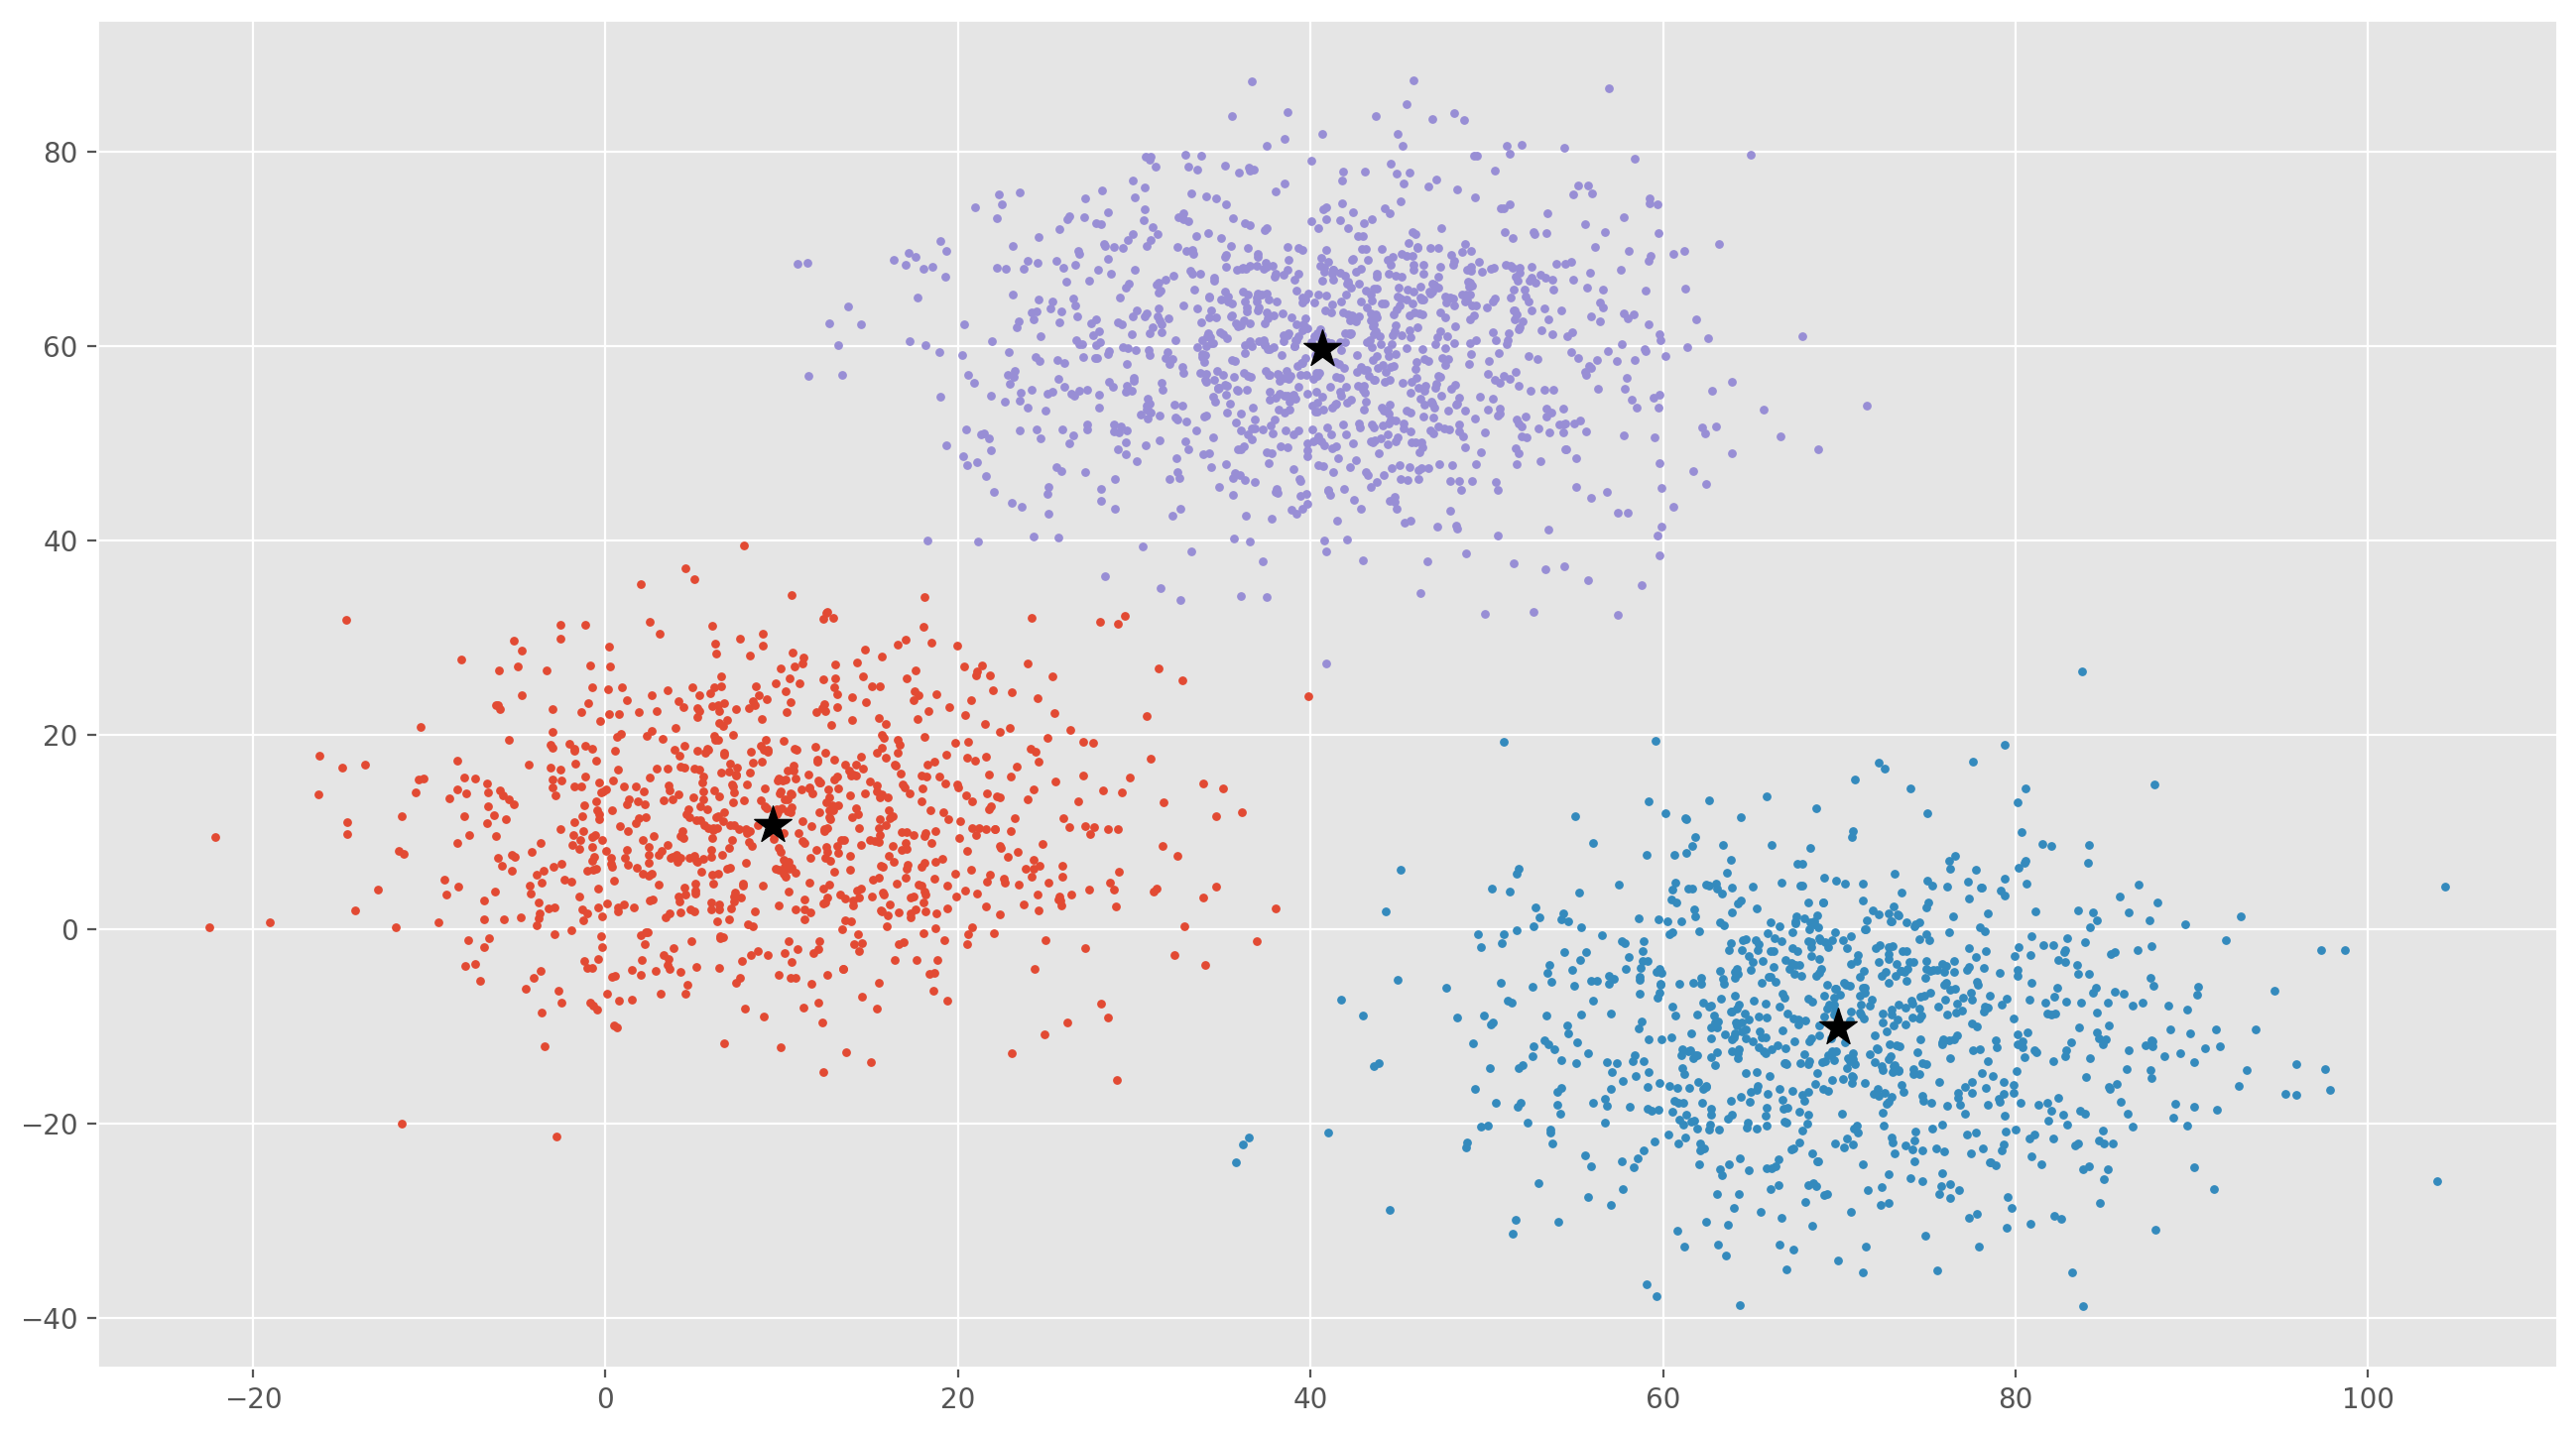

In [312]:
plot_cluster_result_2d(data, clusters, centroids)

In [323]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(data)
# Getting the cluster labels
labels = kmeans.predict(data)
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("Scratch")
print(centroids) # From Scratch
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
Scratch
[[ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]]
sklearn
[[ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]]


# k 的选取

In [ ]:
# cost =[]
# for i in range(1, 11):
# #     km = k_means(data, n_cluster=i, init_method='k-means++', 
# #                  n_iter=100, plot_process=True)
#     KM = KMeans(n_clusters = i, max_iter = 500)
#     KM.fit(X)
#     # calculates squared error for the clustered points
#     cost.append(KM.inertia_)     

# # plot the cost against K values
# plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
# plt.xlabel("Value of K")
# plt.ylabel("Sqaured Error (Cost)")
# plt.show() # clear the plot

# K-Means

(1000, 2) (1000,)


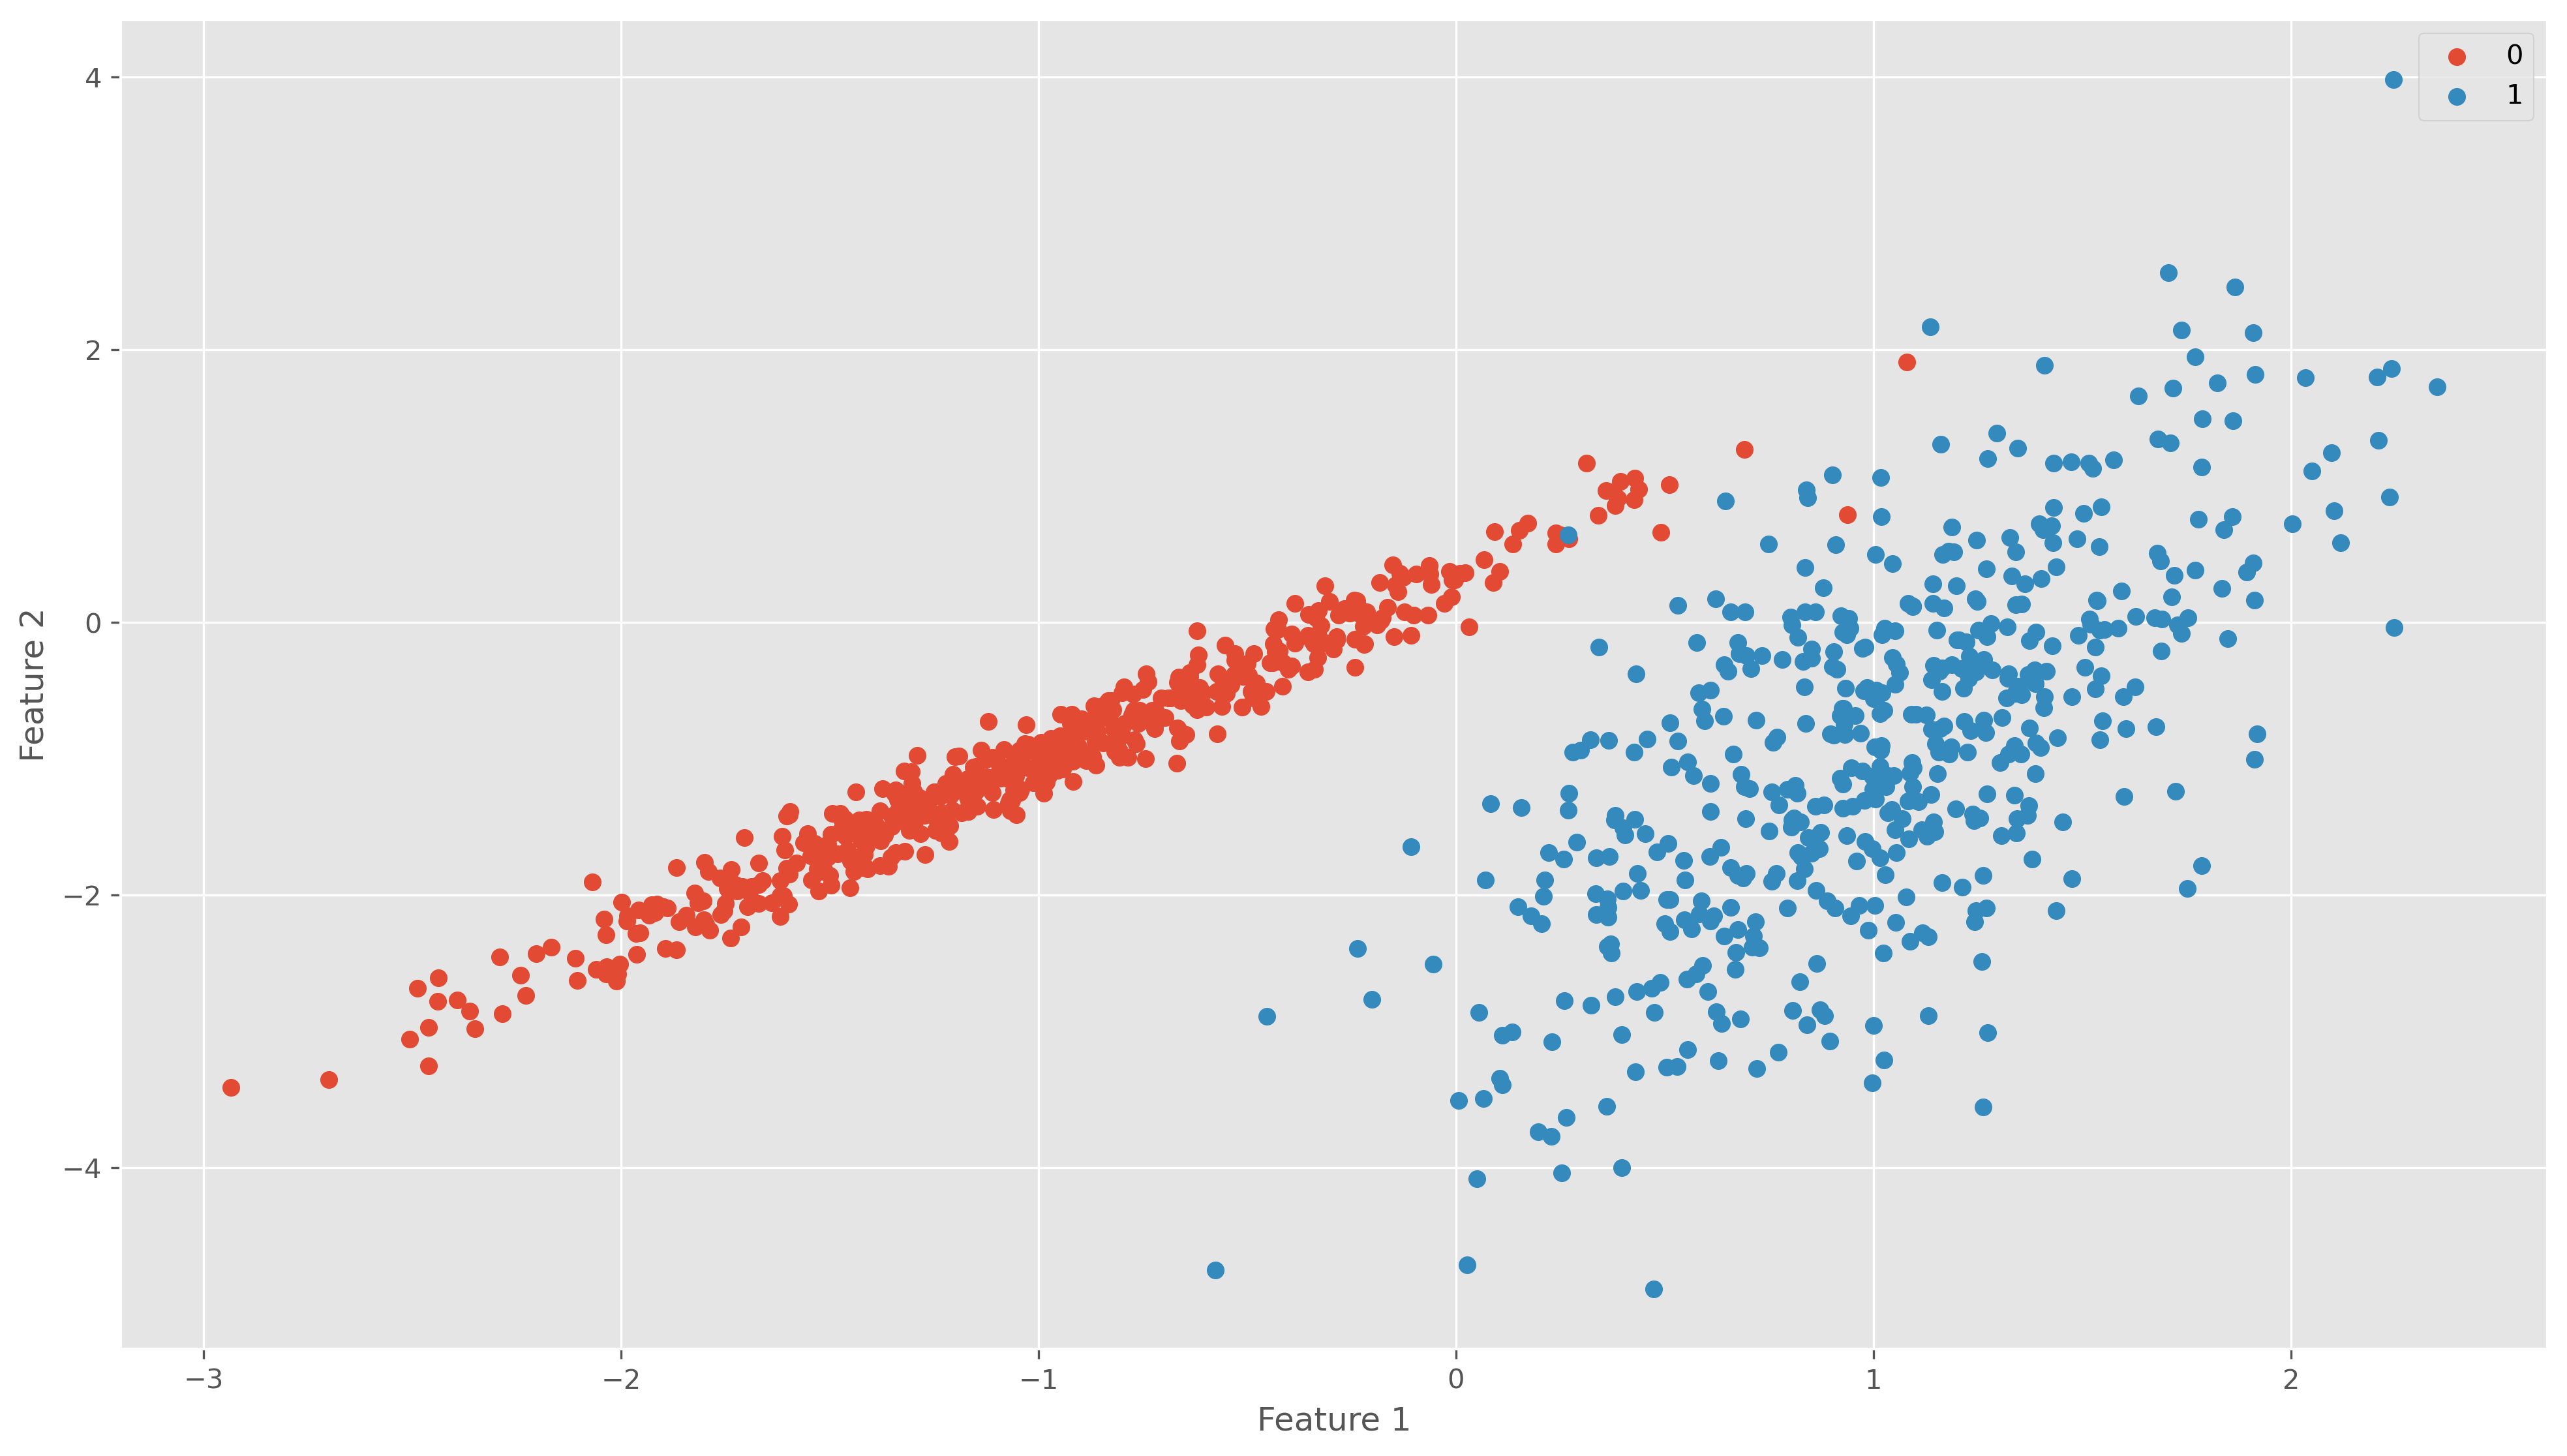

In [315]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

# define dataset
X, y = make_classification(n_samples=1000, 
                           n_features=2, 
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1, random_state=4)
print(X.shape,y.shape)

for class_value in range(2):
    row_ix = np.where(y == class_value)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=class_value)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

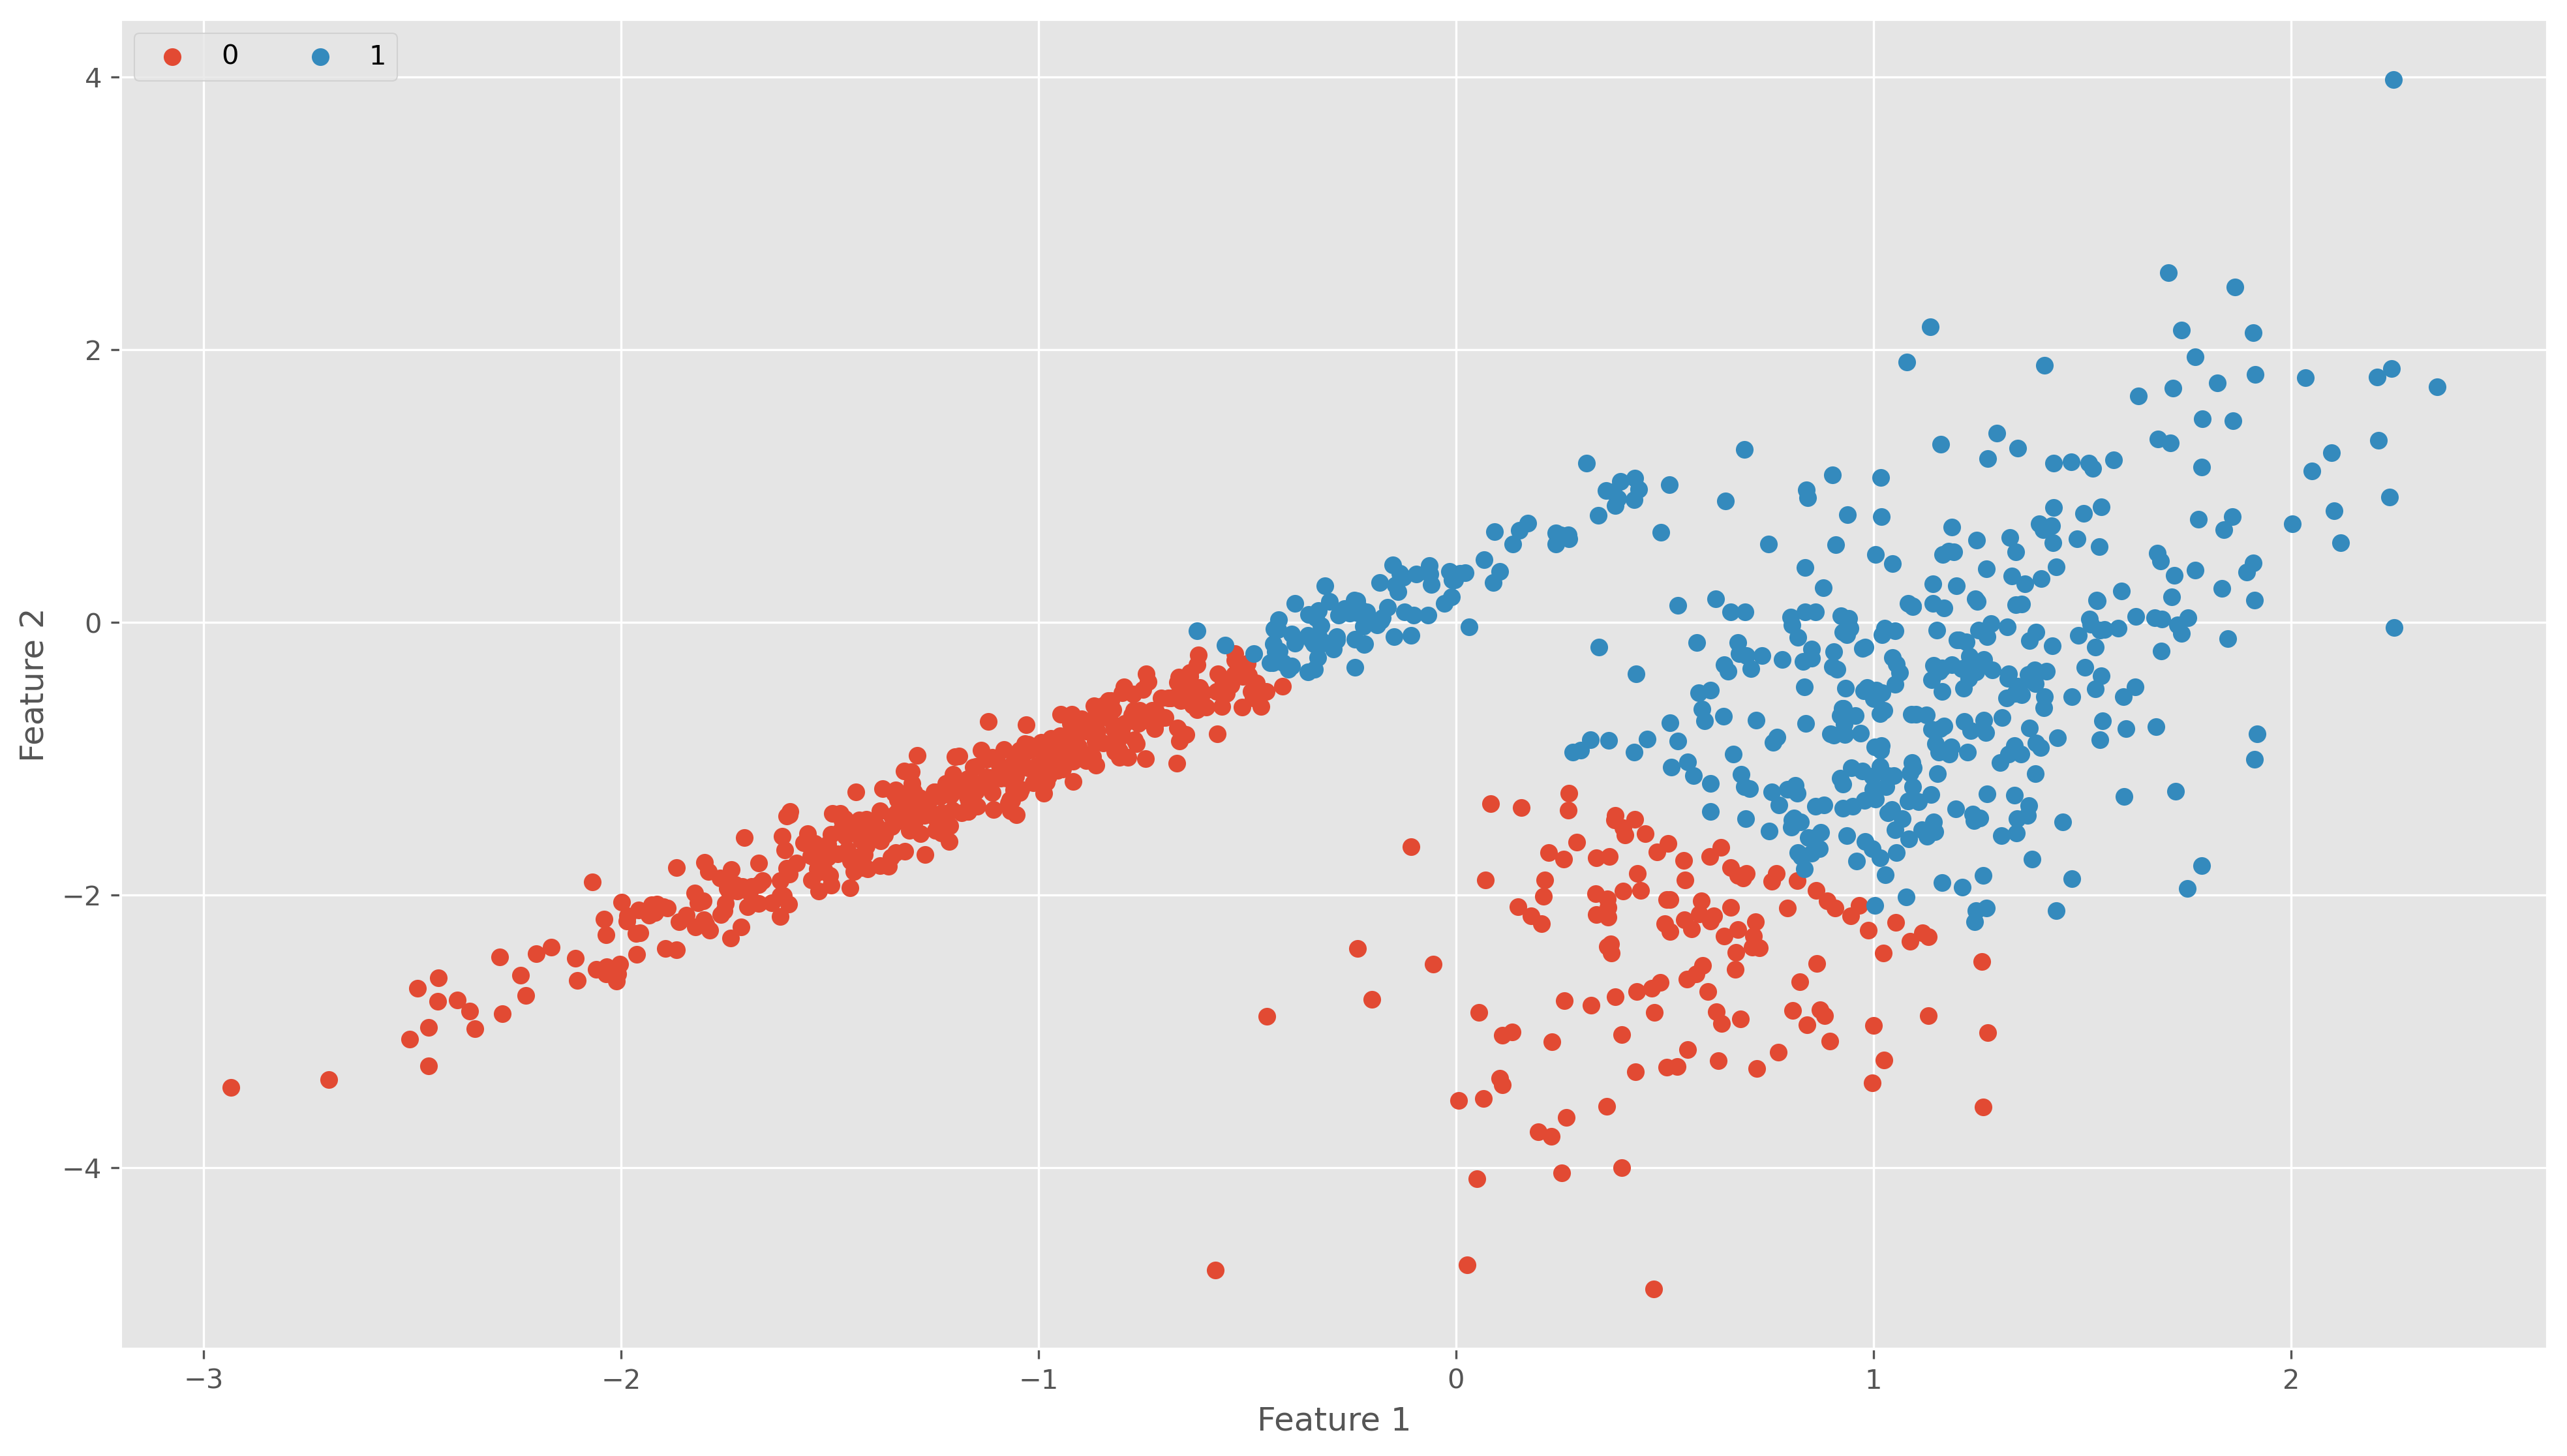

In [318]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, init='random')
model.fit(X)
yhat = model.predict(X)
clusters = np.unique(yhat)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=cluster)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(ncol=2)
plt.show()

# Mini-Batch K-Means

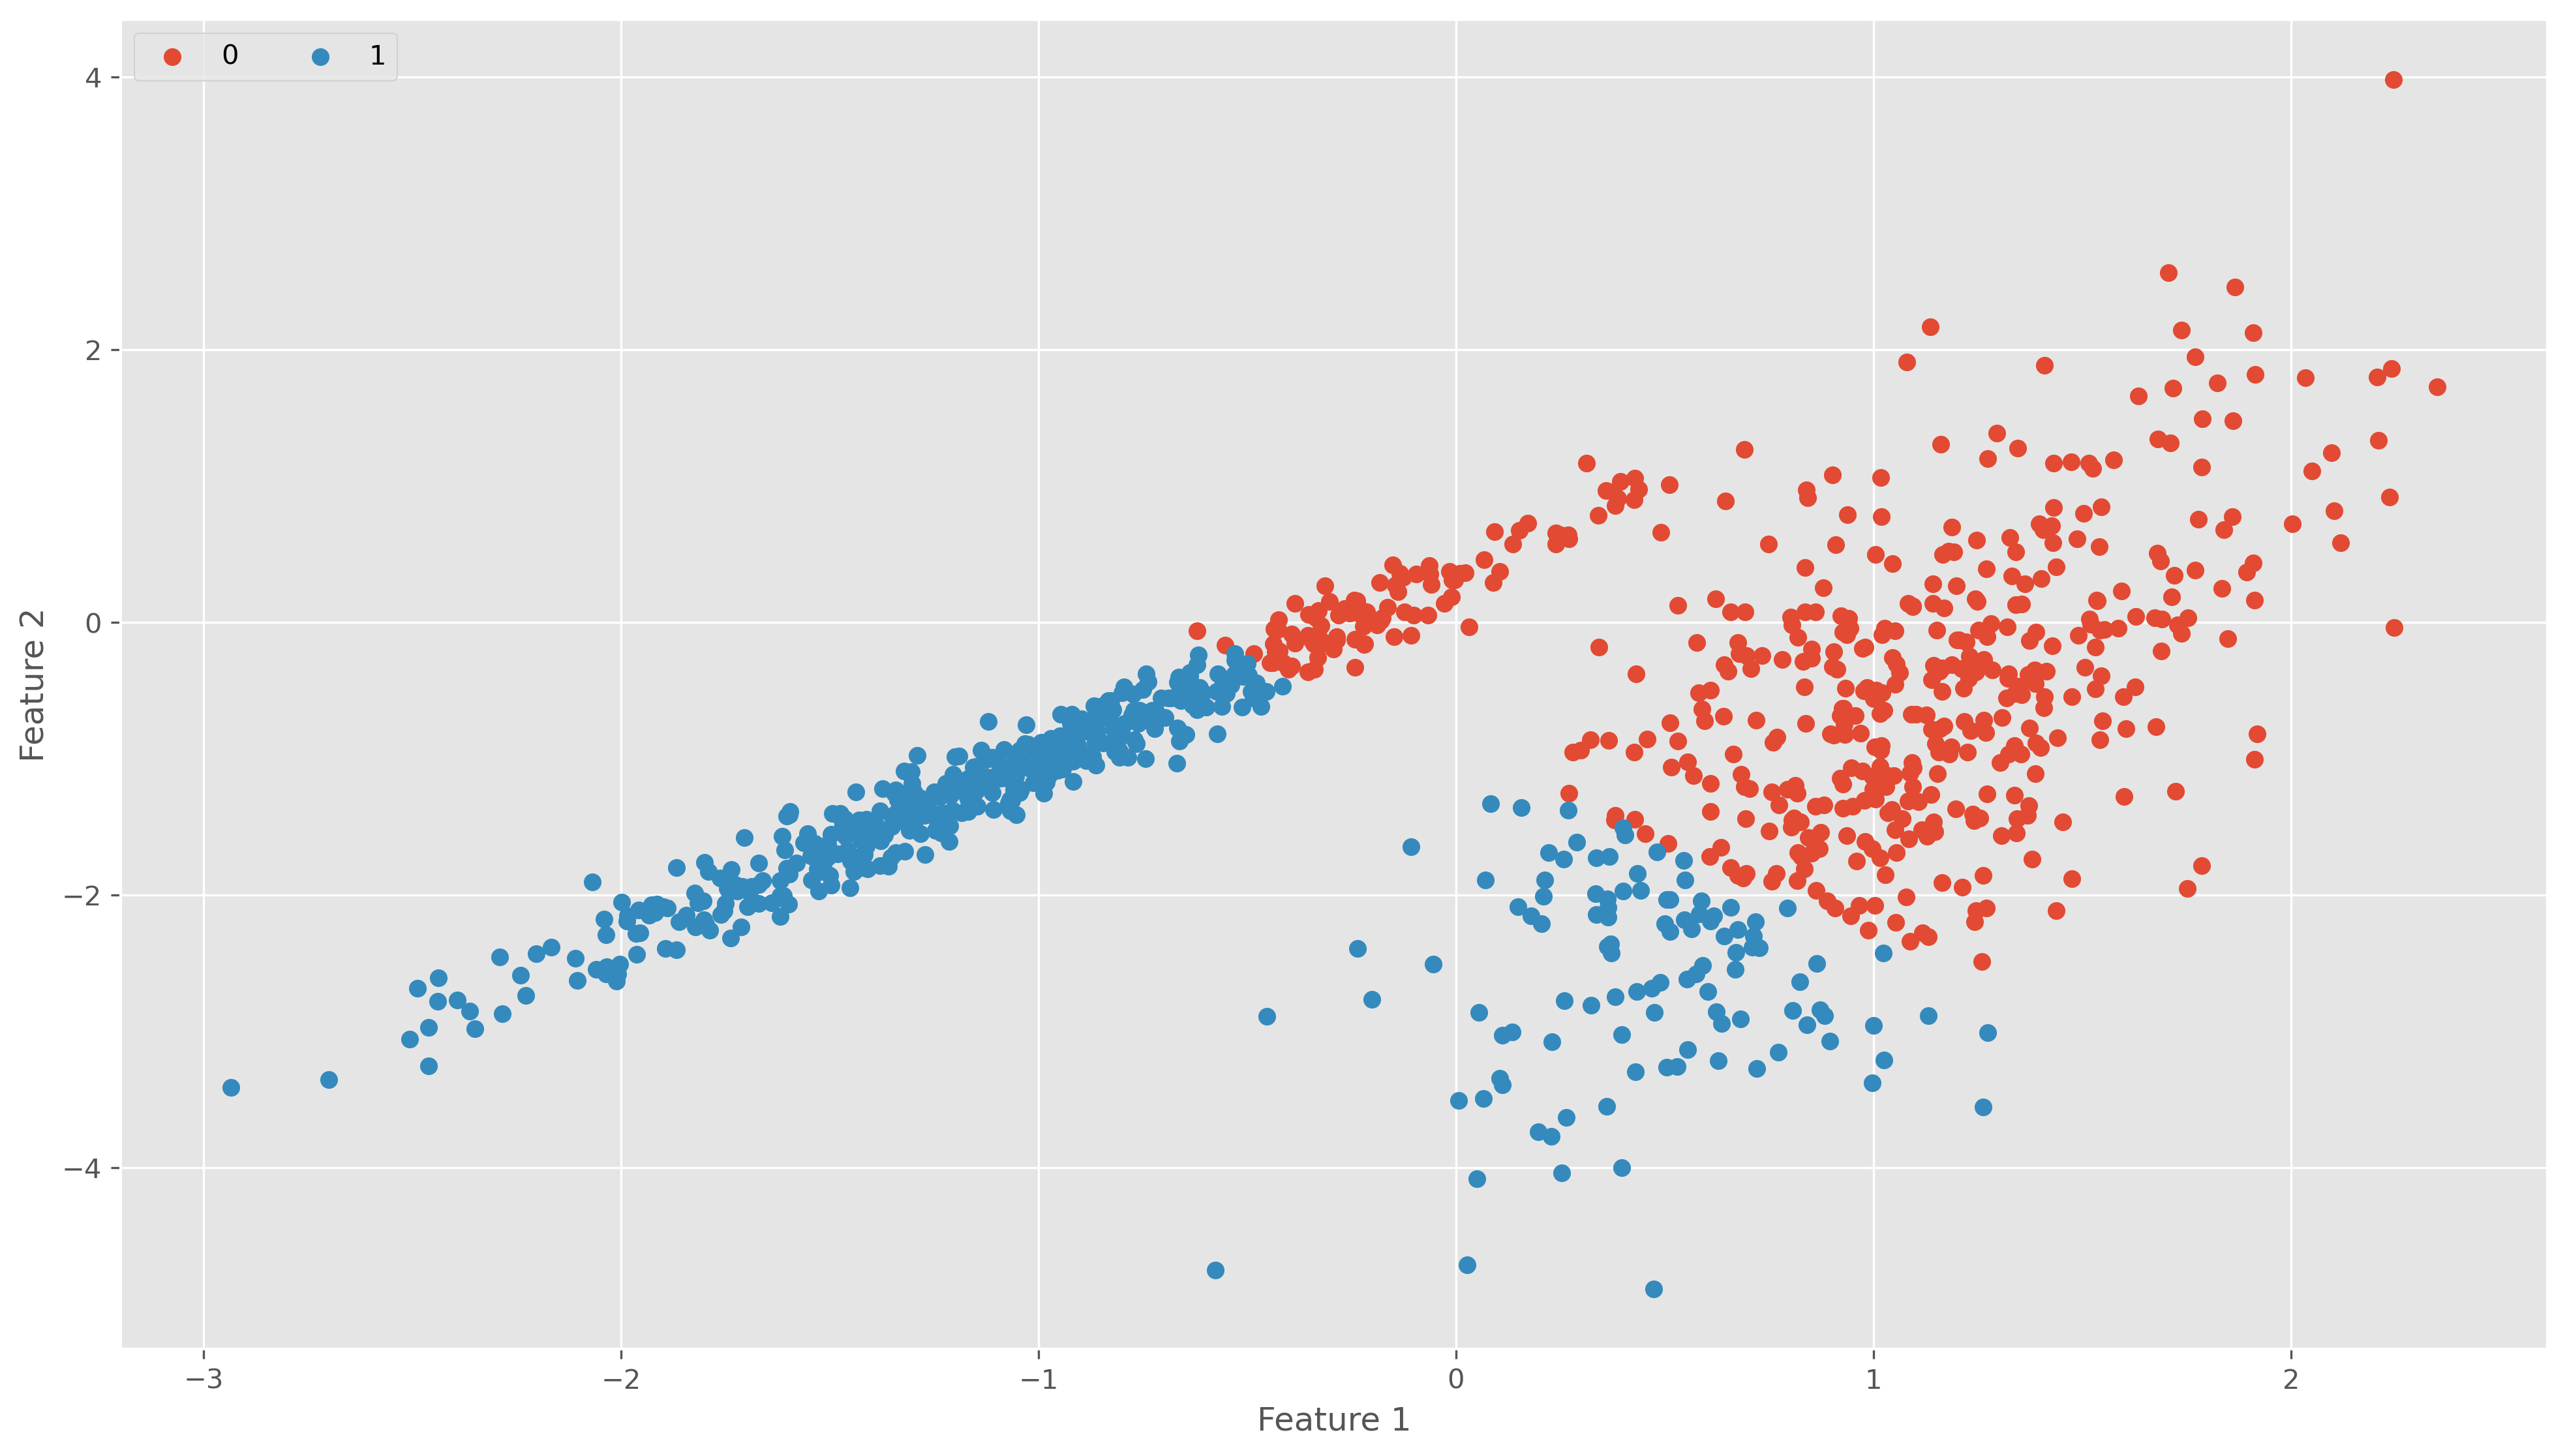

In [317]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

model = KMeans(n_clusters=2, init='k-means++')
model.fit(X)
yhat = model.predict(X)
clusters = np.unique(yhat)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=cluster)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(ncol=2)
plt.show()

# K-Means++

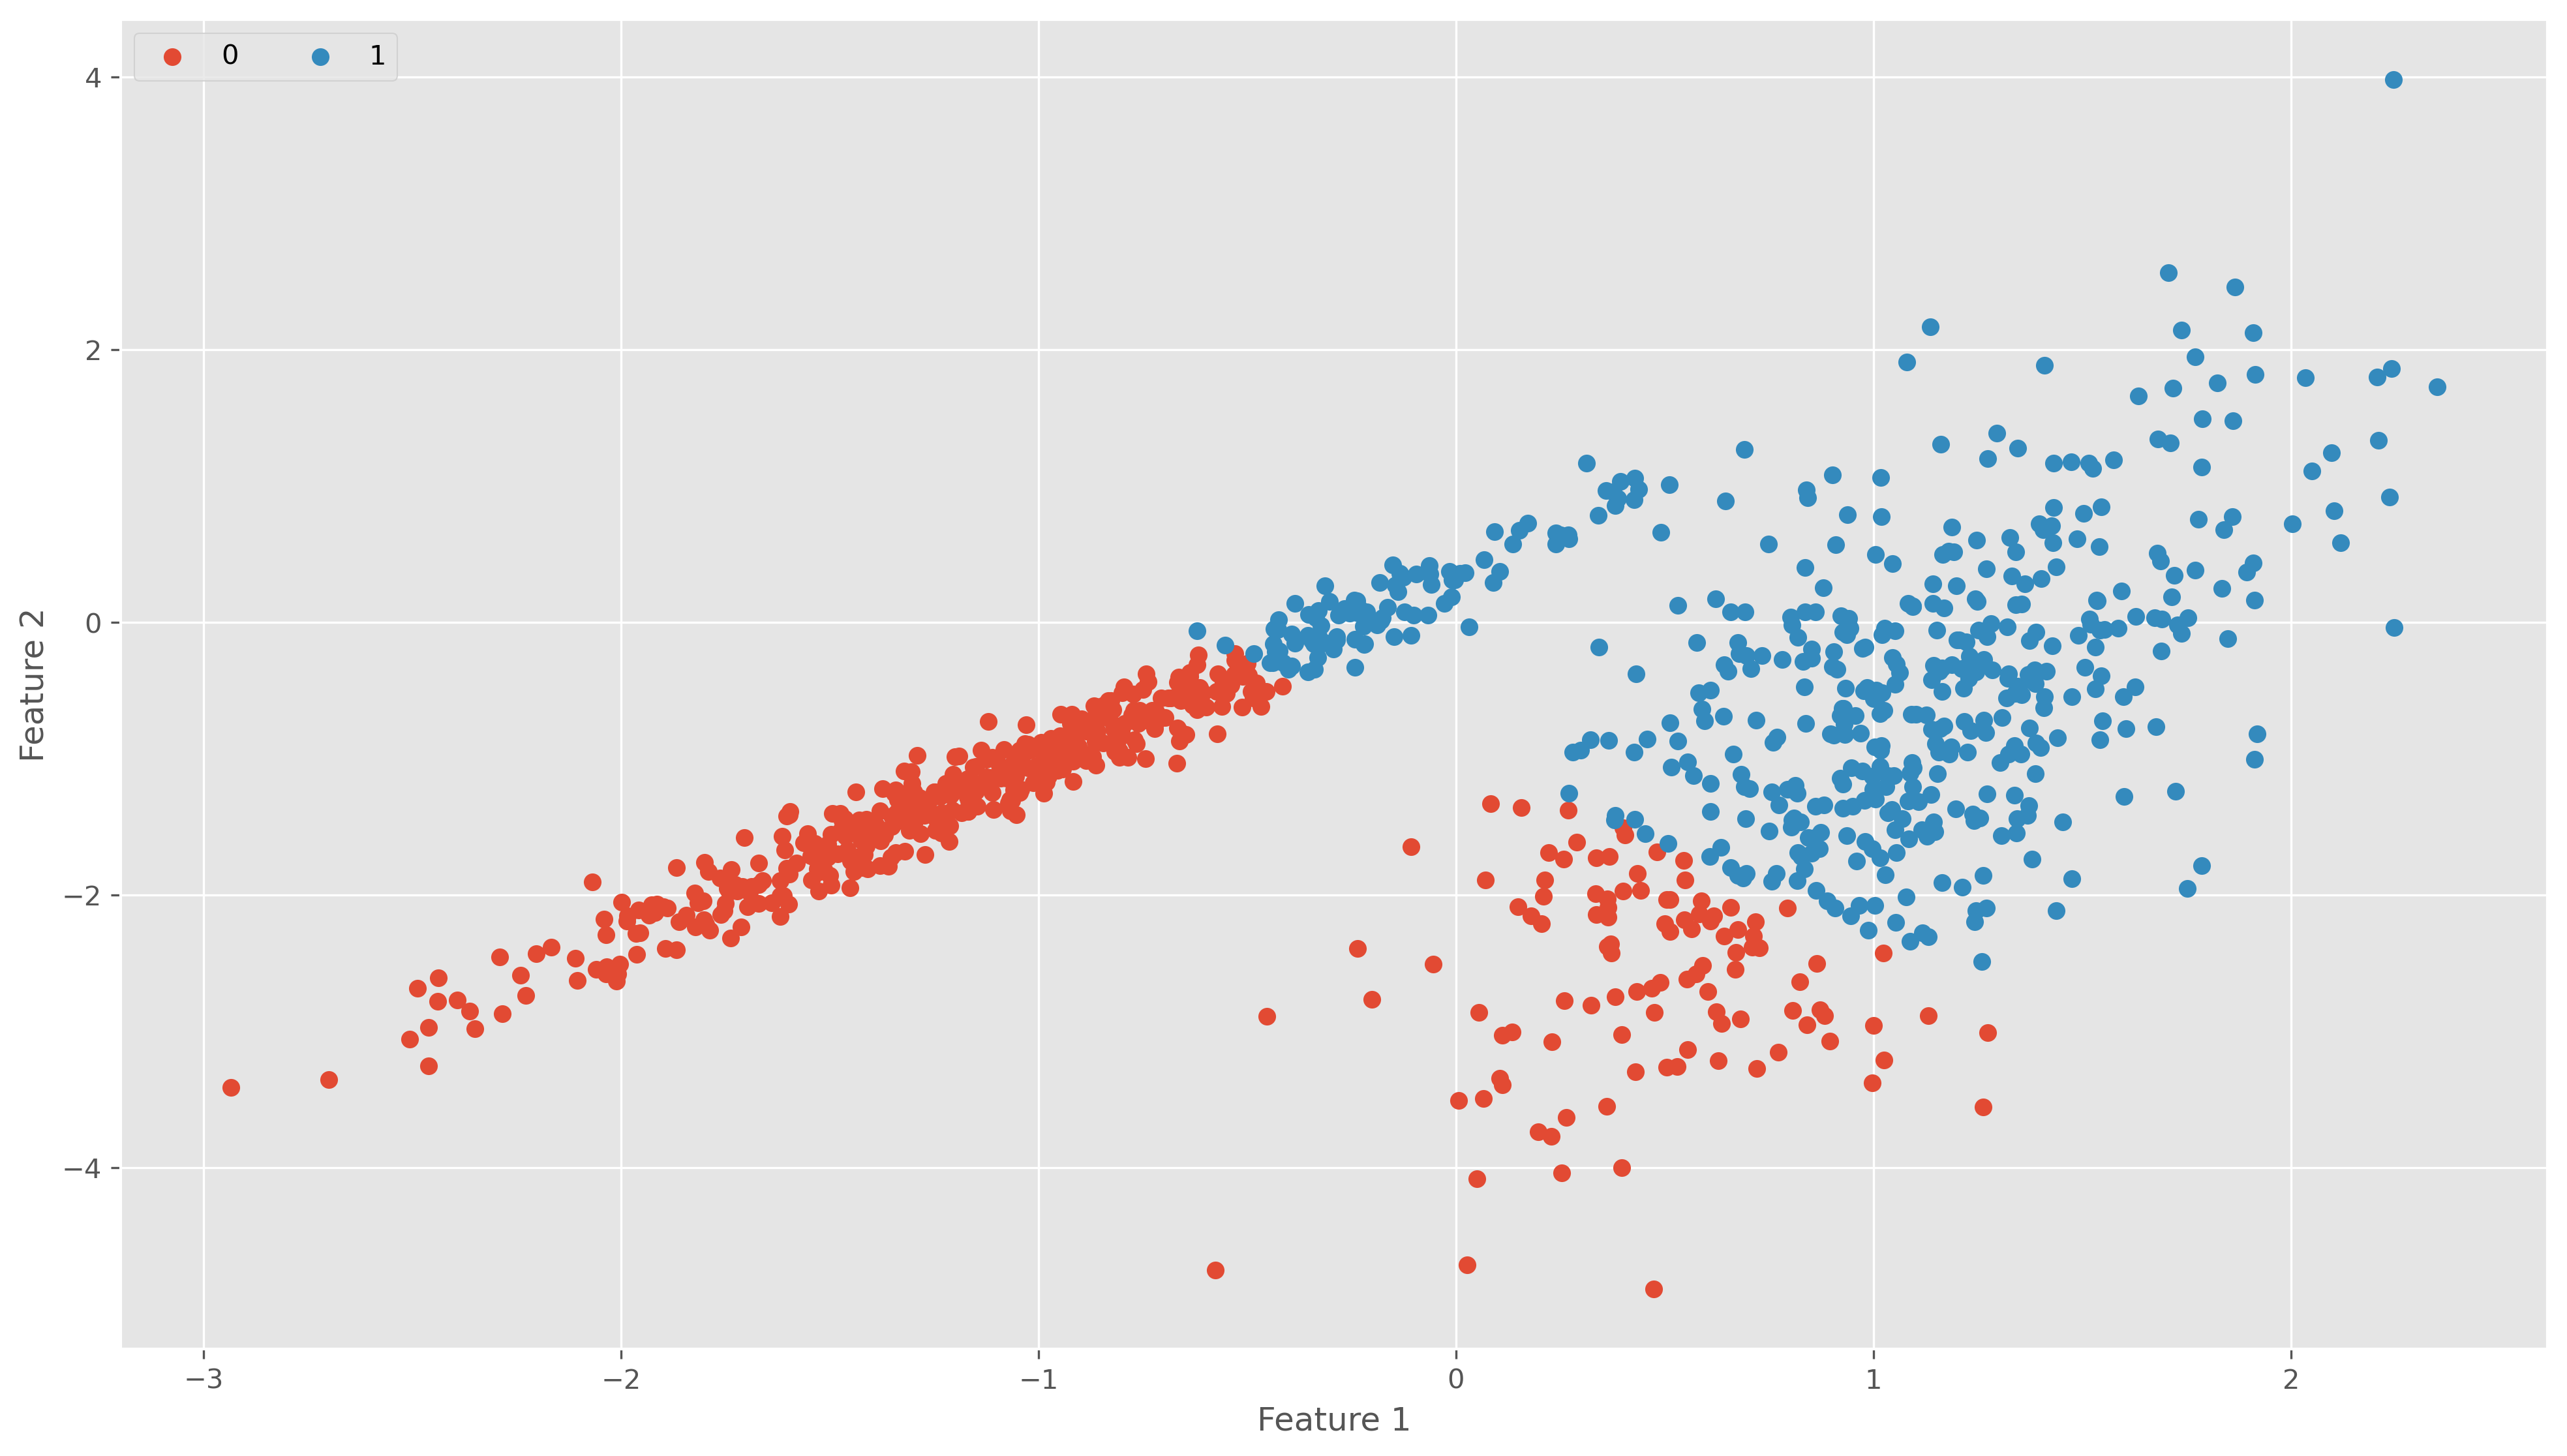

In [319]:
model = KMeans(n_clusters=2, init='k-means++')
model.fit(X)
yhat = model.predict(X)
clusters = np.unique(yhat)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=cluster)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(ncol=2)
plt.show()

(3000, 2)


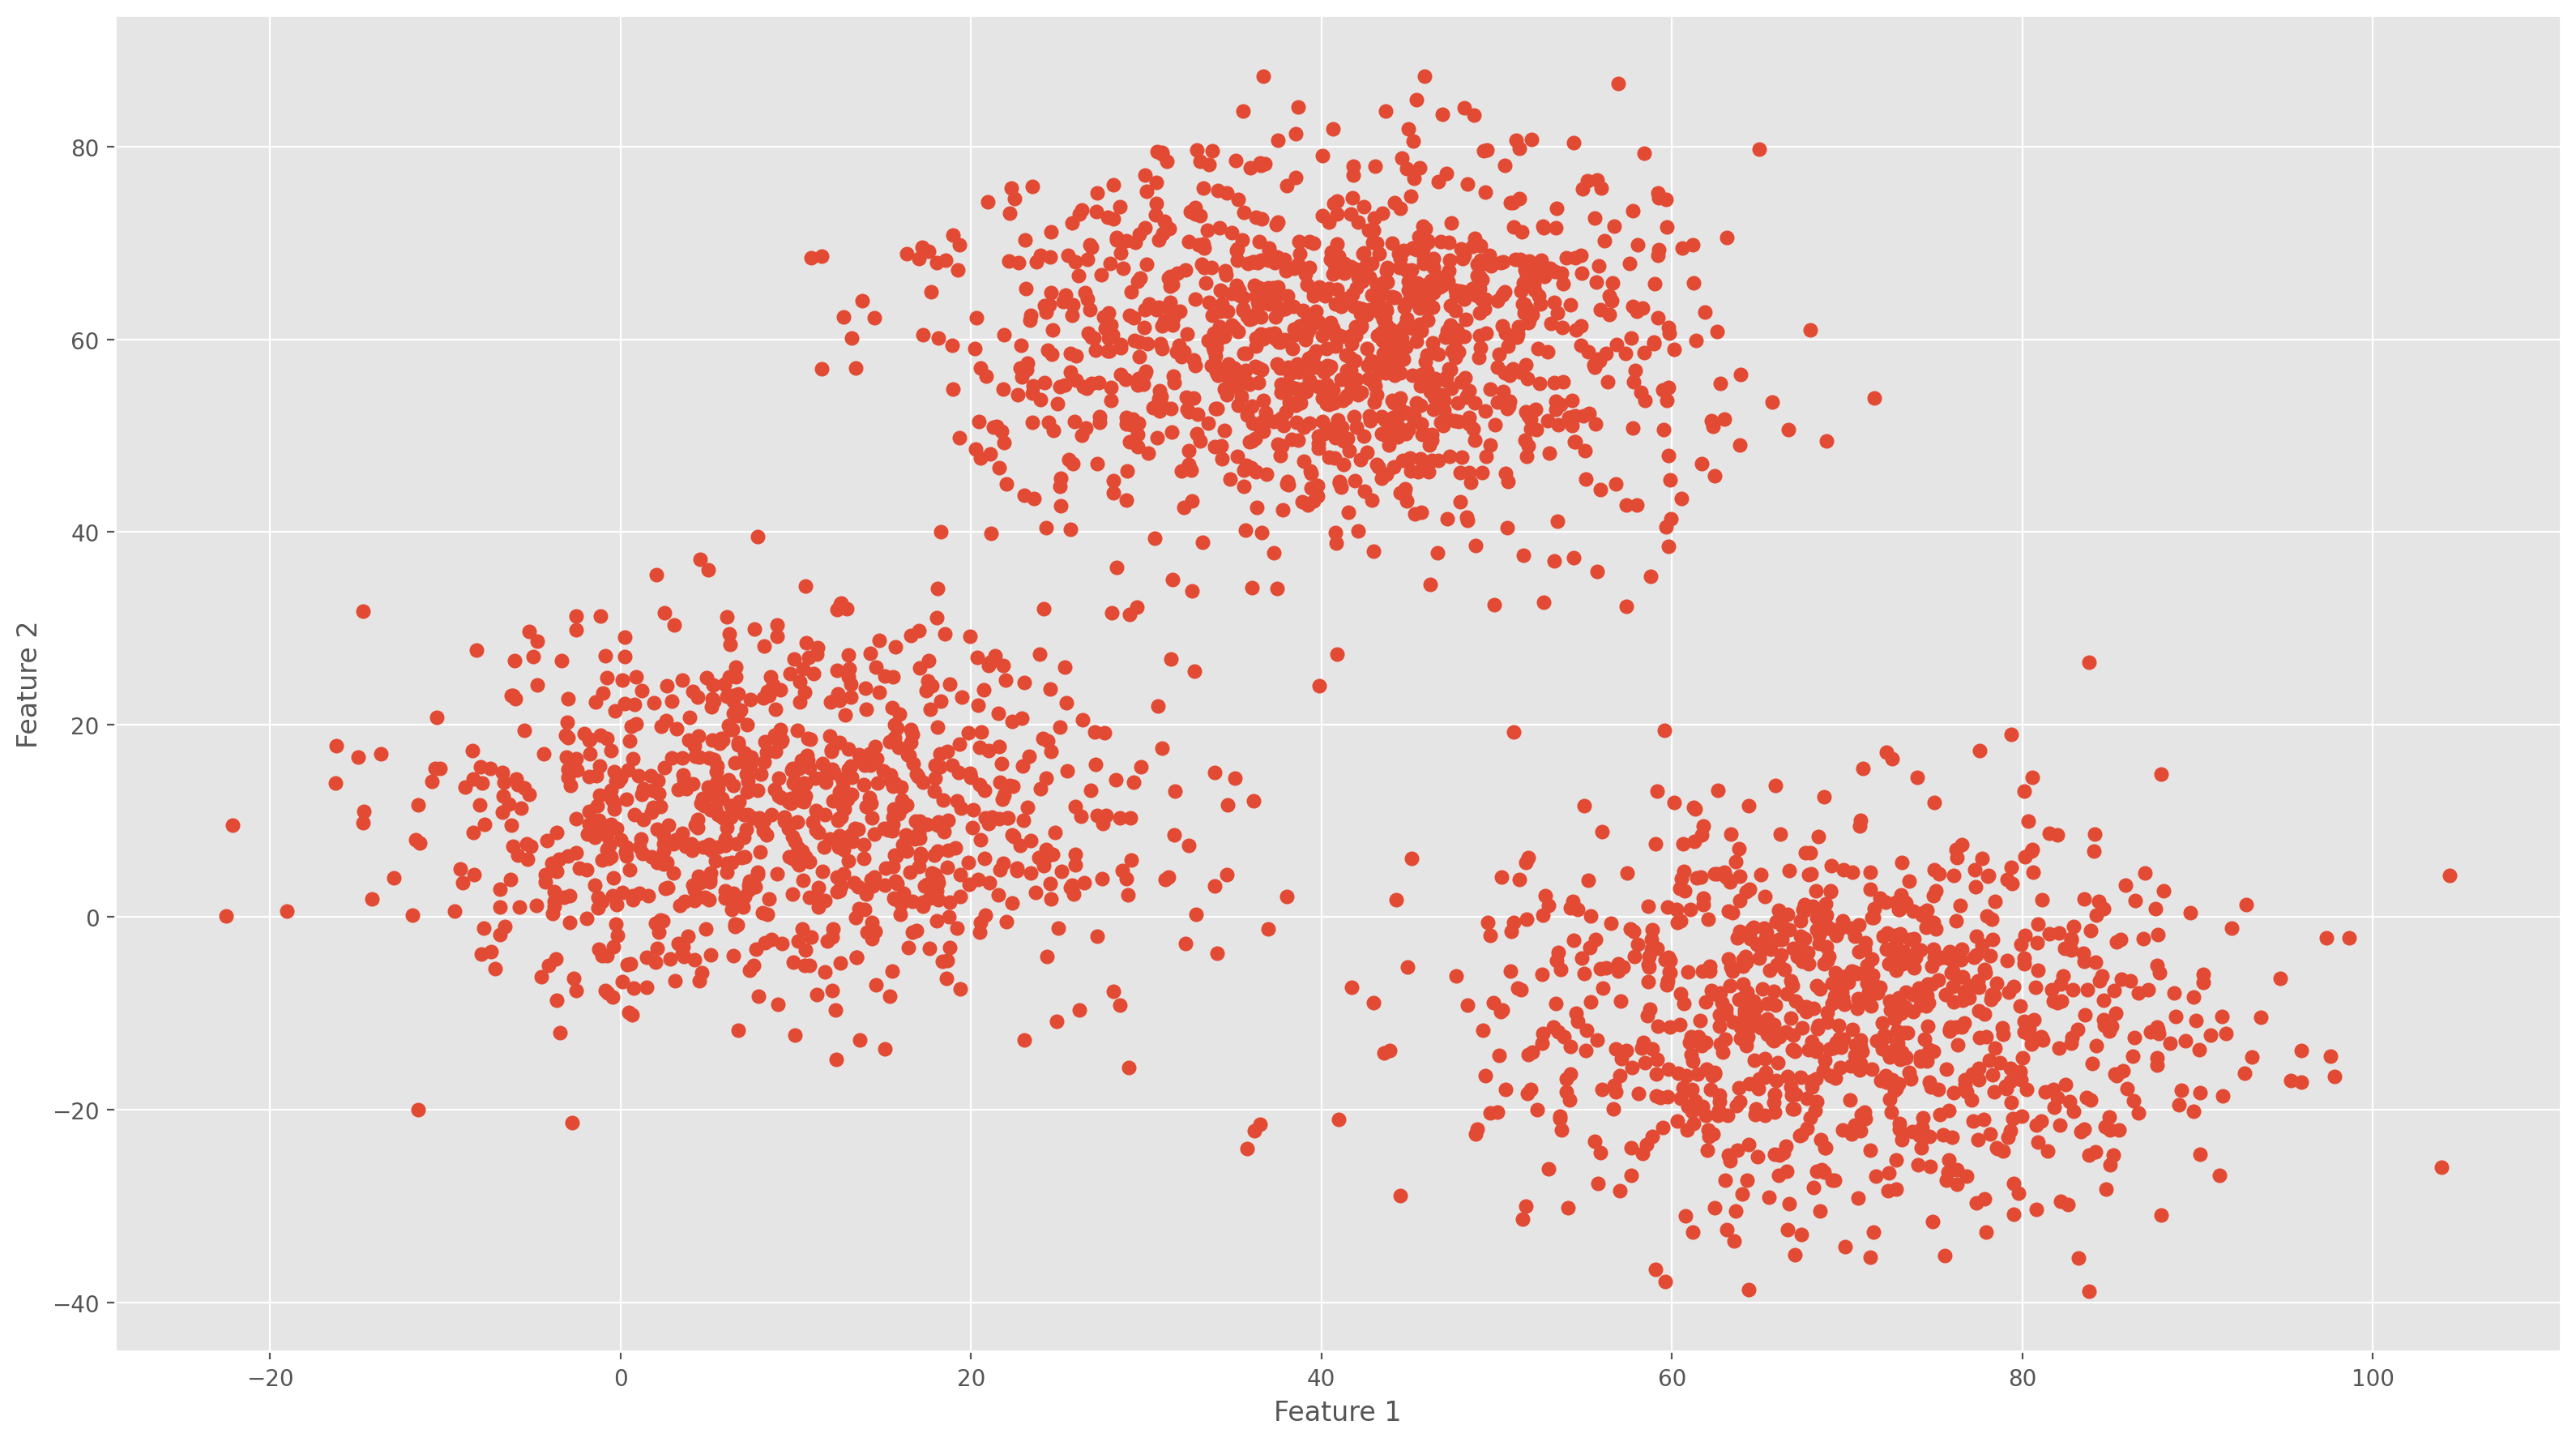

D:\anaconda\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


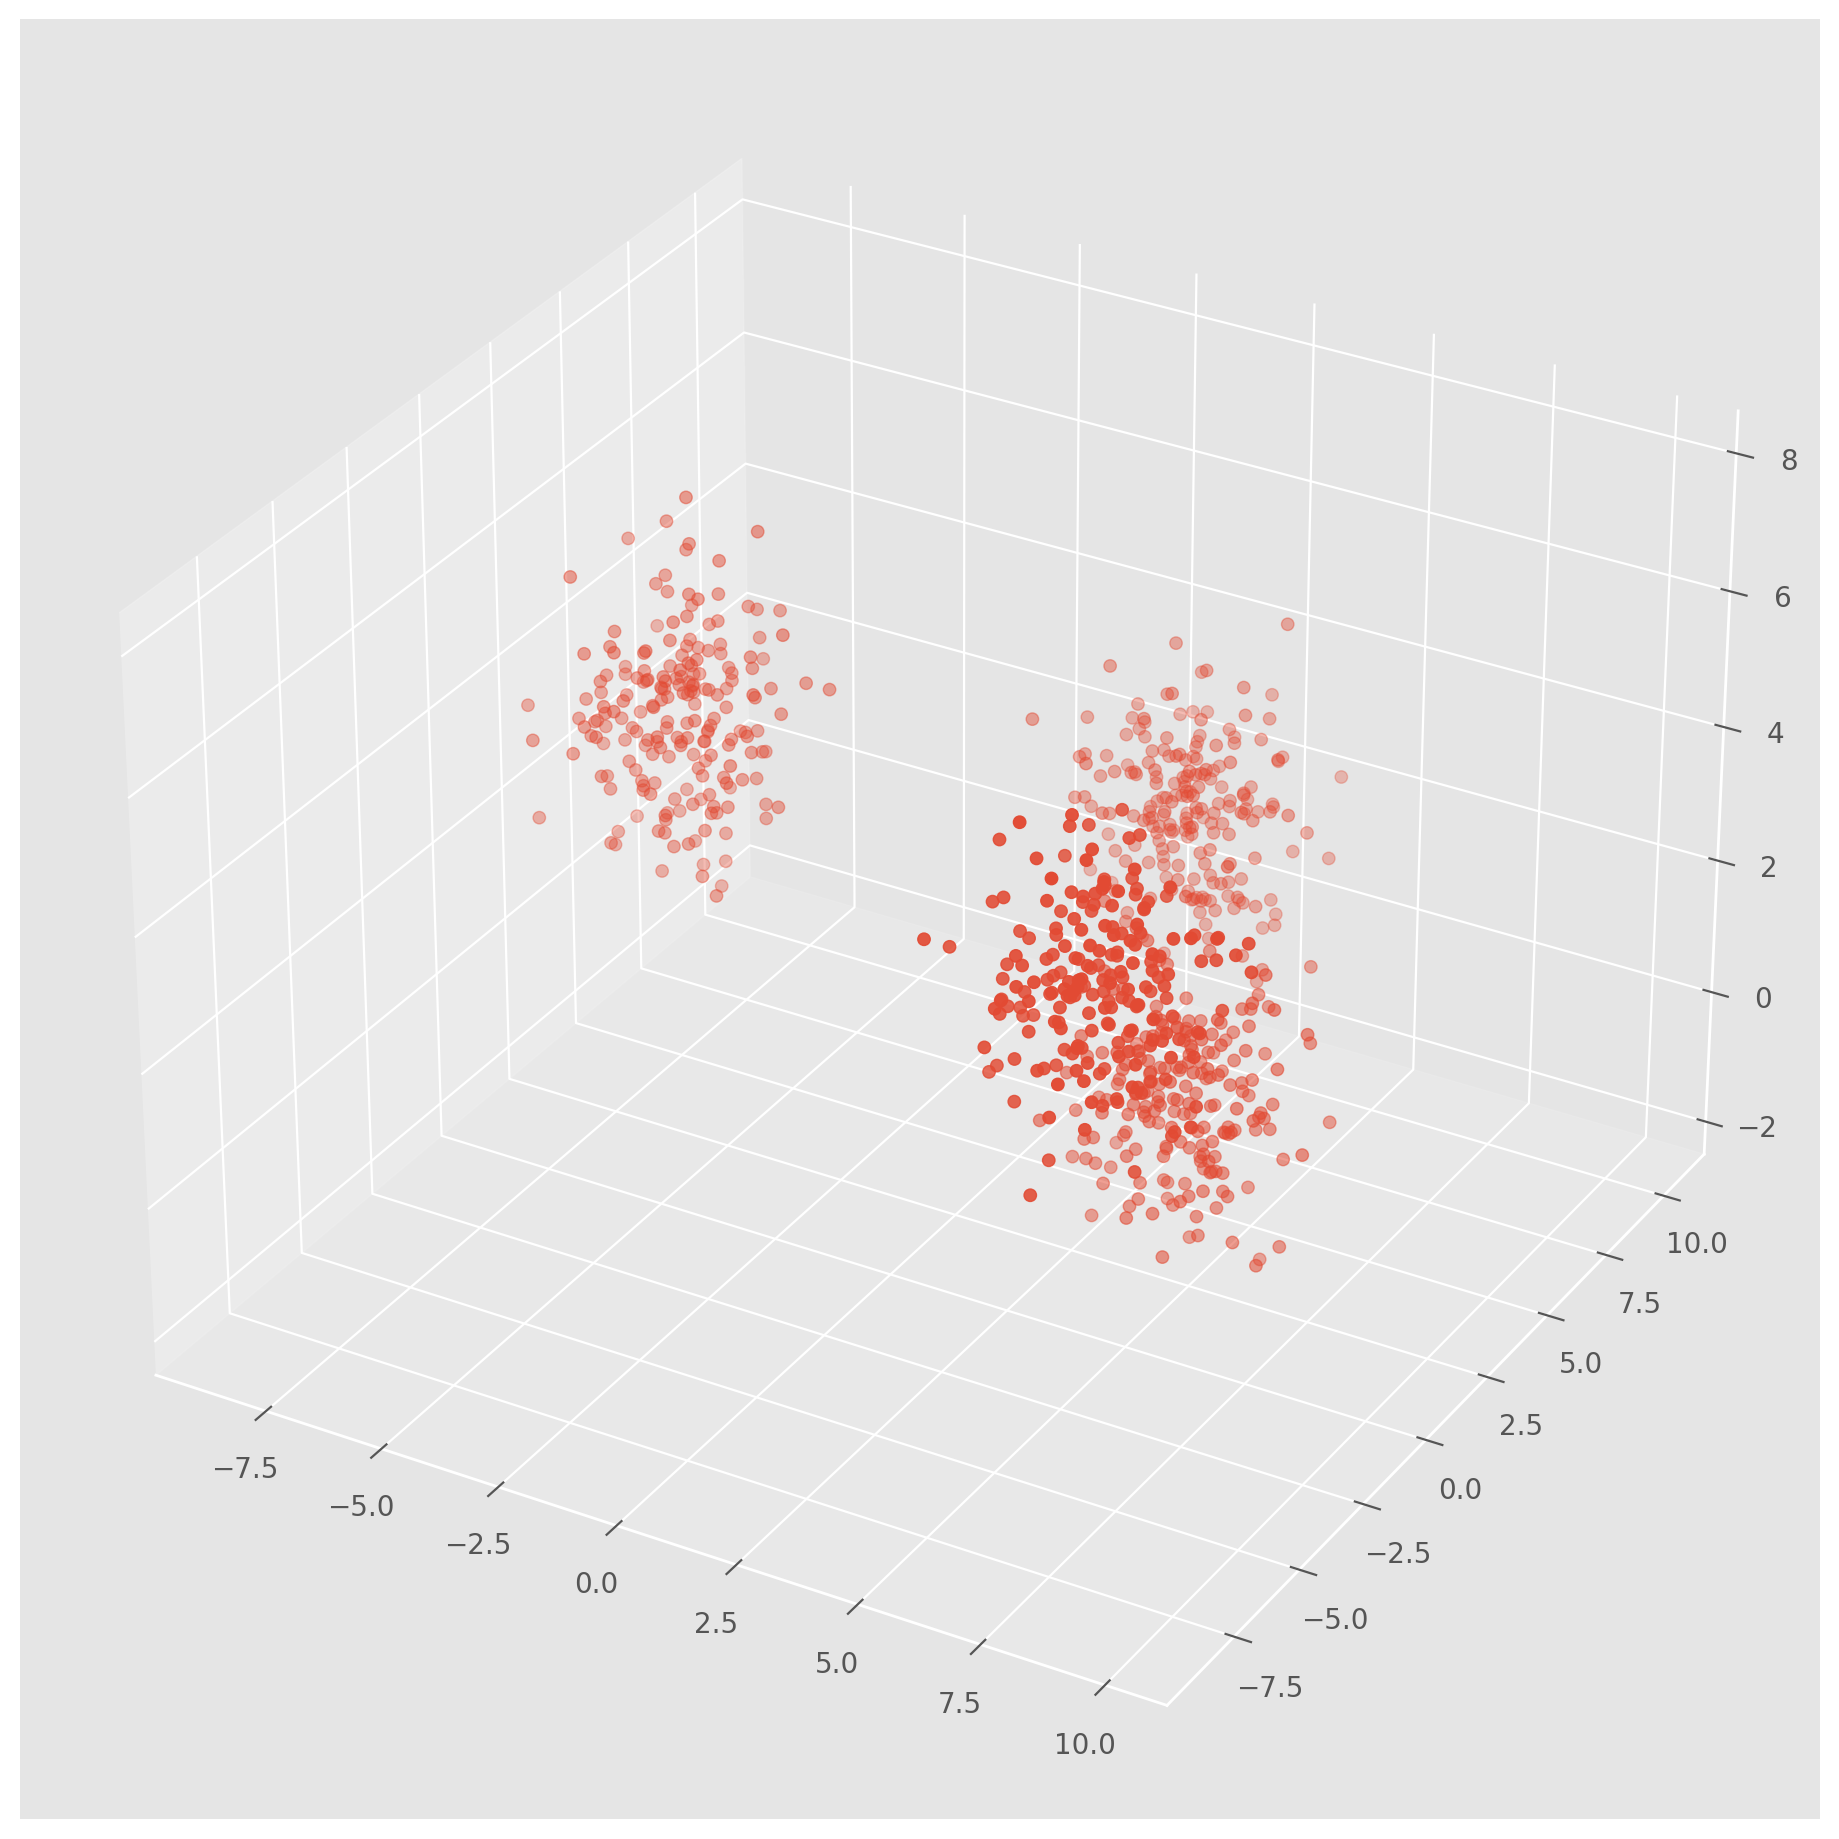

[[-6.85267315  2.73955673  4.11069601]
 [-4.54164942  1.30055403  3.94021625]
 [ 6.72039107  0.49122325  0.31879058]]


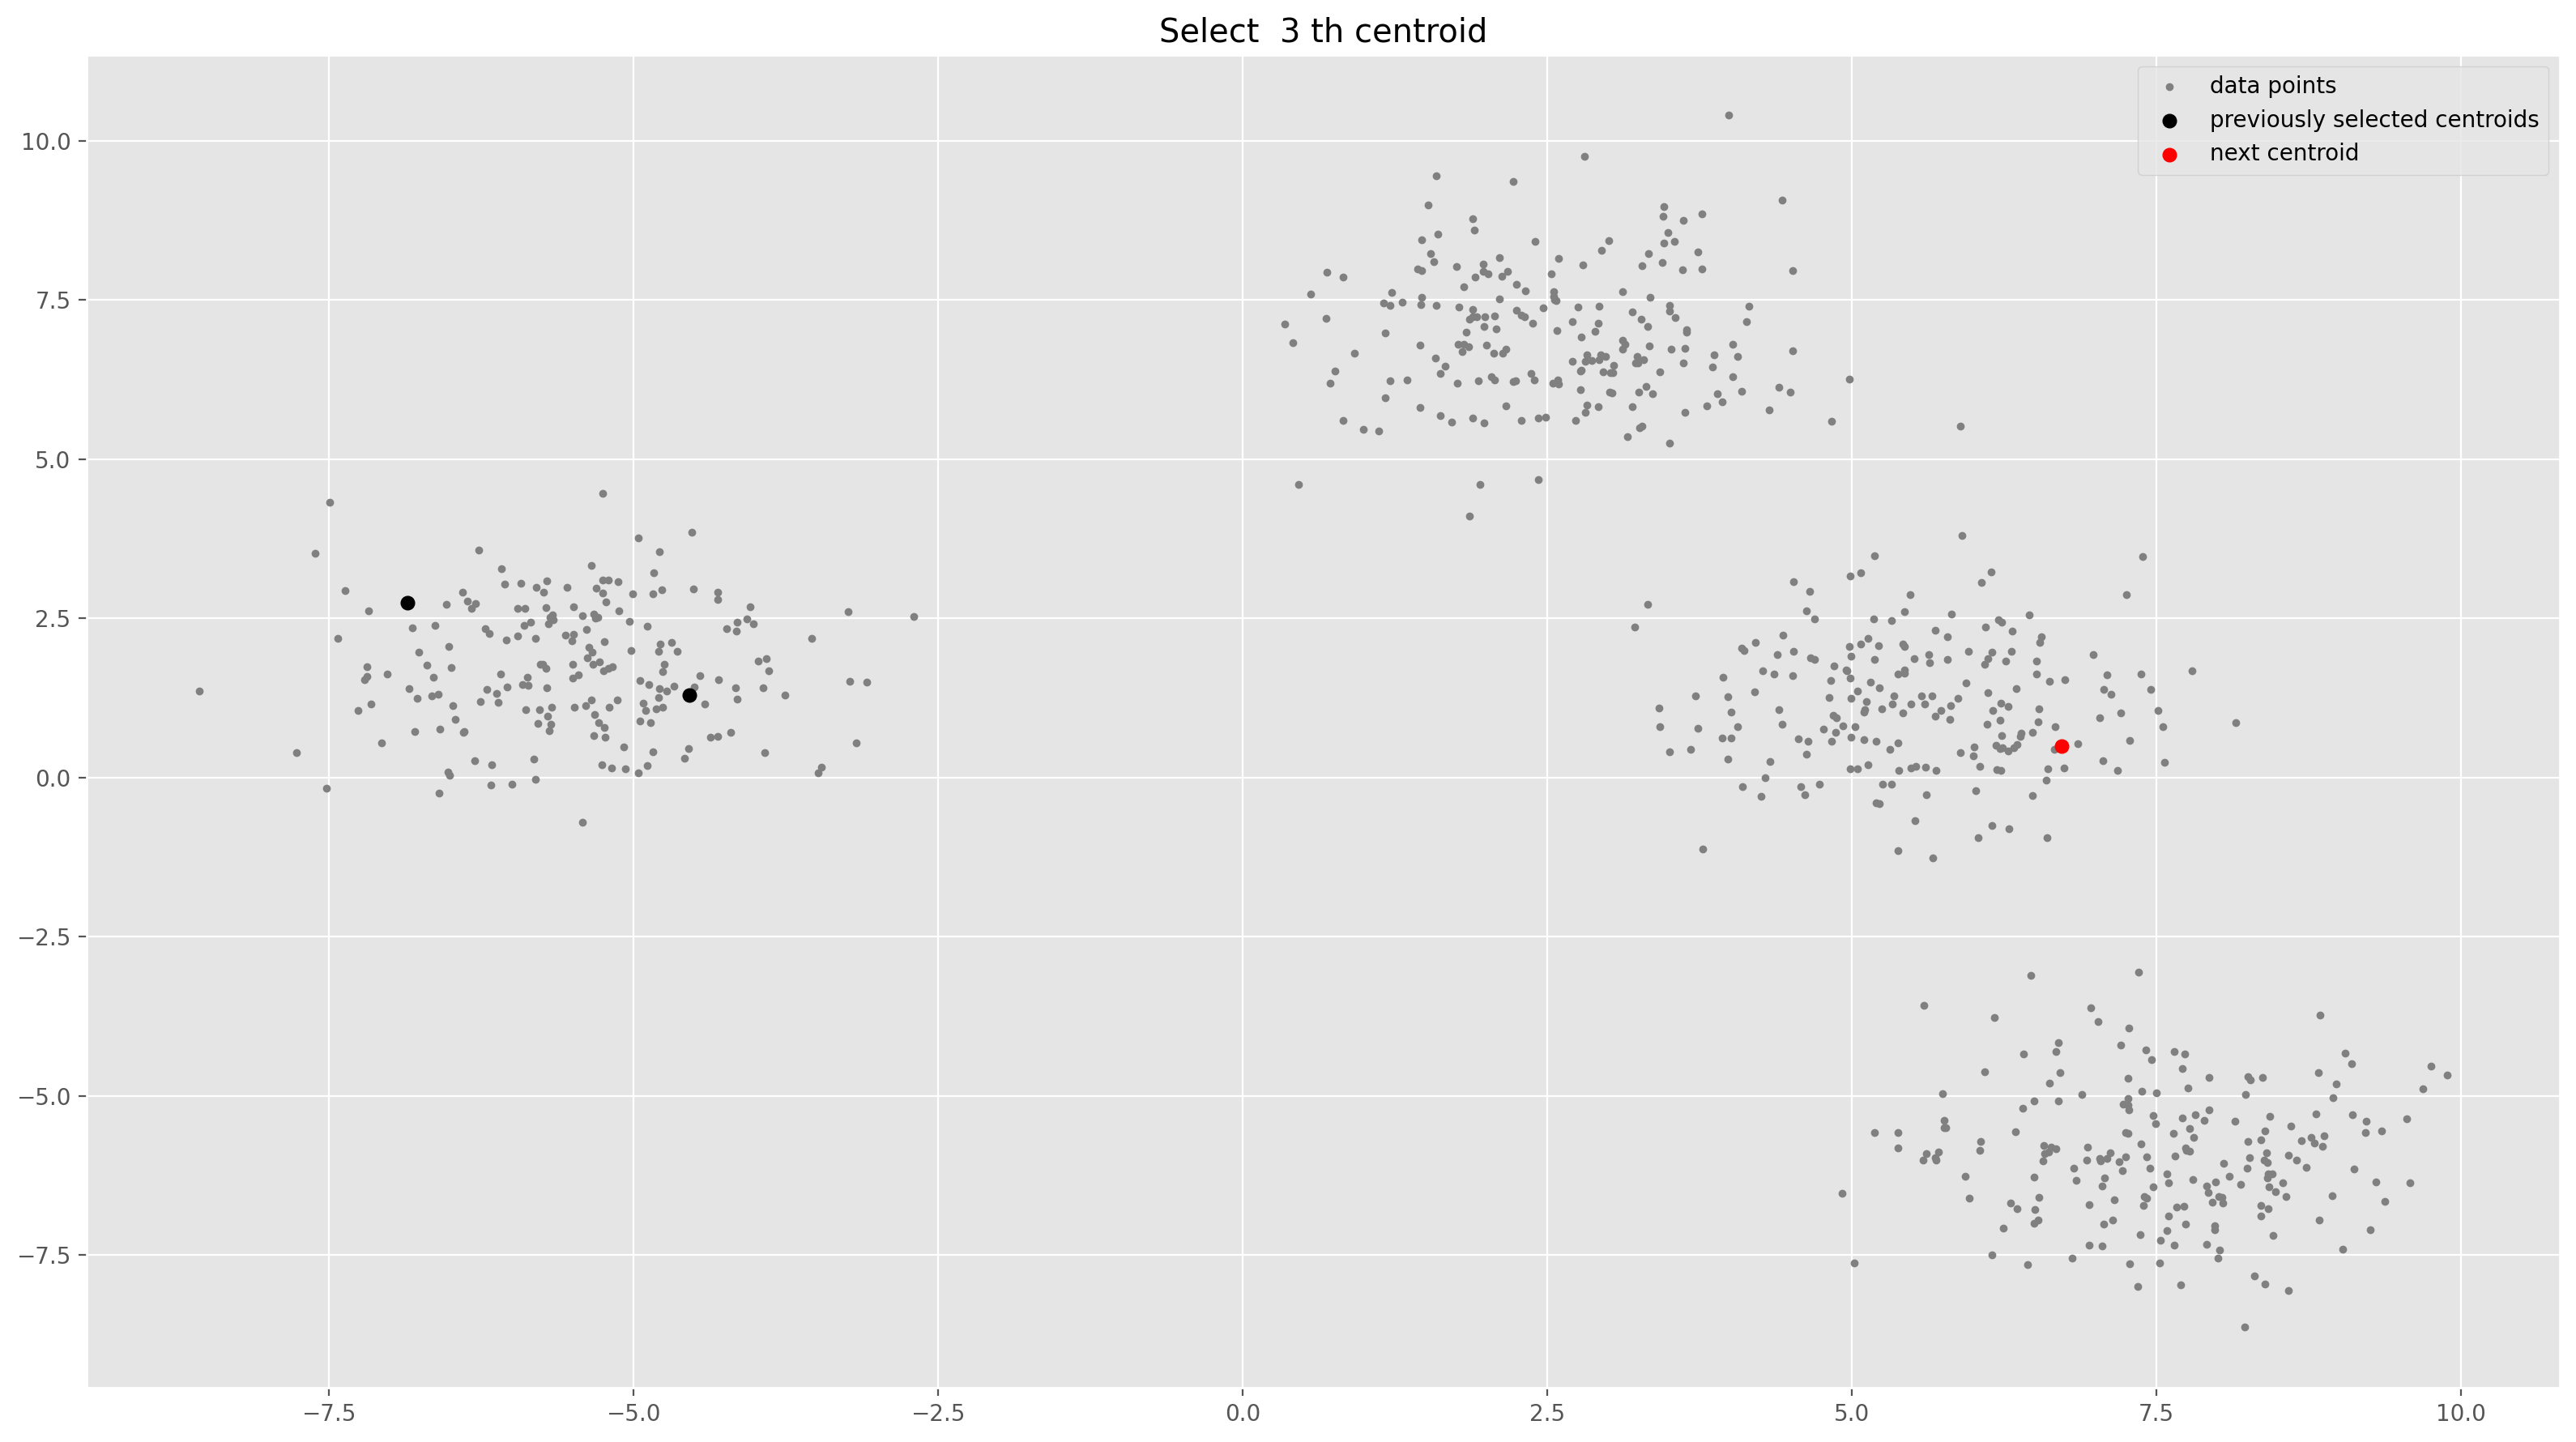

[INFO] Iteration 5：distance_flag = [0.28511738 0.45284704 0.        ].


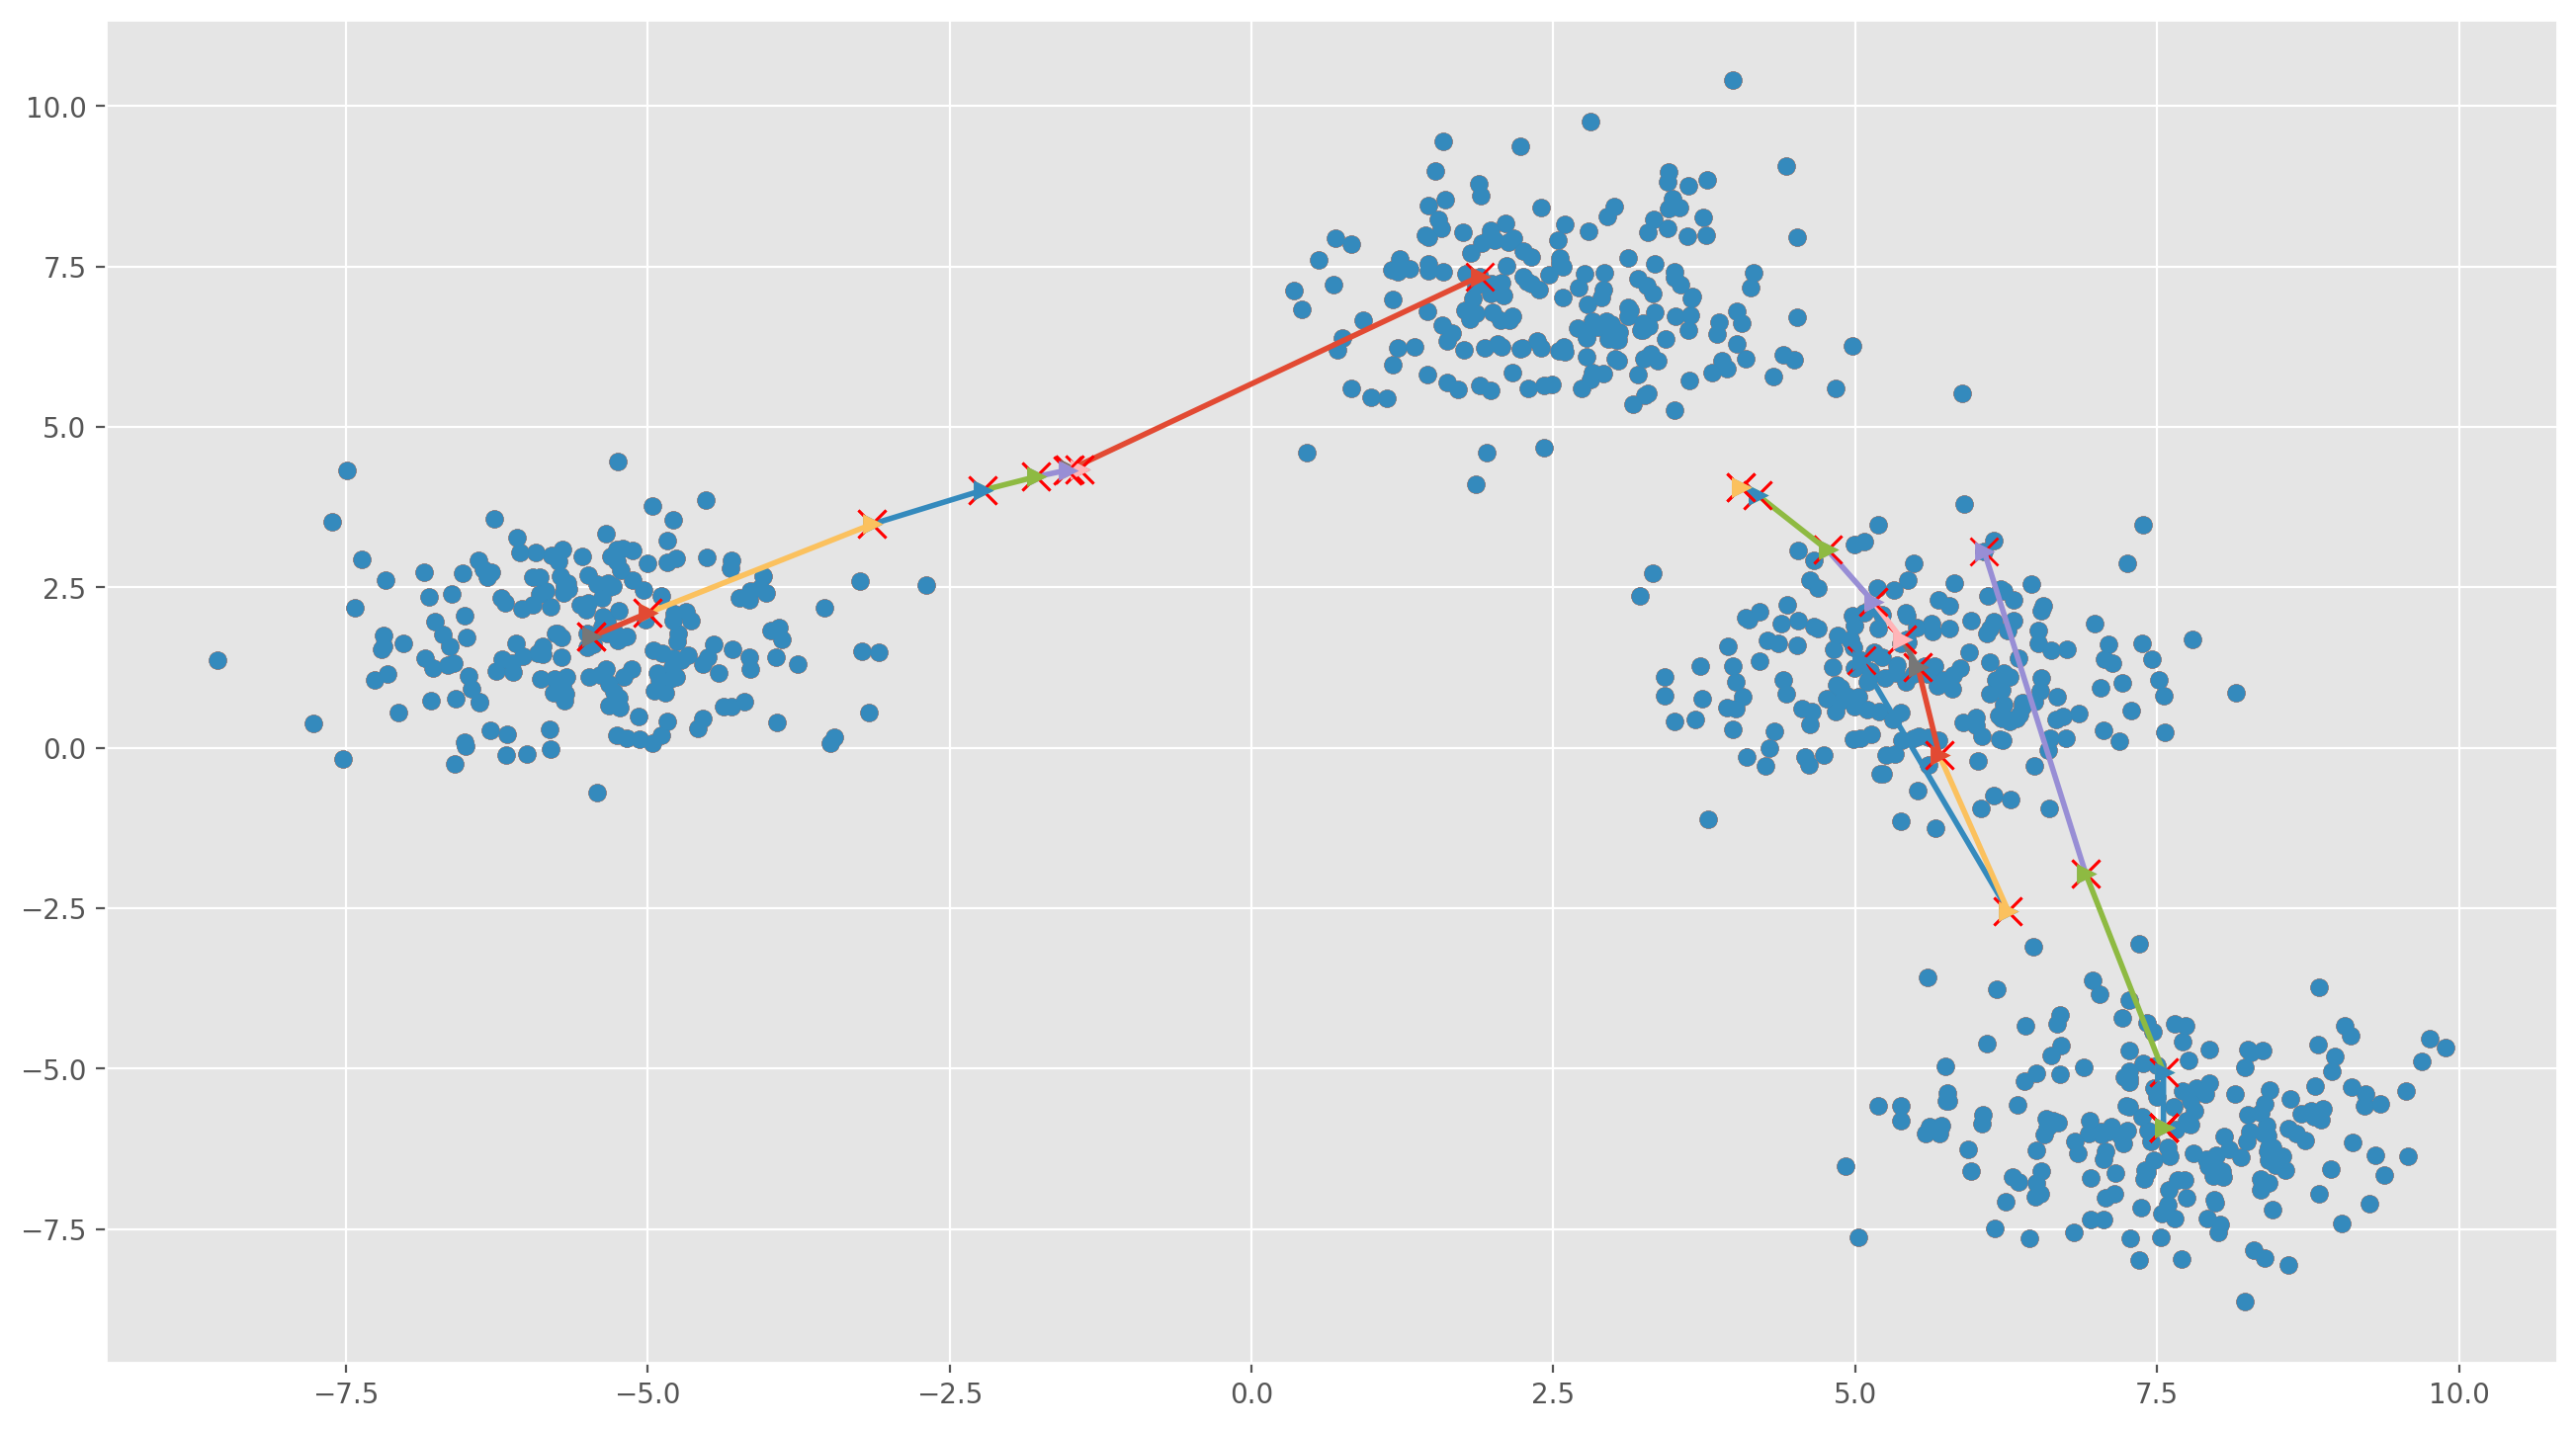

(3, 3)
[[ 3.62812402  5.72927228  2.67643305]
 [ 9.57915847 -6.36535155  6.71899263]
 [-7.61155816  3.5225112   5.84922373]]


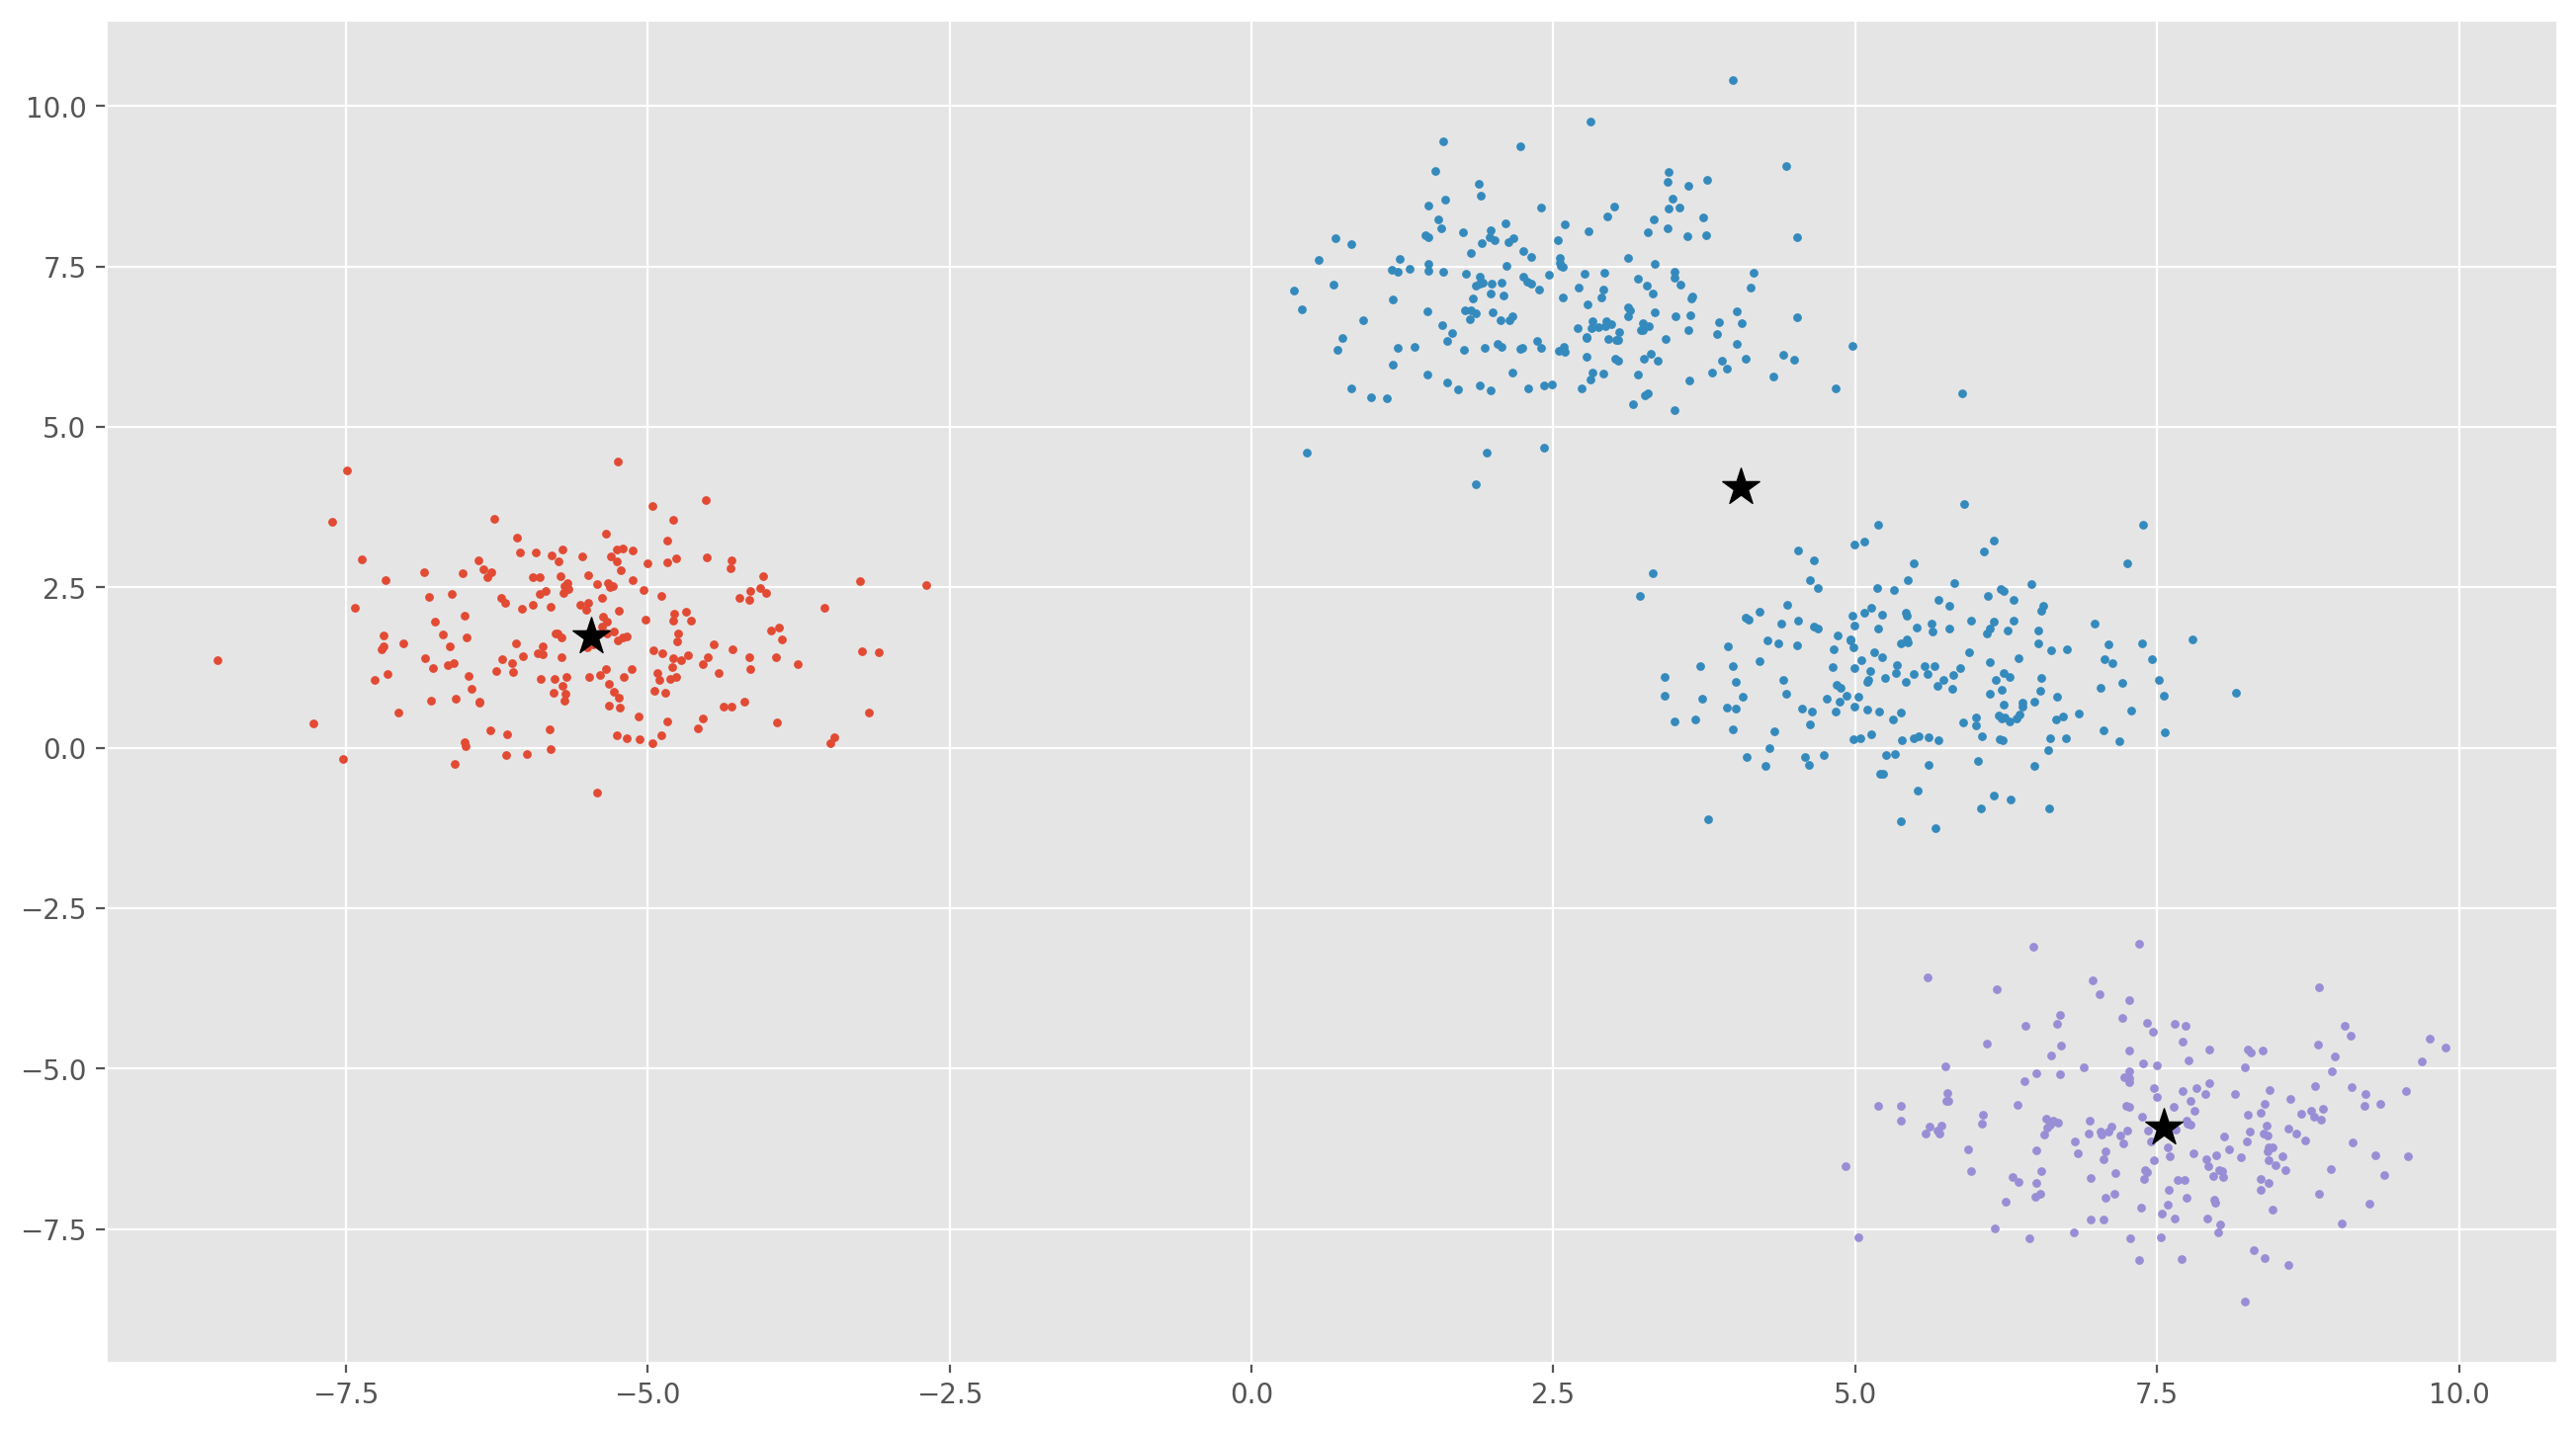

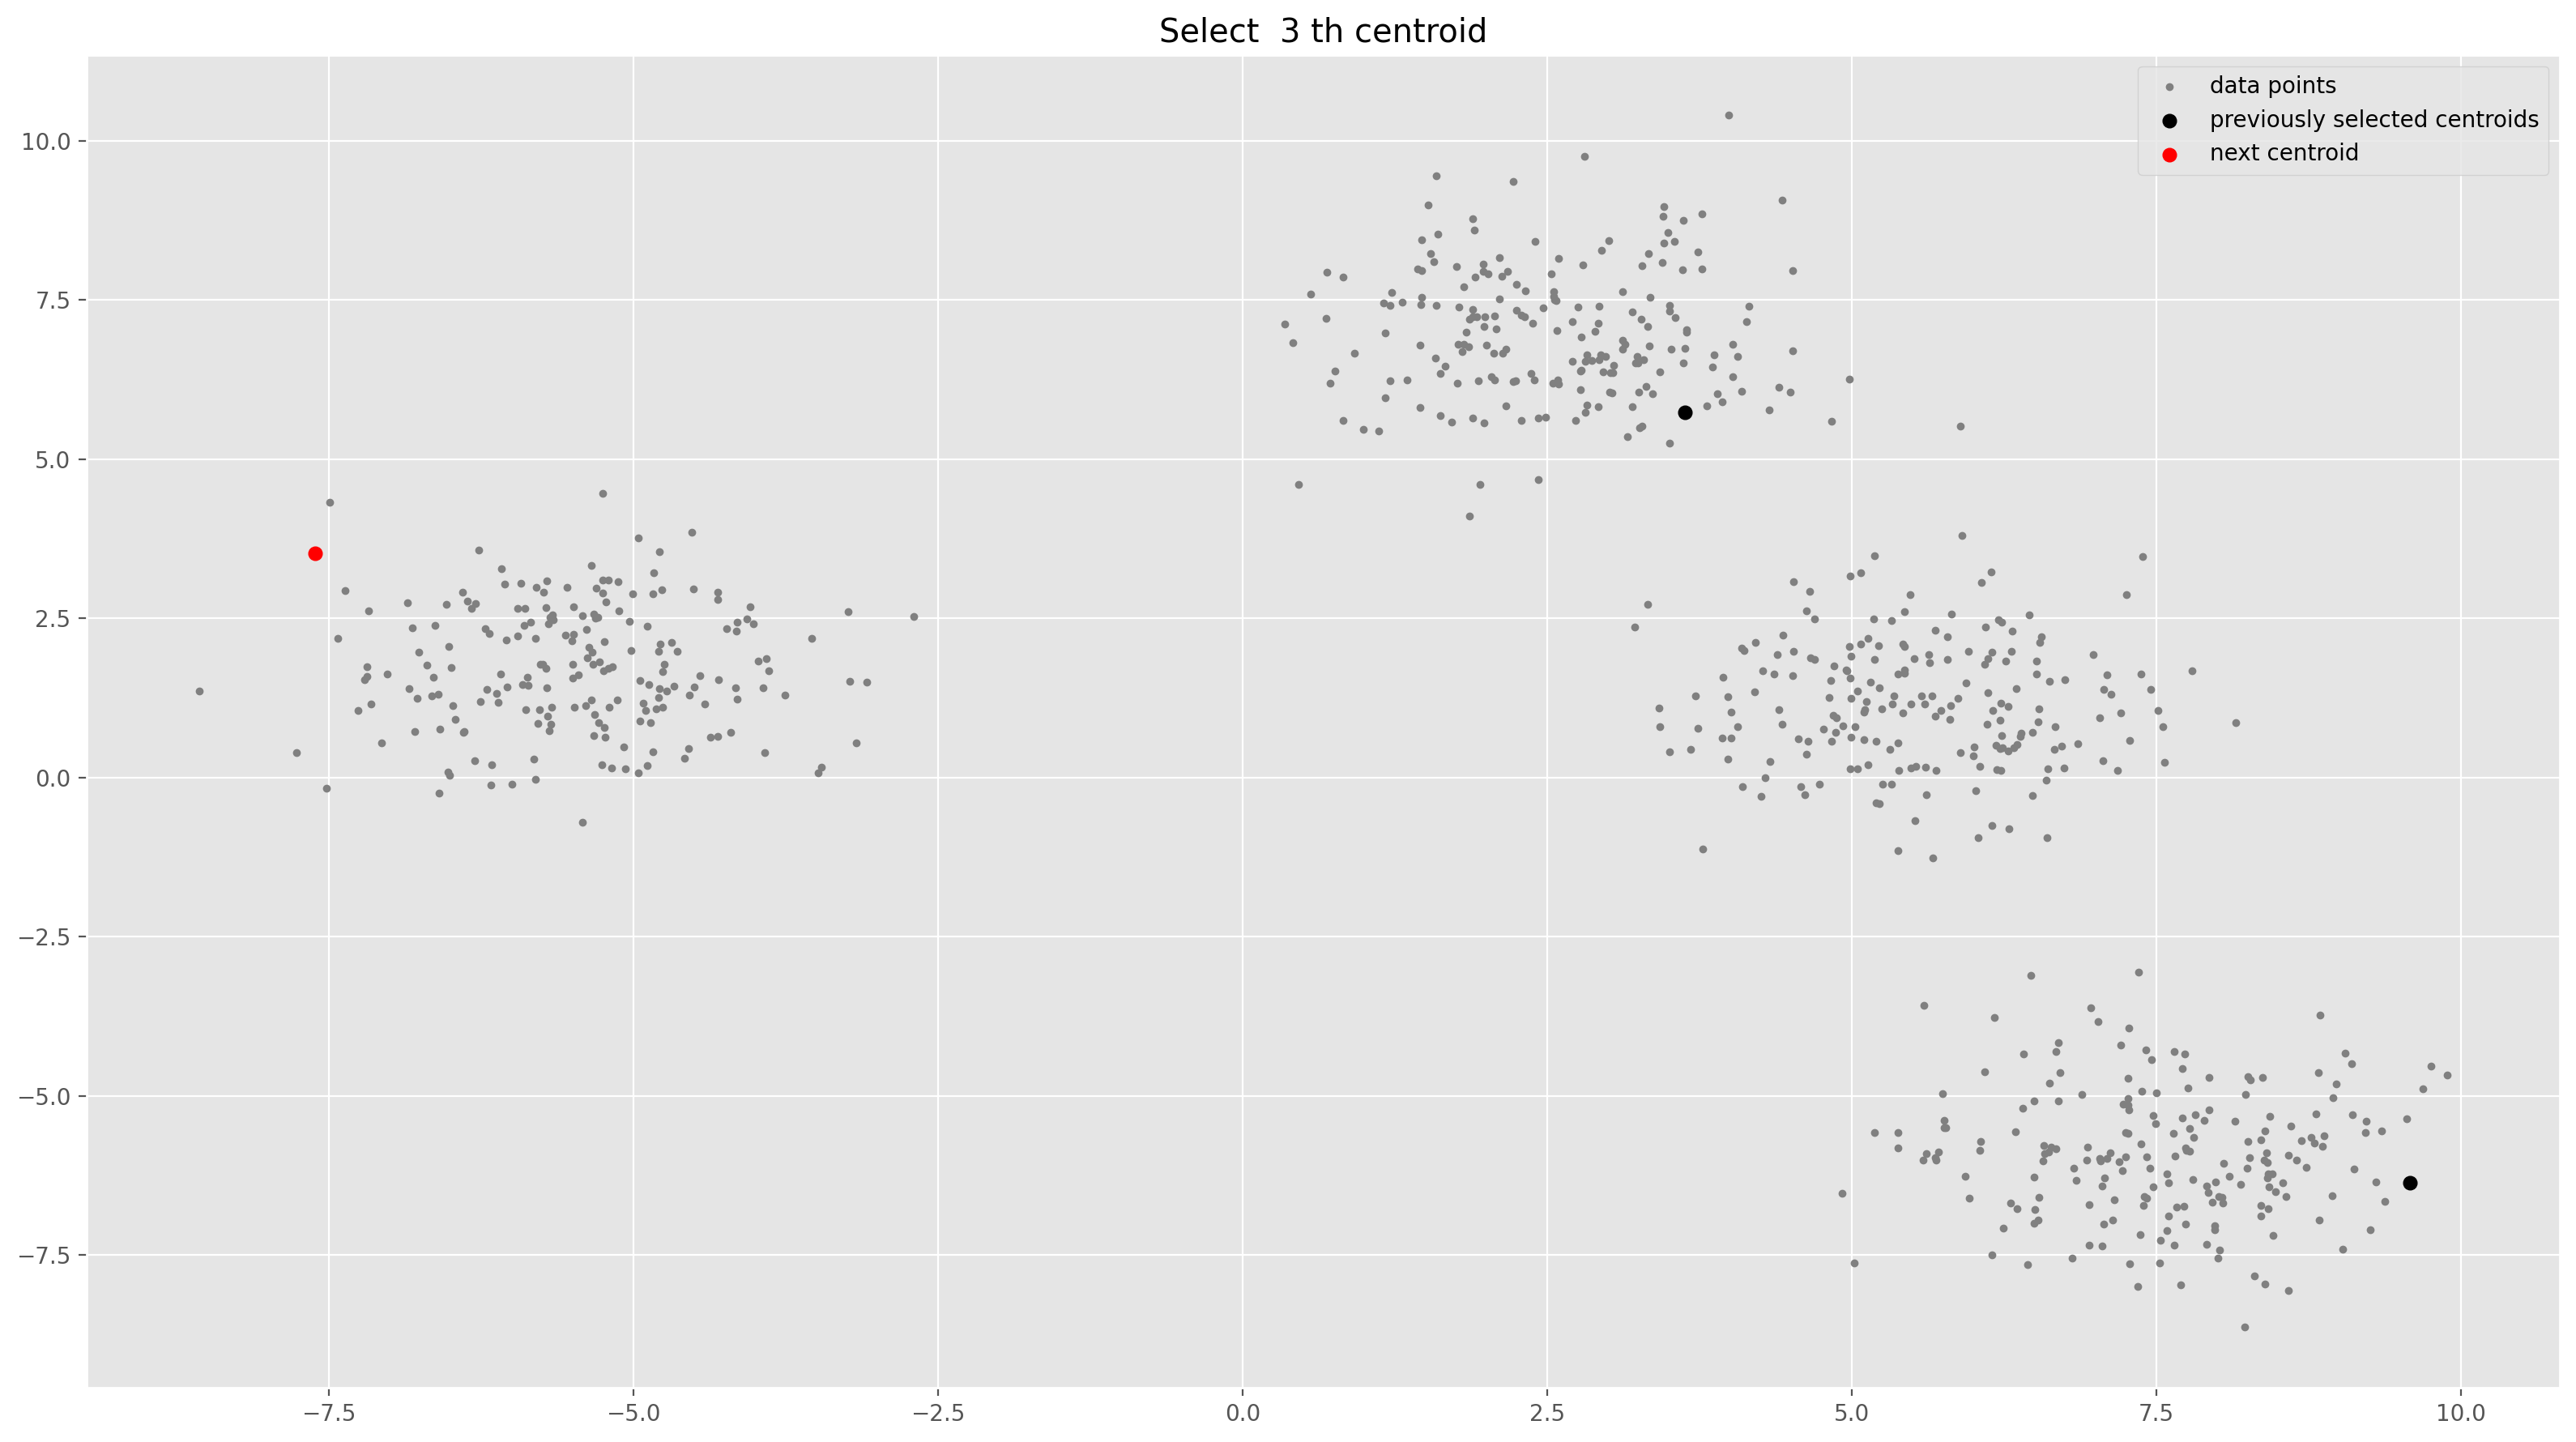

(3, 3)
[INFO] Iteration 5：distance_flag = [0.         0.03034953 0.01352345].


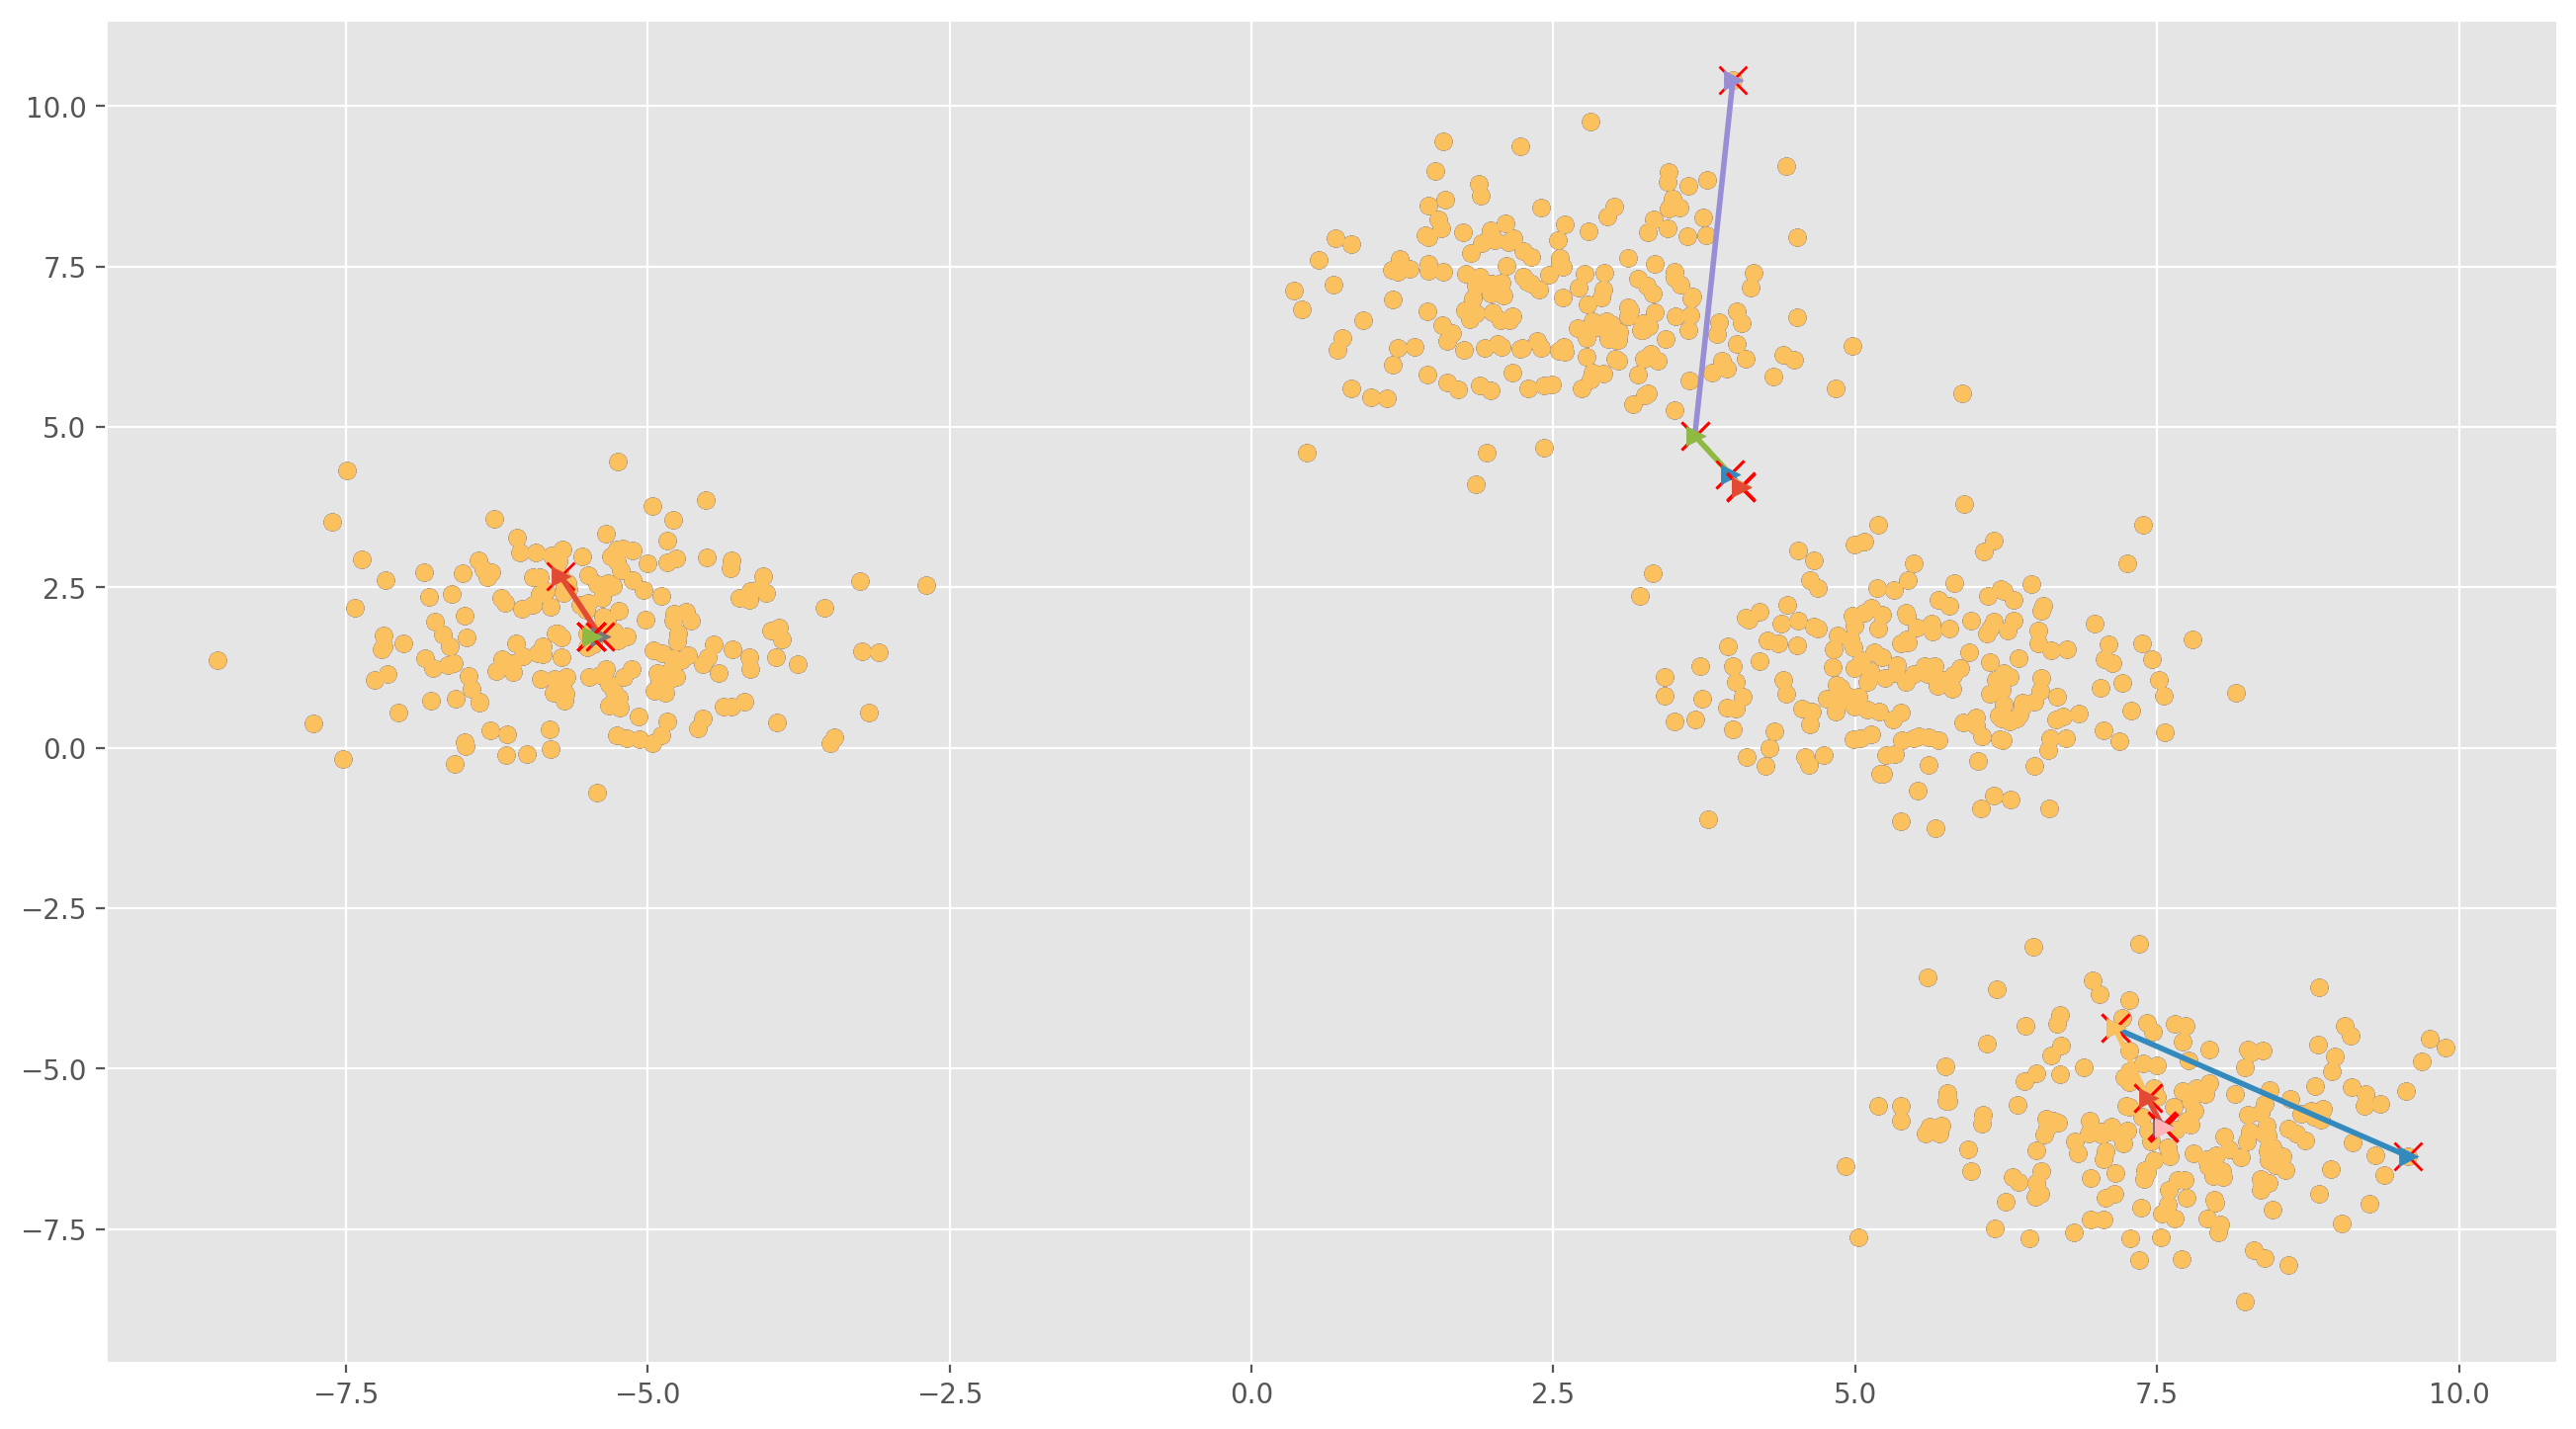

Centroid values
Scratch
[[ 4.05494106  4.0539529   1.80783433]
 [ 7.55300354 -5.91964237  5.51476806]
 [-5.46615829  1.72998682  4.20330033]]
sklearn
[[ 4.05494106  4.0539529   1.80783433]
 [ 7.55300354 -5.91964237  5.51476806]
 [-5.46615829  1.72998682  4.20330033]]


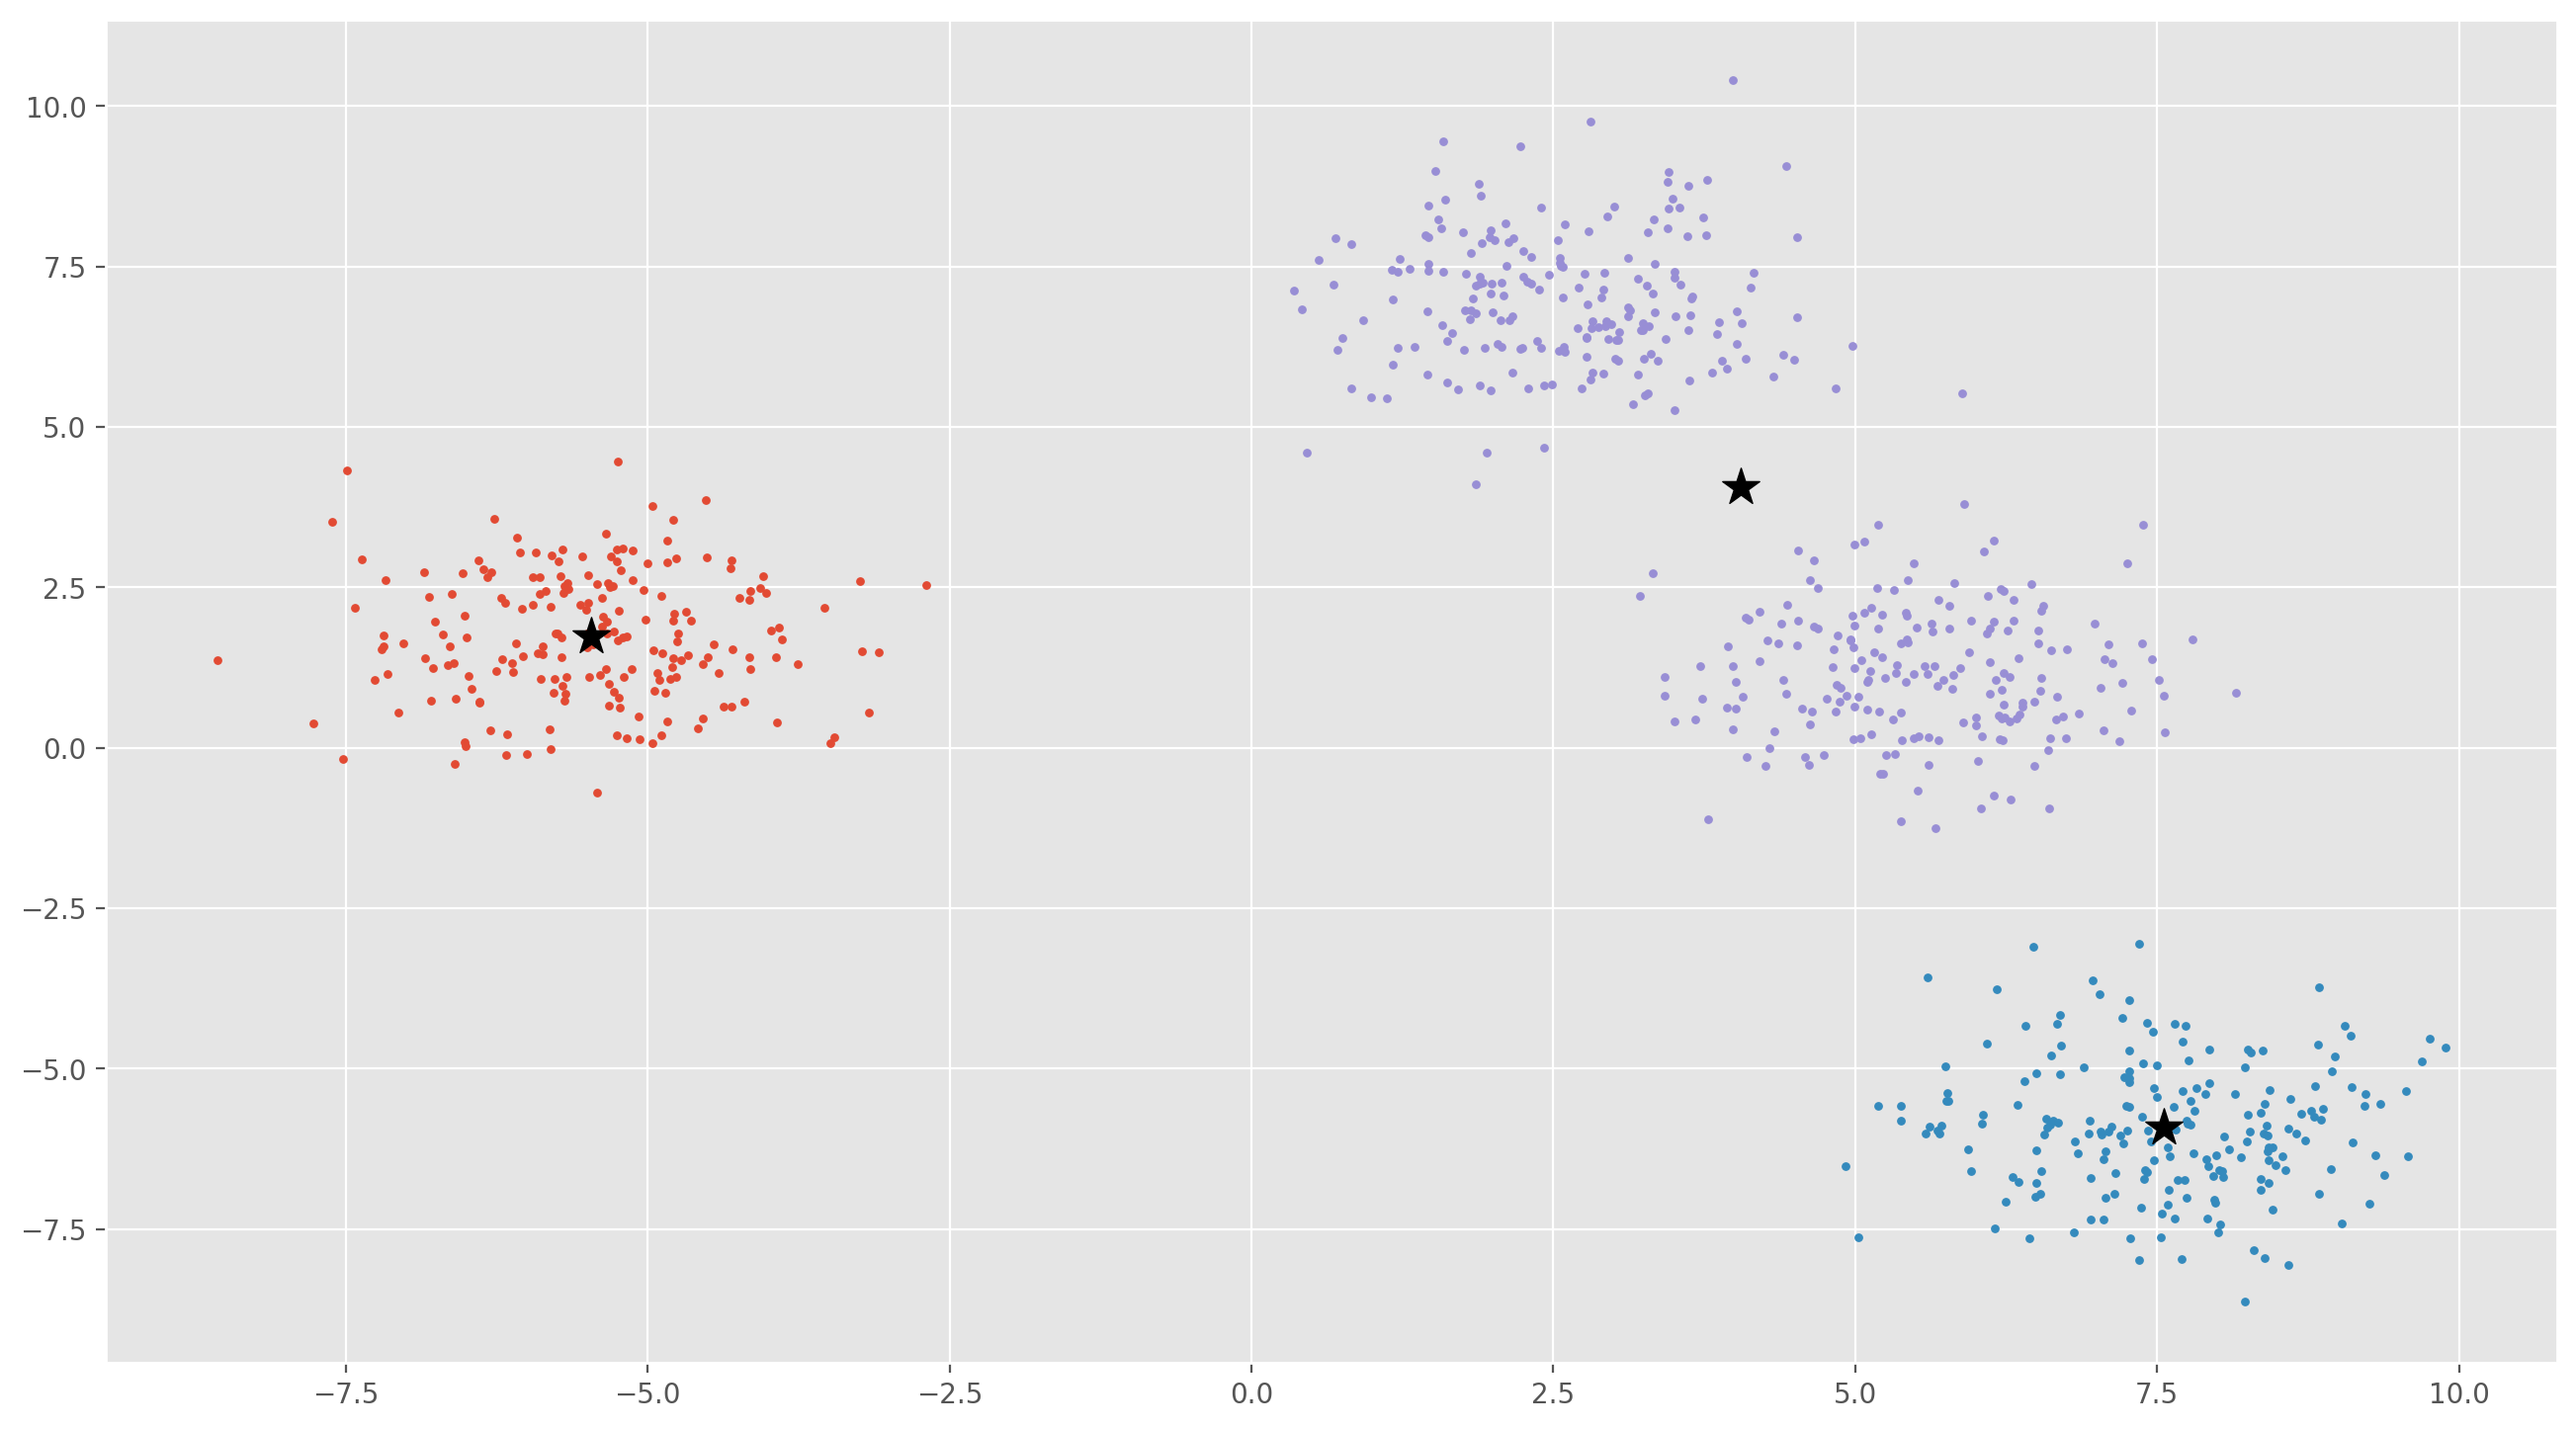

In [1]:
import sys
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt


from DistanceMetric import calculate_distance_multi_dims, calculate_distance
from PlotFunctions import plot_cluster_data, generate_colors, plot_k_means_centroids, plot_cluster_process_2d, plot_cluster_result_2d


def do_init_centroids(X, k, method='random'):
    """
    初始化聚类中心
    ----
    X: array, dataset
    k: int, cluster number
    method: str, 'random'(k-means); 'k-means++'
    ----
        KMeans++改进了KMeans算法选择初始质心的方式。
        其核心思想是：在选择一个聚类中心时，距离已有的聚类中心越远的点，被选取作为聚类中心的概率越大。
    """
    # 样本个数
    n_samples  = X.shape[0]
    # 样本特征数
    n_features = X.shape[1]
    
    # 生成样本索引
    indexs = np.arange(0, n_samples)
    # 打乱顺序
    # 此函数仅沿多维数组的第一个轴对数组进行打乱。子数组的顺序改变，但内容不变。
    np.random.shuffle(indexs)
    # 初始化聚类簇中心，shape=(k, n_features)
    centroids = np.zeros((k, n_features))
    
    # 类型转换，统一格式为 numpy.array
    if type(X) == pd.core.frame.DataFrame:
        X = X.to_numpy()
        
    if method == 'k-means++':
        # 从数据集中随机选择一个样本点作为第一个聚类中心
        centroids[0, ] = X[indexs[0], :]
        print(centroids.shape)
        
        # 从剩余样本中选择 k - 1 个聚类中心
        for centroid in range(k - 1):
            # 定义一个列表存储离聚类中心最近的样本点
            dists = []
            
            for i in range(n_samples):
                # 单一样本
                point = X[i, :]
                # 初始化距离
                min_dist = sys.maxsize
                
                # 计算 point 与之前的每一个聚类中心的距离 
                # 选择质心并存储最小距离
                for j in range(len(centroids)):
                    # temp_dist = calculate_distance_multi_dims(point, centroids[j], axis=0)
                    temp_dist = calculate_distance(point, centroids[j], method='euclidean', p=None)
                    # 存储最小距离
                    min_dist = min(min_dist, temp_dist)
                    
                dists.append(min_dist)
                
            # 遍历完样本之后，选择距离最大的数据点作为下一个质心
            max_dist = np.argmax(np.array(dists))
            next_centroid = X[max_dist, :]
            # 存储第二个及其之后的聚类中心
            centroids[centroid+1, :] = next_centroid
            
            # dists 清零
            dists = []
            
    # 随机初始化：即随机从样本中选择 k 个样本点作为初始聚类中心
    else:
        # 取打乱顺序之后的前 k 个样本作为初始聚类中心
        top_k_index = indexs[:k]
        # 用这k个样本的值作为初始化的簇中心
        centroids = X[top_k_index, :]

    return centroids


def k_means(X, n_cluster, init_method='random', n_iter=100, plot_process=False):
    init_centroids = do_init_centroids(X, k=n_cluster, method=init_method)
#     print(init_centroids.shape)
    
    # 类型转换，统一格式为 numpy.array
    if type(X) == pd.core.frame.DataFrame:
        X = X.to_numpy()
        
    # 用于保存聚类中心更新前的值
    old_centroids = np.zeros(init_centroids.shape)
#     print(old_centroids.shape)
    
    # 更新后的聚类中心的值
    new_centroids = deepcopy(init_centroids)
    
    # 用于保存数据所属的簇
    n_samples = len(X)
    clusters = np.zeros(n_samples)
    
    # 迭代标识符，计算新旧聚类中心的距离
    distance_flag = calculate_distance_multi_dims(init_centroids, old_centroids, axis=1)
    
    if n_iter:
        current_iter = 1
        iteration_flag = (current_iter < n_iter)
    # 去掉最大循环次数限制
    else:
        iteration_flag = True
        
    # 若聚类中心不再变化或者迭代次数超过n_iter次(可取消)，则退出循环
    while distance_flag.any() != 0 and iteration_flag:
        # 1. 计算每个样本点所属的簇（距离最近的簇）
        for i in range(n_samples):
            # 样本与k个聚类中心的距离
            distances = calculate_distance_multi_dims(X[i], new_centroids, axis=1)
            # 当前样本与k个聚类中心的最近距离
            cluster = np.argmin(distances)
            # 记录当前样本点所属的聚类中心
            clusters[i] = cluster
            
        # 2. 更新聚类中心
        # 记录更新前的聚类中心
        old_centroids = deepcopy(new_centroids)
        
        # 属于同一个簇的样本点放到一个数组中，然后按照列的方向取平均值
        for i in range(n_cluster):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            new_centroids[i] = np.mean(points, axis=0)
            
        # 3. 判断是否满足迭代停止条件
        if current_iter % 5 == 0:
            print(f"[INFO] Iteration {current_iter}：distance_flag = {distance_flag}.")
        
        distance_flag = calculate_distance_multi_dims(new_centroids, old_centroids, axis=1)
        current_iter += 1
        
        if plot_process:    # 如果绘制图像
            plt = plot_cluster_process_2d(X, new_centroids,old_centroids) # 画聚类中心的移动过程
    
    if plot_process:    # 显示最终的绘制结果
        plt.show()
        
    # 返回每个样本所属的类以及更新后的聚类中心
    return clusters, new_centroids
    
    
if __name__ == '__main__':
    from sklearn.datasets import make_blobs
    X, y = make_blobs(n_samples=800, n_features=3, centers=4)
    # Importing the dataset
    data = pd.read_csv('xclara.csv')
    print(data.shape)
    
    plot_cluster_data(data)
    plot_cluster_data(X, show_dims=3)
    
    # K-Means
    centroids = do_init_centroids(X, k=3, method='random')
    print(centroids)
    plot_k_means_centroids(X, centroids)
    clusters, centroids = k_means(X, n_cluster=3, init_method='random', n_iter=100, plot_process=True)
    plot_cluster_result_2d(X, clusters, centroids)
    
    # K-Means++
    centroids = do_init_centroids(X, k=3, method='k-means++')
    print(centroids)
    plot_k_means_centroids(X, centroids)
    clusters, centroids = k_means(X, n_cluster=3, init_method='k-means++', n_iter=100, plot_process=True)
    plot_cluster_result_2d(X, clusters, centroids)
    # skelarn K-MEANS
    from sklearn.cluster import KMeans
    

    # Number of clusters
    kmeans = KMeans(n_clusters=3)
    # Fitting the input data
    kmeans = kmeans.fit(X)
    # Getting the cluster labels
    labels = kmeans.predict(X)
    # Centroid values
    centroids = kmeans.cluster_centers_

    # Comparing with scikit-learn centroids
    print("Centroid values")
    print("Scratch")
    print(centroids) # From Scratch
    print("sklearn")
    print(centroids) # From sci-kit learn

D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


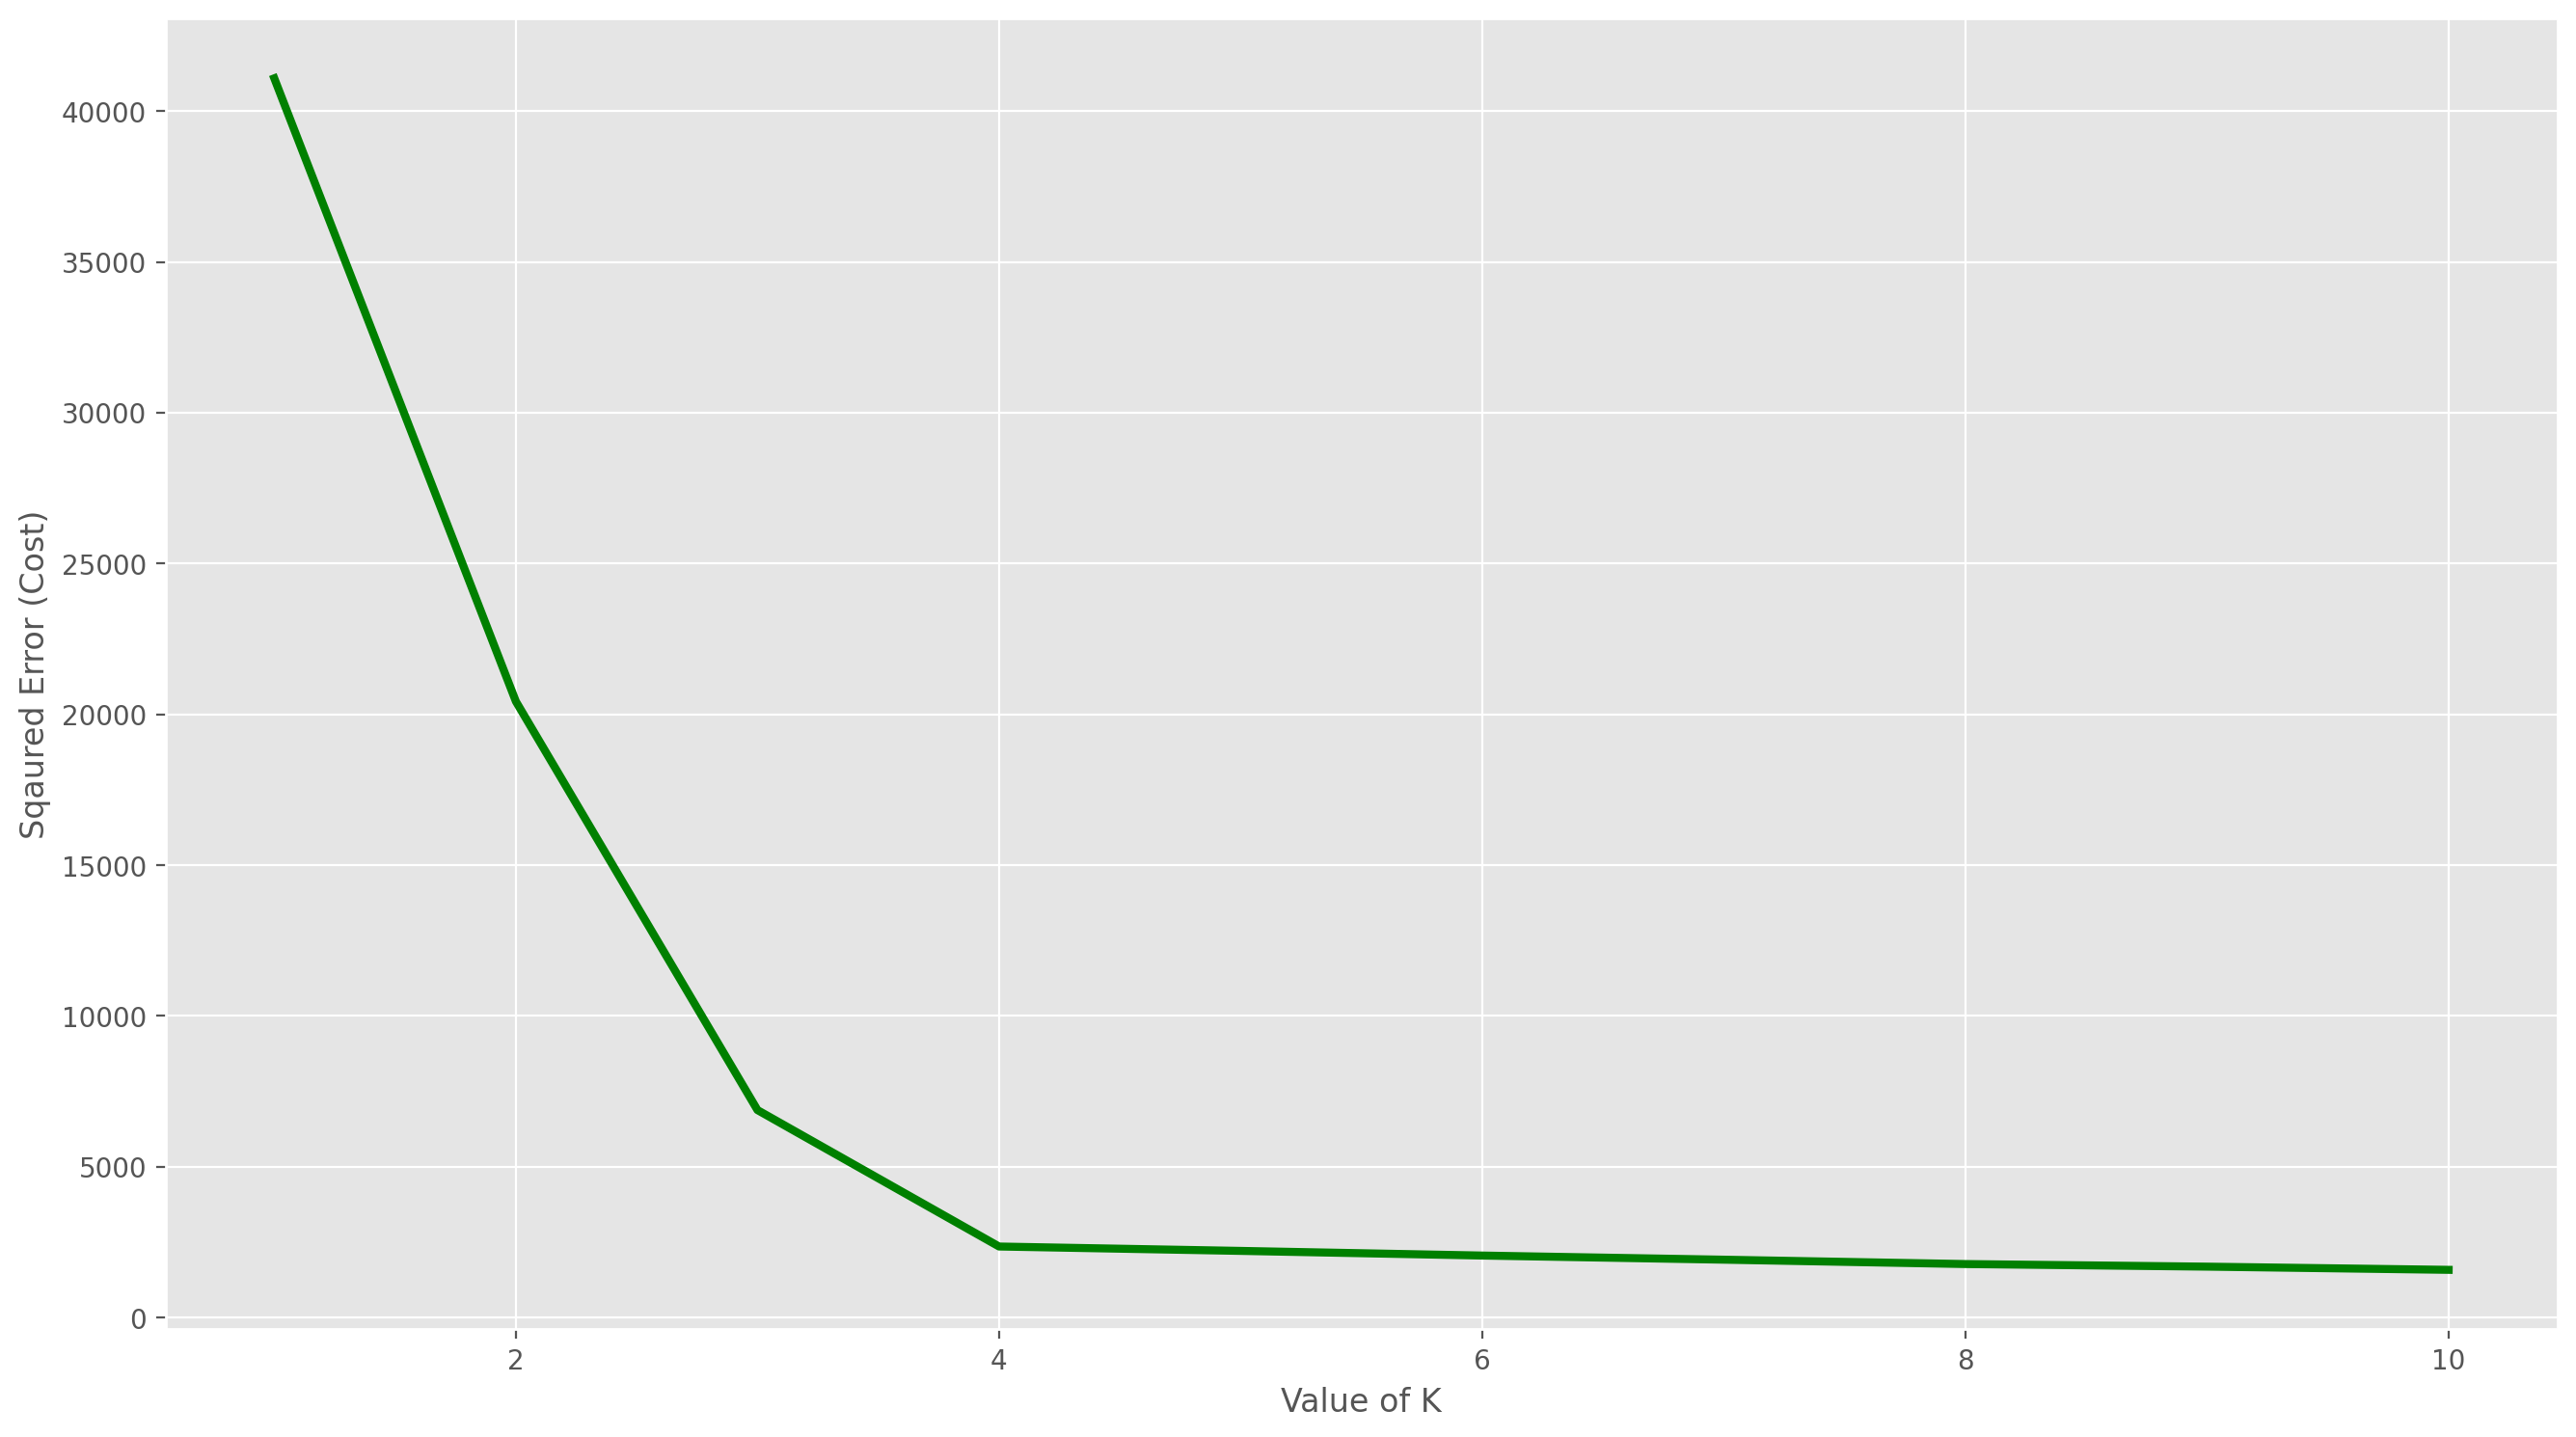

In [2]:
cost =[]
for i in range(1, 11):
#     km = k_means(data, n_cluster=i, init_method='k-means++', 
#                  n_iter=100, plot_process=True)
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(X)
    # calculates squared error for the clustered points
    cost.append(KM.inertia_)     

# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show() # clear the plot